# 初めに

<p>本ノートの目的は、『食べログ』に投稿された口コミや点数を分析し、その作業を通じて、著者自身が自然言語処理についてこれから学んでいくための、足がかりとすることにあります。従って、実務を想定した高い精度は求めません。</p>
<p>『食べログ』様の利用規約で、営利目的およびその準備のための、サイトへのアクセスが禁じられていることを確認しています。本ノートもその利用規約に従います。</p>
<p>尚、本ノートで実装したコードは、各ライブラリの公式ドキュメントを参考にすべて著者が書いています。</p>

# 背景

<p>人間の味覚には個体差があります。同じ飲食店の料理を食べても、美味しいと感じる人もいれば、不味いと感じる人もいます。だから、このような感情を含む情報の要素還元的な調査は、同一対象の表裏をこすることに終止する場合が多いです。</p>
<p>ついつい我々は、世の中にはなにか良い飲食店と悪い飲食店のようなものがあって、その判別は客観的に行える、少なくとも、色んな人の評価を集めて平均を求めれば、飲食店に一定の評価をつけられるという判断をおかしがちです。そしてその場合、飲食店はより良い飲食店になるために、店に訪れた客の良い評価を増やすか、あるいは悪い評価を減らすことを求められます。</p>
<p>しかし、好きの反対は無関心と言うように、飲食店がSNS上で多くのレビュワーから否定的な評価を受けている状況についても、本来それだけ多くの注目を集めているというポジティブな見方も可能なはずです。</p>
<p>本ノートでは、店側の目標設定をレビュワーから受ける評価の平均値の上昇とする分析に批判的な態度を取りつつ、飲食店の口コミを対象としたテキスト分析の凡例について有効性を検証します。</p>

# スクレイピング（準備）
<p>まず、食べログから口コミのデータをスクレイピングします。食べログでは、レビュワーたちが以前訪れた飲食店について、0~5点の点数を付けて、コメントを投稿できます。口コミとは、この点数とコメントを含むひとまとまりの投稿内容のことです。今回、収集した口コミのデータは以下になります。</p>
<p>
  <ol>
    <li>店舗ごとにつけられた口コミの情報（1店舗につき、口コミ最大150件）
      <ul>
        <li>口コミの URL</li>
        <li>レビュワー名</li>
        <li>レビュワーのフォロワー数</li>
        <li>店舗名</li>
        <li>投稿日（年）</li>
        <li>投稿日（月）</li>
        <li>口コミのタイトル</li>
        <li>口コミの本文</li>
        <li>メインの点数</li>
        <li>料理・味の点数</li>
        <li>サービスの点数</li>
        <li>雰囲気の点数</li>
        <li>CP(コスパ)の点数</li>
        <li>酒・ドリンクの点数</li>
      </ul>
    </li>
    <li>レビュワーの口コミの点数の区間度数
      <ul>
        <li>レビュワーのプロフィールページの URL</li>
        <li>レビュワー名</li>
        <li>夜の5.0点の度数</li>
        <li>夜の4.5点~4.9点の度数</li>
        <li>夜の4.0点~4.4点の度数</li>
        <li>夜の3.5点~3.9点の度数</li>
        <li>夜の3.0点~3.4点の度数</li>
        <li>夜の2.5点~2.9点の度数</li>
        <li>夜の2.0点~2.4点の度数</li>
        <li>夜の1.5点~1.9点の度数</li>
        <li>夜の1.0点~1.4点の度数</li>
        <li>昼の5.0点の度数</li>
        <li>昼の4.5点~4.9点の度数</li>
        <li>昼の4.0点~4.4点の度数</li>
        <li>昼の3.5点~3.9点の度数</li>
        <li>昼の3.0点~3.4点の度数</li>
        <li>昼の2.5点~2.9点の度数</li>
        <li>昼の2.0点~2.4点の度数</li>
        <li>昼の1.5点~1.9点の度数</li>
        <li>昼の1.0点~1.4点の度数</li>
      </ul>
    </li>
    <li>レビュワーごとの、彼らが投稿した口コミの点数の情報（レビュワー1人につき、口コミ最大50件）
      <ul>
        <li>口コミの URL</li>
        <li>レビュワー名</li>
        <li>店舗名</li>
        <li>投稿日（年）</li>
        <li>投稿日（月）</li>
        <li>メインの点数</li>
        <li>料理・味の点数</li>
        <li>サービスの点数</li>
        <li>雰囲気の点数</li>
        <li>CP(コスパ)の点数</li>
        <li>酒・ドリンクの点数</li>
      </ul>
    </li>
  </ol>
</p>
<p>新宿駅周辺のラーメン店、約200軒(TODO: 正確な軒数を調べる。)に関する口コミの情報を収集しました。データの収集範囲を限定したのは簡易のためです。本ノートの分析の意義は、あくまで著者の実習にあります。</p>
<p>尚、スクレイピングを実施するにあたり、いくつかのツールを実装しています。<br>
一例として、スクレイピング処理中にエラーが発生した場合に、処理を一旦中断し、実装者がコードを修正した後に、前回の中断箇所から処理を再開できる汎用のWebスクレイパーを自作しました。このスクレイパーを使えば、エラーが発生するたびに、スクレイピング処理を初めやり直すことで起こる、処理時間の増加および相手サーバー側へかける負荷の増加を回避できます。</p>

In [ ]:
#@title Google ドライブのマウント


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title ライブラリのインポート

# WebScraper で使用するライブラリ.
import sys
import os
import math
import warnings
import re
import collections
import copy
import functools
from enum import IntEnum, Enum
from urllib.parse import urljoin, urlencode
import asyncio
import traceback
import pickle

from dateutil.relativedelta import relativedelta
!pip install aiohttp
import aiohttp
!pip install nest-asyncio
import nest_asyncio
from bs4 import BeautifulSoup

import IPython.display

import numpy as np
import pandas as pd

# それ以外のライブラリ
import random

from tqdm import tqdm
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib
import seaborn as sns

!pip install accelerate -U
!pip install transformers
!pip install transformers['ja']
from transformers import (pipeline,
                          BertJapaneseTokenizer,
                          DataCollatorForLanguageModeling,
                          Trainer,
                          TrainingArguments)
!pip install datasets
from datasets import load_dataset

# Install ginza.
!pip install -U ginza ja-ginza
import pkg_resources, imp
imp.reload(pkg_resources)
import spacy

%matplotlib inline

In [ ]:
#@title Webスクレイパーの実装
"""
省略語.

    cls: class
    df: DataFrame
    idx: index
    st: start
    ed: end
    num: number
"""


MB_SIZE = 2 ** 23
GB_SIZE = 2 ** 33

STDOUT_MAX_LINE = 500

CONNECTION_TIMEOUT = 15
DEFAULT_INTERVAL = 1.0
HTTP_RESPONSE_STATUS_OK = 200

DUMMY_URL = 'dummy_url'


class LoggerVerbosity(IntEnum):
    """ ログ出力の詳細度. """
    DEBUG = 1
    INFO = 0
    ERROR = -1
    DISABLE = -2


class SourceFetchError(Exception):
    """ ソースの取得に失敗した場合の例外. """
    pass


class ScrapeError(Exception):
    """ スープの解析に失敗した場合の例外. """
    pass


class AddDataFatalError(Exception):
    """ DataMaker へのデータ追加に失敗した場合の例外. """
    pass


class ScrapingWarning(Warning):
    """ スクレイピング時の警告. """
    pass


class ParseSoupWarning(ScrapingWarning):
    """ スープをパースする時の警告. """
    pass


class AddDataWarning(ScrapingWarning):
    """ データを追加する時の警告. """
    pass


class Logger():
    """
    ロガー.

    Notes:
        標準出力にメッセージを出力することをロギングと再定義する.
    """

    def __init__(self, verbosity=LoggerVerbosity.INFO):
        # ログ出力の詳細度
        self.verbosity = verbosity
        self.print_count = 0

    def _print(self, message):
        """
        メッセージをプリント出力する.

        Arguments:
            message(str): 出力するメッセージ.

        Returns:
            NoneType: 返り値なし.
        """
        if self.print_count >= STDOUT_MAX_LINE:
            IPython.display.clear_output()
            self.print_count = 0
        print(message)
        self.print_count += 1

    def debug_print(self, message):
        """
        実装者向けの情報をプリント出力する.

        Arguments:
            message(str): 出力する文字列.

        Returns:
            NoneType: 返り値なし.
        """
        if self.verbosity >= LoggerVerbosity.DEBUG:
            self._print(message)

    def info_print(self, message):
        """
        実行者向けの情報をプリント出力する.

        Arguments:
            message(str): 出力する文字列.

        Returns:
            NoneType: 返り値なし.
        """
        if self.verbosity >= LoggerVerbosity.INFO:
            self._print(message)

    def error_print(self, message):
        """
        エラー情報をプリント出力する.
        LoggerVerbosity.DISABLE で沈黙.

        Arguments:
            message(str): 出力する文字列.

        Returns:
            NoneType: 返り値なし.
        """
        if self.verbosity >= LoggerVerbosity.ERROR:
            self._print('***** error *****: {message}'.format(message=message))


class ScrapingWarningCatcher(warnings.catch_warnings):
    """
    スクレイピング関連の警告のみを監視するコンテキストマネージャー.
    WebScrapePlan に警告を渡す.
    """

    def __init__(self, plan):
        """
        コンストラクタ.

        Arguments:
            plan(WebScrapePlan): 実行中のWebScrapePlan.

        Returns:
            NoneType: 返り値なし.
        """
        super().__init__(record=True)
        self.plan = plan
        self.log = None

    def __enter__(self):
        """ コンテキストマネージャーの入口のコールバック. """
        self.log = super().__enter__()

    def __exit__(self, *exc_info):
        """ コンテキストマネージャーの出口のコールバック. """
        for warning_message in self.log:
            if issubclass(warning_message.category, ScrapingWarning):
                self.plan.add_warning_message(warning_message)
        super().__exit__(*exc_info)


class HandlersMixin():
    """
    ハンドラーと、ハンドラーにコールバックを登録するための
    デコレーターを提供する.

    Notes:
        反則だらけの実装をしています.
    """
    tag_to_handlers = dict()

    def __init__(self):
        """
        初期化コンストラクタ.

        Returns:
            NoneType: 返り値なし.
        """
        # ハンドラーをクラス・フィールドからインスタンス・フィールドへ移動する.
        tag_to_handler = dict()
        for tag, handlers in HandlersMixin.tag_to_handlers.items():
            for handler in handlers:
                m = re.search(r'\s(?P<class_name>[a-zA-Z_]+)\.', str(handler))
                class_name = m.group('class_name')
                if self.__class__.__name__ == class_name:
                    tag_to_handler[str(tag)] = handler
        self.tag_to_handler = tag_to_handler

    def get_handler(self, tag):
        """
        ハンドラーを取得する.

        Arguments:
            tag(Enum or str): コールバックに紐付けるタグ.

        Returns:
            callable: ハンドラー.
        """
        handler = self.tag_to_handler[str(tag)]
        return functools.partial(handler, self)

    @classmethod
    def register(cls, tag):
        """
        コールバックをハンドラーとして登録する引数つきデコレーター.

        Arguments:
            tag(Enum or str): コールバックに紐付けるタグ.

        Notes:
            インスタンスメソッドを修飾することを想定しています.
            1つのタグに対して、クラス内で1つのコールバックが対応する想定です.
        """
        def decorator(func):
            """ 内部デコレーター """
            if tag in cls.tag_to_handlers:
                # Enum のタグを str 型に変換する.
                # GoogleColab 上でコードを動かす時、Enum を宣言するセルを
                # 複数回呼び出す場合に対応するため.
                handlers = cls.tag_to_handlers[str(tag)]
                # 同じクラス名を prefix に持つ関数が重複しないように削除する.
                # GoogleColab 上でコードを動かす時、デコレートされた関数
                # を宣言するセルを、複数回呼び出す場合に対応するため.
                for handler in handlers:
                    m = re.search(r'\s(?P<class_name>[a-zA-Z_]+)\.', str(handler))
                    class_name = m.group('class_name')
                    if self.__class__.__name__ == class_name:
                        cls.tag_to_handler[str(tag)].remove(handler)
                cls.tag_to_handlers[str(tag)].add(func)
            else:
                cls.tag_to_handlers[str(tag)] = set([func])
            return func
        return decorator


class TextToIndexDump():
    """ StringsSeriesMaker のダンプ. """

    def __init__(self,
                 logger,
                 max_dump_data=50,
                 resized_dump_data_num=20):
        """
        コンストラクタ.

        Arguments:
            logger(Logger): ロガー.
            max_dump_data(int): ダンプする文字列とインデックスの組み合わせの最大値.
            resized_dump_data_num(int): ダンプをリサイズした後のデータ数.

        Returns:
            NoneType: 返り値なし.
        """
        self.logger = logger
        # 同時書き込み・読み取りを禁止する排他制御用のロック
        self.lock = asyncio.Lock()
        self.max_dump_data = max_dump_data
        self.resized_dump_data_num = resized_dump_data_num
        # ダンプの実態
        self.text_to_indexs = collections.OrderedDict()

    async def get_indexs(self, text):
        """
        指定したテキストと対応するインデックスを取得する.

        Arguments:
            text(str): テキスト.

        Returns:
            coroutine(
                tuple(
                    int: StringsSeriesMaker で保持する文字列から、
                         指定した文字列を抽出するための先頭のインデックス.
                    int: StringsSeriesMaker で保持する文字列から、
                         指定した文字列を抽出するための末尾のインデックス.
                )
            )
        """
        async with self.lock:
            self.logger.debug_print('TTID.get_indexs() が排他制御アクセス権を'
                                    '取得しました.')
            if not text in self.text_to_indexs:
                return None, None
            self.text_to_indexs.move_to_end(text)
            return self.text_to_indexs.get(text)

    async def add_indexs(self, text, start_index, end_index):
        """
        ダンプに、テキストとインデックスの組み合わせを追加する.

        Arguments:
            text(str): テキスト.
            start_index: 先頭のインデックス.
            end_index: 末尾のインデックス.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        self.logger.debug_print('TTID.add_indexs() が呼ばれました. '
                                f'text={text} start_index={start_index} '
                                f'end_index={end_index}.')
        async with self.lock:
            self.logger.debug_print('TTID.add_indexs() が排他制御アクセス権を'
                                    '取得しました.')
            self.text_to_indexs[text] = (start_index, end_index)
            self._ensure_dump_within_size()

    def _ensure_dump_within_size(self):
        """
        ダンプのデータ数が設定した最大値より大きい場合にリサイズする.

        Returns:
            NoneType: 返り値なし.
        """
        if len(self.text_to_indexs) > self.max_dump_data:
            self.text_to_indexs = \
            collections.OrderedDict(
                list(self.text_to_indexs.items())[-(self.resized_dump_data_num):])
            self.logger.debug_print('TTIDのダンプをリサイズしました.')

    def free_data(self):
        """
        データを解放して初期化する.

        Returns:
            NoneType: 返り値なし.
        """
        del self.text_to_indexs
        self.text_to_indexs = collections.OrderedDict()


class StringsSeriesMaker():
    """
    メモリ節約のため、複数の文字列を連結してひとつの文字列にするクラス.
    連結した文字列から元の文字列を取り出すため、元の文字列のインデックスを保持する.
    また、同じ文字列を連結するメモリの無駄を省くため、直近で追加した文字列を
    ダンプして、ダンプした文字列と同じ文字列の書き込みを中断する.
    """

    def __init__(self,
                 logger,
                 dump_keys=None,
                 max_dump_data=50,
                 resized_dump_data_num=20):
        """
        コンストラクタ.

        Arguments:
            logger(Logger): ロガー.
            dump_keys(list(DumpKey) or NoneType): ダンプする文字列のカテゴリーと対応するキーの配列.
            max_dump_data(int): ダンプする文字列の最大値.
            resized_dump_data_num(int): 最大値を超えたダンプデータをリサイズした後のデータ数.

        Returns:
            NoneType: 返り値なし.
        """
        self.logger = logger
        # 同時書き込みを禁止する排他制御用のロック
        self.lock = None
        # DumpKey と対応する TextToIndexDump の辞書
        self.key_to_dump = None
        self.text = None
        # 文字列の結合は計算コストが高いため、文字列のサイズが一定を超えるまで
        # バッファに保存して、後でまとめて結合する
        self.texts_buffer = list()
        self.indexs = None
        # 計算コスト削減のためのバッファ
        self.indexs_buffer = list()

        self._initialize(dump_keys, max_dump_data, resized_dump_data_num)

    def _initialize(self, dump_keys, max_dump_data, resized_dump_data_num):
        """
        初期化する.

        Arguments:
            dump_keys(list(DumpKey)): ダンプする文字列のカテゴリーに対応するキーの配列.
            max_dump_data(int): ダンプする文字列の最大値.
            resized_dump_data_num(int): 最大値を超えたダンプデータをリサイズした後のデータ数.

        Returns:
            NoneType: 返り値なし.
        """
        self.lock = asyncio.Lock()
        self.indexs_buffer.append(0)
        key_to_dump = dict()
        if dump_keys is None:
            self.key_to_dump = key_to_dump
            return
        for dump_key in dump_keys:
            key_to_dump[dump_key] = \
            TextToIndexDump(
                self.logger,
                max_dump_data=max_dump_data,
                resized_dump_data_num=resized_dump_data_num)
        self.key_to_dump = key_to_dump

    async def append_text(self, text, dump_key=None):
        """
        文字列がダンプ領域になければ追加して、ひとつの文字列に結合する.

        Arguments:
            text(str): 追加する文字列.
            dump_key(str or NoneType): 文字列のカテゴリーに対応するダンプのキー.

        Returns:
            coroutine(
                tuple(
                    (int or NoneType): 文字列の先頭のインデックス.
                    (int or NoneType): 文字列の末尾のインデックス.
                )
            )
        """
        self.logger.debug_print('SSM.append_text() が呼ばれました. '
                                f'text={text} dump_key={dump_key}.')
        text_to_index_dump = None
        if (not dump_key is None) and (dump_key in  self.key_to_dump):
            text_to_index_dump = self.key_to_dump[dump_key]
            start_index, end_index = \
                await text_to_index_dump.get_indexs(text)
            if not start_index is None:
                return start_index, end_index

        async with self.lock:
            self.logger.debug_print('SSM.append_text() が排他制御アクセス権を'
                                    '取得しました.')
            self.texts_buffer.append(text)
            if len(self.indexs_buffer) != 0:
                start_index = self.indexs_buffer[-1]
            else:
                start_index = self.indexs[-1]
                # start_index の型を np.int32 から int に変換する.
                start_index = int(start_index)
            end_index =  start_index + len(text)
            self.indexs_buffer.append(end_index)
            self._ensure_buffer_size_within_limit()
            if not text_to_index_dump is None:
                await text_to_index_dump.add_indexs(text,
                                                    start_index,
                                                    end_index)
            return start_index, end_index

    def _ensure_buffer_size_within_limit(self, force_flush=False):
        """
        バッファのサイズが設定値以上の時にフラッシュする.

        Arguments:
            force_flush(bool): バッファのサイズが設定値以下でも強制的に解放する.

        Returns:
            NoneType: 返り値なし.
        """
        self.logger.debug_print(f'SSM._ensure_buffer_size_within_limit() '
                                f'が呼ばれました. force_flush={force_flush}.')
        if ((force_flush) or
            (sys.getsizeof(self.indexs_buffer) > (2.0 * GB_SIZE))):
            if self.indexs is None:
                self.indexs = np.array(self.indexs_buffer, dtype=np.int32)
            else:
                self.indexs = np.append(self.indexs,
                                        self.indexs_buffer,
                                        axis=0).astype(np.int32)
            self.indexs_buffer = list()
        if ((force_flush) or
            (sys.getsizeof(self.texts_buffer) > (2.0 * GB_SIZE))):
            if self.text is None:
                self.text = ''.join(self.texts_buffer)
            else:
                self.text = ''.join([self.text] + self.texts_buffer)
            self.texts_buffer = list()

    def flush(self):
        """
        バッファを強制的に解放する.

        Returns:
            NoneType: 返り値なし.

        Notes:
            実装者は、同期呼び出しであることに注意してください.
        """
        self._ensure_buffer_size_within_limit(force_flush=True)
        self.logger.debug_print('SSM をフラッシュしました.')

    def free_data(self):
        """
        データを解放する.

        Returns:
            NoneType: 返り値なし
        """
        for dump in self.key_to_dump.values():
            dump.free_data()
        del self.text, self.texts_buffer, self.indexs, self.indexs_buffer
        self.text = None
        self.texts_buffer = list()
        self.indexs = None
        self.indexs_buffer = list()
        self.indexs_buffer.append(0)

    def get_data(self):
        """
        連結したテキストと、インデックスの配列を取得する.

        Returns:
            str: 連結したテキスト.
            np.ndarray: テキストの先頭と末尾のインデックスの配列.
        """
        self.logger.debug_print('SSM.get_data() が呼び出されました.')
        return self.text, self.indexs


class DataFrameMaker():
    """
    レコード単位で追加したデータから、DataFrame を作成するためのクラス.
    追加したデータをバッファに一時保存して、バッファ解放時に DataFrame を作成する.
    シングルトン.
    """

    def __init__(self, logger, columns, df=None):
        """
        初期化コンストラクタ.

        Arguments:
            logger(Logger): ロガー.
            columns(collections.OrderDicts)):
                key(str): 作成する DataFrame のカラム名.
                value(list(

                )): 行の値が取りうる型.
            df(pd.DataFrame): DataFrame. 既存の DataFrame にデータを追加して、
                              新しい DataFrame を作成する場合に指定する.

        Returns:
            NoneType: 返り値なし.
        """
        self.logger = logger
        # 同時書き込み禁止のための排他制御のロック.
        self.lock = None
        self.df = df
        self.columns = columns
        self.buffer_arrays = list()

        self._initialize()

    def _initialize(self):
        """
        初期化する.

        Returns:
            NoneType: 返り値なし.
        """
        # 同時書き込みを禁止するための排他制御ロック.
        self.lock = asyncio.Lock()
        # バッファを初期化する.
        self._initialize_buffer_arrays()

    def _initialize_buffer_arrays(self):
        """
        バッファを初期化する.

        Returns:
            NoneType: 返り値なし.
        """
        # バッファを初期化する。バッファの実態は二次元配列.
        # axis=0 の各要素が DataFrame のカラムに対応している.
        for unuse_index in range(len(self.columns)):
            self.buffer_arrays.append(list())

    def free_df(self):
        """ データを解放する. """
        del self.df, self.buffer_arrays
        self.df = None
        self.buffer_arrays = list()
        self._initialize_buffer_arrays()

    async def append_record(self, record_data):
        """
        レコードのデータをバッファに追加する.

        Arguments:
            record_data(list(object)): 1レコードのデータの配列.
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        self.logger.debug_print('DFM.append_record() が呼び出されました. '
                                f'record_data={record_data}.')
        async with self.lock:
            self.logger.debug_print('DFM.append_record() が排他制御アクセス権を'
                                    '取得しました.')
            assert len(self.columns) == len(record_data)
            for buffer_array, column_name, value_types, value in zip(
                self.buffer_arrays,
                self.columns.keys(),
                self.columns.values(),
                record_data):
                # レコードの各値の型チェックする.
                is_invalid_type = not isinstance(value, value_types)
                if is_invalid_type:
                    warning_message = \
                        f'レコードの行、{column_name} に予期せぬ型の値があります. ' \
                        f'想定する型は {value_types}. 値の型は {type(value)}.'
                    warnings.warn(warning_message, ScrapingWarning)
                # バッファに値を追加する.
                buffer_array.append(value)

    def flush(self):
        """
        バッファのデータを解放して、DataFrame を作成・結合する.

        Returns:
            NoneType: 返り値なし.
        """
        add_df = pd.DataFrame(self.buffer_arrays).T
        add_df.set_axis(self.columns.keys(), axis=1, inplace=True)
        if self.df is None:
            self.df = add_df
        else:
            self.df = pd.concat([self.df, add_df])
        del add_df
        self.logger.debug_print('DFM がフラッシュされました.')

    def get_df(self):
        """
        作成した DataFrameを取得する.

        Returns:
            pd.DataFrame: 作成した DataFrame.
        """
        self.logger.debug_print('DFM.get_df() が呼び出されました.')
        return self.df


class BaseDataManager(HandlersMixin):

    def __new__(cls, *args, **kwargs):
        """
        実体化コンストラクタ.
        シングルトンのインスタンスを取得する.
        初期化コンストラクタの二回目以降の呼び出しを無効化する.

        Arguments:
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns
            DataFrameMaker: シングルトンのインスタンス.
        """
        if not hasattr(cls, "_instance"):
            cls._instance = super(BaseDataManager, cls).__new__(cls)
        else:
            def init_pass(self, *arguments, **keyword_arguments):
                pass
            cls.__init__ = init_pass
        return cls._instance

    def __init__(self, logger_verbosity=LoggerVerbosity.INFO):
        """
        コンストラクタ.

        logger_verbosity(LoggerVerbosity): ログ出力の詳細度.
        """
        super().__init__()
        self.logger = Logger(verbosity=logger_verbosity)
        self.df_makers = collections.OrderedDict()
        self.string_series_makers = collections.OrderedDict()

        self._initialize()

    def _initialize(self):
        """ 初期化. """
        raise NotImplementedError()

    def free_data(self):
        """
        すべてのデータを開放する.

        Returns:
            NoneType: 返り値なし.
        """
        self.logger.debug_print('DMP.free_data() が呼ばれました.')
        for df_maker in self.df_makers.values():
            df_maker.free_df()
        for string_series_maker in self.string_series_makers.values():
            string_series_maker.free_data()
        self.logger.debug_print('DMP からデータを解放しました.')

    def flush(self):
        """
        バッファー領域のすべてのデータをフラッシュする.

        Returns:
            NoneType: 返り値なし.
        """
        self.logger.debug_print('DMP.flush() が呼ばれました.')
        for df_maker in self.df_makers.values():
            df_maker.flush()
        for string_series_maker in self.string_series_makers.values():
            string_series_maker.flush()
        self.logger.debug_print('DMP からバッファをフラッシュしました.')

    async def _append_record(self,
                             data_maker_tag,
                             record_data,
                             *args,
                             **kwargs):
        """
        DataFrameMaker にレコードを追加する.

        Arguments:
            data_maker_tag(Enum or str): DataFrameMaker に紐付けるタグ.
            record_data(list(object)): データのリスト.
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        df_maker = self.df_makers[data_maker_tag]
        return await df_maker.append_record(record_data)

    async def _convert_str_to_indexs(self,
                                     string_series_makers_tag,
                                     text,
                                     dump_key=None):
        """
        テキストデータを StringsSeriesMaker に追加して、
        文字列データのインデックスに変換する.

        Arguments:
            string_series_makers_tag(Enum or str): StringSeriesMaker に紐付けるタグ.
            text(str): 追加する文字列.
            dump_key(str or NoneType): 文字列のカテゴリーに対応するダンプのキー.

        Returns:
            coroutine(
                tuple(
                    (int or None): 文字列の先頭のインデックス.
                    (int or None): 文字列の末尾のインデックス.
                )
            )
        """
        if text is None:
            st_idx, ed_idx = None, None
        else:
            string_series_maker = self.string_series_makers[string_series_makers_tag]
            st_idx, ed_idx = await string_series_maker.append_text(
                text,
                dump_key=dump_key)
        return st_idx, ed_idx

    async def add_data(self, add_data_tag, data, *args, **kwargs):
        """
        DataMaker にデータを追加する.

        Arguments:
            add_data_tag: データを追加するためのハンドラーのタグ.
            data(object): 追加するデータ.
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        add_data_callback = self.get_handler(add_data_tag)
        return await add_data_callback(data, *args, *kwargs)


    def get_data(self, data_maker_tag):
        """
        データを取得する.

        Arguments:
            data_maker_tag(Enum or str): DataFrameMaker か StringSeriesMaker の
                                         タグ.

        Returns:
            (str or DataFrame): 対応する DataMaker で作成したデータ.
        """
        if data_maker_tag in self.string_series_makers:
            return self.string_series_makers[data_maker_tag].get_data()
        if data_maker_tag in self.df_makers:
            return self.df_makers[data_maker_tag].get_df()
        raise KeyError('予期しない data_maker_tag が入力されました.')


class WebParseCommand():
    """ Webデータを解析するコマンドを抽象化したクラス. """

    def __init__(self,
                 command_tag,
                 *args,
                 **kwargs):
        """
        コンストラクタ.

        Arguments:
            command_tag(Enum or str): パーサーのコールバックと紐付いたタグ.
                                      Enum の場合、valueフィールドは str型を想定する.
            args(tuple): 可変長引数. パーサーのコールバックに渡す可変長引数になる.
            kwargs(dict): キーワード引数: パーサーのコールバックに渡すキーワード引数になる.
        """
        self.logger = None
        self.parser = None
        self.command_tag = command_tag
        self.args = args
        self.kwargs = kwargs
        self._done = False

    def set_logger(self, logger):
        """
        ロガーを設定する.

        Arguments:
            logger(Logger): ロガー

        Returns:
            NoneType: 返り値なし

        Notes:
            BaseWebParser は WebScraper の実行前にインスタンスを使い捨てにするため、
            BaseWebParser.logger ではなく WebScraper.logger
            を設定することを想定しています.
        """
        self.logger = logger

    def set_parser(self, parser):
        """
        Webパーサーを設定する.

        Arguments:
            parser(BaseWebParser): Webパーサー.

        Returns:
            NoneType: 返り値なし.

        Notes:
            BaseWebParser は WebScraper の実行前にインスタンスを使い捨てにします.
        """
        self.parser = parser

    def execute(self,
                soup,
                set_child_scrape_plans_callback,
                set_add_data_commands_callback):
        """
        Webパース を実行する.

        Arguments:
            soup(BeautifulSoup): Webサイトのスープ.
            set_child_scrape_plans_callback(function):
            解析後に生成される WebScrapePlan を親要素に紐付けるコールバック.
            set_add_data_commands_callback(function):
            解析後に生成される AddDataCommand を親要素に紐付けるコールバック.

        Returns:
            NoneType: 返り値なし.
        """
        try:
            scrape_plans, add_data_commands =  self.parser.execute(
                soup,
                self.command_tag,
                *self.args,
                **self.kwargs)
            set_child_scrape_plans_callback(scrape_plans)
            set_add_data_commands_callback(add_data_commands)
            self._done = True
            return scrape_plans, add_data_commands
        except Exception as error:
            t, v, tb = sys.exc_info()
            traceback_text = ''.join(traceback.format_exception(t, v, tb))
            error_message = f'スープ解析に失敗しました.\n' \
                            f'command={self.command_tag}.\n' \
                            f'traceback=\n{traceback_text}'
            self.logger.error_print(error_message)
            raise ScrapeError(error_message)

    def __str__(self):
        """
        オブジェクトの印字.

        Returns:
            str: オブジェクトの印字. コマンドタグの文字列.
        """
        if isinstance(self.command_tag, str):
            return self.command_tag
        if ((isinstance(self.command_tag, Enum)) and
            (isinstance(self.command_tag.value, str))):
            return self.command_tag.value
        return 'unknown-command'

    def done(self):
        """
        Webパースが実行済みであるか否かを取得する.

        Returns:
            bool:
                True: Webパースの実行を完了している.
                False: Webパースを未実行. または、完了していない.
        """
        return self._done


class AddDataCommand():
    """ データを DataManager に追加するコマンドを抽象化したクラス. """

    def __init__(self,
                 command_tag,
                 data,
                 *args,
                 **kwargs):
        """
        コンストラクタ.

        Arguments:
            command_tag(Enum or str): パーサーのコールバックと紐付いたタグ.
                                      Enum の場合、valueフィールドは str型を想定する.
            data(object): 追加するデータ.
            args(tuple): 可変長引数. パーサーのコールバックに渡す可変長引数になる.
            kwargs(dict): キーワード引数: パーサーのコールバックに渡すキーワード引数になる.
        """
        self.logger = None
        self.command_tag = command_tag
        self.data = data
        self.args = args
        self.kwargs = kwargs

    def set_logger(self, logger):
        """
        ロガーを設定する.

        Arguments:
            logger(Logger): ロガー

        Returns:
            NoneType: 返り値なし

        Notes:
            BaseWebParser は WebScraper の実行前にインスタンスを使い捨てにするため、
            BaseWebParser.logger ではなく WebScraper.logger
            を設定することを想定しています.
        """
        self.logger = logger

    def replace_dummy_url(self, url):
        """
        追加するデータがリスト型のレコードである場合、
        DUMMY_URL がレコードに含まれていれば、それをパースしたページの URL に変更する.

        Arguments:
            url(str): パースしたページの URL.

        Returns:
            NoneType: 返り値なし.

        Notes:
            以下の要件を満たすために、この関数を実装しています.
            1. WebScraper の実装をスクレピングするサイトの内容に依存せない.
            2. そのために、AddDataCommand の実体化は BaseWebParser の中で行う.
            3. BaseWebParser にスープ解析に不要な情報をなるべく持たせない.
            4. BaseWebParserは URLの情報を持たないため、URL の情報をDataMaker に追加する
               場合は、代わりに DUMMY_URL をレコードに入れる.
            5. DUMMY_URL を本物の URL に変更する責務は WebScraper が負う.
            6. AddDataCommand に DUMMY_URL を 本物の URL に変更する関数を持たせる.
        """
        if ((isinstance(self.data, list)) and
            (DUMMY_URL in self.data)):
            url_index = self.data.index(DUMMY_URL)
            self.data[url_index] = url

    async def execute(self, data_manager):
        """
        データを DataManager に追加する.

        Arguments:
            data_manager(BaseDataManager): DataManager.

        Returns:
            coroutine(NoneType): 返り値なし.

        Raises:
            AddDataFatalError: データ追加に失敗した場合の例外.

        Notes:
            DataManager への参照をWebScraper のフィールド以外に残したくないため、
            ADC.execute() の実行毎に引数で取得する.
        """
        self.logger.debug_print(f'ADC.execute() が呼び出されました. ' \
                                f'self.command_tag={self.command_tag}.')
        if self.data is None:
              self.logger.error_print('ADC.data が空です.')
              return
        try:
            await data_manager.add_data(self.command_tag,
                                        self.data,
                                        *self.args,
                                        **self.kwargs)
        except Exception as error:
            t, v, tb = sys.exc_info()
            traceback_text = ''.join(traceback.format_exception(t, v, tb))
            error_message = f'DataMaker へのデータ追加に失敗しました.\n' \
                            f'command={self.command_tag}.\n' \
                            f'traceback=\n{traceback_text}'
            self.logger.error_print(error_message)
            raise AddDataFatalError(error_message)
        finally:
            del self.data
            self.data = None

    def __str__(self):
        """
        オブジェクトの印字.

        Returns:
            str: オブジェクトの印字. コマンドタグの文字列.
        """
        if isinstance(self.command_tag, str):
            return self.command_tag
        if ((isinstance(self.command_tag, Enum)) and
            (isinstance(self.command_tag.value, str))):
            return self.command_tag.value
        return 'unknown-command'


class BaseWebScrapePlan():
    """
    Webページをスクレイピングするための情報と、
    スクレイピング処理の進捗状態を集約したクラス.
    """
    def __init__(self,
                 url,
                 parse_commands):
        """
        コンストラクタ.

        Arguments:
            url(str): URL.
            parse_commands(list(WebParseCommand)): パースコマンドの配列

        Returns:
            NoneType: 返り値なし.
        """
        self.logger = None
        self.url = url
        self.parse_commands = parse_commands
        self.add_data_commands = list()
        self.skipped = False
        self.checked_done = False
        self.try_fetch_source_count = 0
        self.error = None
        self.warning_messages = list()

    def get_url(self):
        """
        URLを取得する.

        Returns:
            str: URL.
        """
        return self.url

    def get_parse_commands(self):
        """
        パースのコマンドのリストを取得する.

        Returns:
            list(WebParseCommand): パースのコマンドのリスト.
        """
        return self.parse_commands

    def set_add_data_commands(self, new_add_data_commands):
        """
        AddDataCommand をフィールドに追加する.

        Arguments:
            new_add_data_commands(list(AddDataCommands)):
            スクレイピングしたデータを DataMaker に追加するコマンドのリスト.

        Returns:
            NoneType: 返り値なし.

        Notes:
            パース完了後に呼ばれるコールバック.
        """
        self.add_data_commands.extend(new_add_data_commands)

    def add_warning_message(self, warning_message):
        """
        警告メッセージを追加する.

        Arguments:
            warning_message(warnings.WarningMessage):
        """
        self.warning_messages.append(warning_message)

    def is_warned(self):
        """
        警告を受けているか否かを取得する.
        """
        return len(self.warning_messages) != 0

    def skip(self):
        """
        スクレイピング処理の実行をスキップする.

        Returns:
            NoneType: 返り値なし.
        """
        self.skipped = True

    def after_parse(self, *args, **kwargs):
        """
        パース実行後に呼ばれるコールバック.

        Arguments:
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns:
            NoneType: 返り値なし.
        """
        pass

    def done_parse(self):
        """
        Webパースが完了したか否かを取得する.

        Returns:
            bool:
                True: 全ての WebParseCommand の実行が完了した.
                False: WebParseCommand の中に実行の完了していないものがある.
        """
        for parse_command in self.parse_commands:
            if not parse_command.done():
                return False
        return True

    def done(self):
        """
        WebScrapePlan を完了したか否かを返す.

        Returns:
            bool:
                True: WebScrapePlan を完了した. またはスキップされた.
                False: WebScrapePlan を完了していない. さらにスキップされていない.
        """
        if self.checked_done:
            return True
        if not (self.skipped or self.done_parse()):
            return False
        self.checked_done = True
        return True

    def get_try_count(self):
        """
        URL にリクエストを送信して、ソースを取得しようと試みた回数を取得する.

        Returns:
            int: URL にリクエストを送信した回数を取得する.
        """
        return self.try_fetch_source_count

    def increment_try_count(self):
        """
        URL にリクエストを送信して、ソースを取得しようと試みた回数の
        カウントを1増やす.

        Returns:
            NoneType: 返り値なし.
        """
        self.try_fetch_source_count += 1

    def clear_failed_result(self):
        """
        実行失敗に関するフィールド情報をクリアする.

        Returns:
            NoneType: 返り値なし.

        Notes:
            WebScraper.resume() の処理の中で、呼び出されることを想定しています.
        """
        self.checked_done = False
        self.skipped = False
        self.try_fetch_source_count = 0
        self.error = None

    def reset_check_done(self):
        """
        check_doneフィールド を初期値に戻す.

        Returns:
            NoneType: 返り値なし.
        """
        self.checked_done = False

    def set_error(self, error):
        """
        実行時、発生したエラーをセットする.

        Arguments:
            error(Exception): error

        Returns:
            NoneType: 返り値なし.
        """
        self.error = error

    def has_error(self):
        """
        エラーを持つか否かを取得する.

        Returns:
            bool:
                True: エラーを持っている.
                False: エラーを持っていない.
        """
        return not self.error is None

    def get_error_and_warning_info(self):
        """
        エラーおよび警告関連の情報を取得する.

        Returns:
            str: エラーおよび警告関連の情報
        """
        message = f'url={self.url}.\n' \
                  f'parse_commands={list(map(str, self.parse_commands))}.\n' \
                  f'add_data_commands={list(map(str, self.add_data_commands))}.'
        if self.error:
            message += f'\nerror=\n{str(self.error)}'
        if self.is_warned():
            warnings_message_text = '\n'.join(map(str, self.warning_messages))
            message += f'\nwarnings=\n{warnings_message_text}'
        return message


class NestedWebScrapePlan(BaseWebScrapePlan):
    """
    BaseWebScrapePlan を入れ子構造に対応させたクラス。BaseWebScrapePlan の
    継承クラスを子としてフィールドに持つ.
    この入れ子構造は、Webスクレイピングの階層構造に対応している.
    Webページのソースをパースして取得したリンク情報から、リンク先の
    Webページにリクエストを送信して、スクレイピングを連鎖させていく
    処理の構造を抽象化している.
    """

    def __init__(self, url, parse_commands):
        """
        コンストラクタ.

        Arguments:
            url(str): URL.
            parse_commands(list(WebParseCommand)): パースコマンドの配列

        Returns:
            NoneType: 返り値なし.
        """
        super().__init__(url, parse_commands)
        self.child_scrape_plans = list()

    def set_child_scrape_plans(self, new_child_scrape_plans):
        """
        子要素をセットする.

        Arguments:
            new_child_scrape_plans(list(BaseWebScrapePlan)): 解析したページのリンク先を
                                                             スクレイピングするための
                                                             計画のリスト.

        Returns:
            NoneType: 返り値なし.

        Notes:
            パース終了後に呼ばれる想定.
        """
        self.child_scrape_plans.extend(new_child_scrape_plans)

    def reset_check_done(self):
        """
        check_doneフィールド を初期値に戻す.

        Returns:
            NoneType: 返り値なし.
        """
        super().reset_check_done()
        for child_scrape_plan in self.child_scrape_plans:
            child_scrape_plan.reset_check_done()

    def done(self):
        """
        WebScrapePlan を完了したか否かを返す.
        ページの解析と、リンク先のスクレピング計画を完了した時に、
        WebScrapePlan を完了とする.

        Returns:
            bool:
                True: WebScrapePlan を完了した. またはスキップされた.
                False: WebScrapePlan を完了していない. さらにスキップされていない.
        """
        if self.checked_done or self.skipped:
            return True
        if not self.done_parse():
            return False
        for child_scrape_plan in self.child_scrape_plans:
            if not child_scrape_plan.done():
                return False
        self.checked_done = True
        return True


class WebScraper():
    """ Webスクレイピングを実行するための抽象クラス. """

    def __init__(self,
                 loop,
                 logger_verbosity=LoggerVerbosity.INFO,
                 try_fetch_source_max_count=3,
                 interval=DEFAULT_INTERVAL):
        """
        コンストラクタ.

        Arguments:
            loop(asyncio のイベントループ): 非同期処理の定周期実行に使用します.
            logger_verbosity(LoggerVerbosity): ログの詳細度.

        Returns:
            NoneType: 返り値なし.
        """
        self.logger = None
        self.loop = loop
        self.data_manager = None
        self.parser = None
        self.scrape_plan_queue = None
        self.get_scrape_plan_task = None
        self.root_scrape_plans = None
        self.is_error_stopped = False
        self.is_force_stopped = False
        self.cannot_resume = False
        self.failed_scrape_plans = list()
        self.failed_scrape_plans_lock = None
        self.warned_scrape_plans = list()
        self.warned_scrape_plans_lock = None
        self.cancelled_scrape_plans = list()
        self.cancelled_scrape_plans_lock = None
        self.continue_on_error = True
        self.no_multitasking = False
        self.try_fetch_source_max_count = try_fetch_source_max_count
        self.interval = interval

        # 初期化処理.
        self.logger = Logger(verbosity=logger_verbosity)
        self.scrape_plan_queue = asyncio.Queue()
        self.failed_scrape_plans_lock = asyncio.Lock()
        self.warned_scrape_plans_lock = asyncio.Lock()
        self.cancelled_scrape_plans_lock = asyncio.Lock()

    def set_data_manager(self, data_manager):
        """
        DataManager をセットする.

        Arguments.
            data_manager(BaseDataManager): DataManager.

        Returns:
            NoneType: 返り値なし.
        """
        self.data_manager = data_manager
        self.cannot_resume = True

    def execute(self, parser, *args, **kwargs):
        """
        Webスクレイピングを実行する.

        Arguments:
            parser(BaseWebParser): パーサー.
            args(tuple): 可変長引数. BWP._create_root_scrape_plans() の引数.
            kwargs(dict): キーワード引数. BWP._create_root_scrape_plans() の引数.

        KeywordArguments:
            data_manager(BaseDataManager): DataManager.
            resume(bool):
                True: 前回失敗した処理から実行を開始する.
                False: 最初から実行を開始する.
            continue_on_error(bool):
                True: エラー発生時も、残りの WebScrapePlan を続行する.
                False: エラー発生時に実行を停止する.
            no_multitasking(bool):
                True: 1秒置きにサイトにリクエストを送信する.
                False: レスポンス受信から1秒後に次のリクエストを送信する.

        Returns:
            bool:
                True: 実行に成功した.
                False: 実行に失敗した.
        """
        data_manager = kwargs.pop('data_manager', None)
        if data_manager:
            self.data_manager = data_manager
        if self.data_manager is None:
            self.logger.error_print('DataManager が WebScraper にセットされてい'
                                    'ないです. 実行を中断します.')
            return
        resume = kwargs.pop('resume', False)
        if resume and self.cannot_resume:
            self.logger.error_print('正常系の中断時点を復元できません. ' \
                                    '最初から実行してください.')
            return
        self.parser = parser
        self.continue_on_error = kwargs.pop('continue_on_error', True)
        self.no_multitasking = kwargs.pop('no_multitasking', False)
        # 最初に実行する WebScrapePlan を作成・取得する.
        self.logger.debug_print('最初に実行する WebScrapePlan の作成・予約を開始します.')
        if resume:
            retry_scrape_plans = list()
            for failed_scrape_plan in self.failed_scrape_plans:
                failed_scrape_plan.clear_failed_result()
                retry_scrape_plans.append(failed_scrape_plan)
            for cancelled_scrape_plan in self.cancelled_scrape_plans:
                cancelled_scrape_plan.clear_failed_result()
                retry_scrape_plans.append(cancelled_scrape_plan)
            self.loop.run_until_complete(
                self._schedule_scrape_plans(retry_scrape_plans))
        else:
            self.root_scrape_plans = self.get_root_scrape_plans(*args, **kwargs)
            self.loop.run_until_complete(
                self._schedule_scrape_plans(self.root_scrape_plans))
        self.logger.debug_print('最初に実行する WebScrapePlan を作成・予約しました.')
        self._before_scrape(resume=resume)
        self.logger.info_print('スクレイピング を開始します.')
        self.loop.run_until_complete(self._do_scrape_plans())
        self.logger.info_print('スクレイピング を終了しました.')
        self._after_scrape()

        is_success = (len(self.failed_scrape_plans) == 0)
        return is_success

    def resume(self, parser, *args, **kwargs):
        """
        前回失敗した処理から、クローリングを実行する.

        Arguments:
            parser(BaseWebParser): parser.
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns:
            bool:
                True: 実行に成功した.
                False: 実行に失敗した.
        """
        kwargs['resume'] = True
        self.execute(parser, *args, **kwargs)

    async def _execute_add_data_commands(self, add_data_commands, url):
        """
        データを DataMaker に追加するコマンドを実行する.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        for add_data_command in add_data_commands:
            add_data_command.set_logger(self.logger)
            add_data_command.replace_dummy_url(url)
            await add_data_command.execute(self.data_manager)

    async def _do_scrape_plans(self):
        """
        定周期で、Webサイトにアクセスして、クローリングを実行する.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        while not (self.is_force_stopped or self._is_completed()):
            self.get_scrape_plan_task =  asyncio.create_task(
                self.scrape_plan_queue.get())
            try:
                scrape_plan = await self.get_scrape_plan_task
            except asyncio.CancelledError:
                # self.root_scrape_plans の完了時、正常系の動作でここに到達します.
                self.logger.debug_print('BWS.get_scrape_plan_task がキャンセルされました.')
                break
            if self.is_error_stopped:
                scrape_plan.skip()
                await self._add_cancelled_scrape_plan(scrape_plan)
            # スクレイピングを実行する.
            do_scrape_plan_task = asyncio.create_task(
                self._looping_scrape_call(scrape_plan))
            if self.no_multitasking:
                await do_scrape_plan_task
            await asyncio.sleep(self.interval)
        self.logger.debug_print('BWS._do_scrape_plans() を終了します.')

    def _is_completed(self):
        """
        スクレイピングが完了したか否かを取得する.

        Returns:
            bool:
                True: スクレイピングが完了した.
                False: スクレイピングが完了していない.
        """
        if ((self.root_scrape_plans is None) or
            (len(self.root_scrape_plans) == 0)):
            return False
        for root_scrape_plan in self.root_scrape_plans:
            if not root_scrape_plan.done():
                return False
        return True

    def error_stop(self):
        """
        例外が発生した時、WebScrapePlan の実行をスキップして、
        スクレイピングを止める処理に入る.
        """
        self.is_error_stopped = True

    def force_stop(self):
        """
        スクレピングの実行を強制的に止める.

        Returns:
            NoneType: 返り値なし
        """
        self.is_force_stopped = True
        if not self.get_scrape_plan_task is None:
            self.get_scrape_plan_task.cancel()

    def get_root_scrape_plans(self, *args, **kwargs):
        """
        最初に実行する WebScrapePlan を取得する.
        継承クラスでオーバーライドしてください.

        Arguments:
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns:
            list(BaseWebScrapePlan): self.root_scrape_plans に設定する
                                     WebScrapePlan のリスト.
        """
        return self.parser.create_root_scrape_plans(*args, **kwargs)

    def _before_scrape(self, resume=False):
        """
        クローリング開始前に呼ばれるコールバック.

        Arguments:
            resume(bool):
                True: 前回失敗した WebScrapePlan から実行を開始している
                False: 初期化して実行している.

        Returns:
            NoneType: 返り値なし.
        """
        if resume:
            for root_scrape_plan in self.root_scrape_plans:
                root_scrape_plan.reset_check_done()
        else:
            self.data_manager.free_data()
            self.cannot_resume = False
        self.get_scrape_plan_task = None
        self.is_force_stopped = False
        self.failed_scrape_plans = list()
        self.warned_scrape_plans = list()
        self.cancelled_scrape_plans = list()

    def _after_scrape(self):
        """
        クローリング終了時に呼ばれるコールバック.

        Returns:
            NoneType: 返り値なし.
        """
        self.data_manager.flush()

    async def _schedule_scrape_plans(self, scrape_plans, no_wait=False):
        """
        WebScrapePlan の実行を予約する.

        Arguments:
            scrape_plans(list(BaseWebScrapePlan)): WebScrapePlan のリスト.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        for scrape_plan in scrape_plans:
            if no_wait:
                self.scrape_plan_queue.put_nowait(scrape_plan)
            else:
                await self.scrape_plan_queue.put(scrape_plan)

    async def _add_failed_scrape_plan(self, scrape_plan):
        """
        排他制御で、エラーを起こした ScrapePlan をフィールドに追加する.

        Arguments:
            scrape_plan(WebScrapePlan): エラーを起こした ScrapePlan.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        async with self.failed_scrape_plans_lock:
            self.failed_scrape_plans.append(scrape_plan)

    async def _add_warned_scrape_plan(self, scrape_plan):
        """
        排他制御で、警告を起こした ScrapePlan をフィールドに追加する.

        Arguments:
            scrape_plan(WebScrapePlan): 警告を起こした ScrapePlan.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        async with self.warned_scrape_plans_lock:
            self.warned_scrape_plans.append(scrape_plan)

    async def _add_cancelled_scrape_plan(self, scrape_plan):
        """
        排他制御で、キャンセル ScrapePlan をフィールドに追加する.

        Arguments:
            scrape_plan(WebScrapePlan): キャンセルする ScrapePlan.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        async with self.cancelled_scrape_plans_lock:
            self.cancelled_scrape_plans.append(scrape_plan)

    async def _looping_scrape_call(self, scrape_plan):
        """
        Webサイトにアクセスして、クローリングを実行する.

        Arguments:
            scrape_plan(BaseWebScrapePlan): BWS.scrape_plan_queue から取得した
                                            WebScrapePlan.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        self.logger.debug_print(f'BWS._looping_scrape_call() が呼び出されました.')
        url = scrape_plan.get_url()
        parse_commands = scrape_plan.get_parse_commands()
        self.logger.info_print(f'HTTPリクエストを送信して、ソースを取得する. '
                               f'url={url}.')
        # URL にリクエストを送信してソースを取得を試みる.
        try:
            scrape_plan.increment_try_count()
            # URL にリクエストを送信してソースを取得する.
            source = await self._fetch_source_from_url(url)
        except SourceFetchError as error:
            try_count = scrape_plan.get_try_count()
            self.logger.info_print(f'ソースの取得に失敗しました. '
                                   f'try_count={try_count} url={url}.')
            if try_count < self.try_fetch_source_max_count:
                await self._schedule_scrape_plans([scrape_plan], no_wait=True)
                return
            scrape_plan.set_error(error)
            self.failed_scrape_plans.append(scrape_plan)
            scrape_plan.skip()
            if not self.continue_on_error:
                self.error_stop()
            return
        # 以下の処理を試みる.
        # 1. ソースコードを解析する.
        # 2. 解析結果に基づいて、Webページに新しいリクエストを送信する計画を予約する.
        # 3. 解析結果に基づいて、データを DataMaker へ追加する.
        self.logger.debug_print('ScrapingWarning の監視を開始します.')
        with ScrapingWarningCatcher(scrape_plan):
            try:
                # ソースコードをスープに変換する.
                soup = self._get_soup_from_source(source)
                # スープを解析する.
                for parse_command in parse_commands:
                    if parse_command.done():
                        continue
                    parse_command.set_logger(self.logger)
                    parse_command.set_parser(self.parser)
                    scrape_plans, add_data_commands = parse_command.execute(
                        soup,
                        scrape_plan.set_child_scrape_plans,
                        scrape_plan.set_add_data_commands)
                    # 抽出した URL にリクエストを送信する計画を予約する.
                    await self._schedule_scrape_plans(scrape_plans)
                    # DataMaker に スクレイピングしたデータを追加する.
                    await self._execute_add_data_commands(add_data_commands,
                                                          url)
            except ScrapeError as error:
                self.logger.error_print(f'スクレイピングに失敗しました. url={url}.')
                scrape_plan.set_error(error)
                self.failed_scrape_plans.append(scrape_plan)
                scrape_plan.skip()
                if not self.continue_on_error:
                    self.error_stop()
                if self._is_completed():
                    self.force_stop()
                return
            except AddDataFatalError as error:
                self.logger.error_print(f'DataMaker へのデータ追加に失敗しました. ' \
                                        f'url={url}.')
                scrape_plan.set_error(error)
                await self._add_failed_scrape_plan(scrape_plan)
                self.cannot_resume = True
                self.force_stop()
                return
        self.logger.debug_print('ScrapingWarning の監視を終了します.')
        # ScrapingWarning 発生していた時、scrape_plan.is_warned() が True になる.
        if ((not scrape_plan.has_error() is None) and
            (scrape_plan.is_warned())):
            await self._add_warned_scrape_plan(scrape_plan)
        if self._is_completed():
            # BWS._do_scrape_plans() の中で asyncio.CancelledError を発生させる
            self.get_scrape_plan_task.cancel()

    async def _fetch_source_from_url(self, url):
        """
        URL からサイトに接続してソースコードを取得する.
        前提として、ソースコード は utf-8 の形式であることを想定している.

        Arguments:
            url(str): サイトの URL.

        Returns:
            coroutine(str): サイトのソースコード.

        Raises:
            SourceFetchError: ソースの取得に失敗した場合のエラー.
        """
        source = None
        async with aiohttp.ClientSession(raise_for_status=True) as session:
            try:
                async with session.get(url,
                                       raise_for_status=False,
                                       timeout=CONNECTION_TIMEOUT) as response:
                    # html レスポンスのステータスが 200(OK)であることを確認する.
                    assert response.status == HTTP_RESPONSE_STATUS_OK
                    source = await response.text()
                    self.logger.debug_print(f'{url} からソースを取得しました.')
            except asyncio.TimeoutError as error:
                error_message = f'HTTPレスポンス待機がタイムアウトしました.\nurl={url}.'
                self.logger.error_print(error_message)
                raise SourceFetchError(error_message)
            # サイトの URL が既に無効の場合、ここに到達する想定です.
            except aiohttp.ClientConnectorError as error:
                error_message = f'ホストに接続できませんでした.\nurl={url}.'
                self.logger.error_print(error_message)
                raise SourceFetchError(error_message)
            except Exception as error:
                t, v, tb = sys.exc_info()
                traceback_text = ''.join(traceback.format_exception(t,v,tb))
                error_message = f'接続に失敗しました.\n'\
                                f'url={url}.\ntraceback=\n{traceback_text}'
                self.logger.error_print(error_message)
                raise SourceFetchError(error_message)
        return source

    def get_data(self, *args, **kwargs):
        """
        スクレイピングで集めたデータを取得する.
        この関数は継承クラスでオーバーライドしてください.

        Arguments:
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns:
            object: スクレイピングで集めたデータ.
        """
        return self.data_manager.get_data(*args, **kwargs)

    def _get_soup_from_source(self, source):
        """
        ソースコード から BeautifulSoup に取得する.

        Arguments:
            source(str): ソースコード.

        Returns:
            BeautifulSoup: ソースコードを変換したスープ.
        """
        try:
            soup =  BeautifulSoup(source, 'html.parser')
            self.logger.debug_print('ソースコードをスープに変換しました.')
        except Exception as error:
            t, v, tb = sys.exc_info()
            traceback_text = ''.join(traceback.format_exception(t, v, tb))
            error_message = f'ソースコードからスープへの変換に失敗しました.\n' \
                            f'traceback=\n{traceback_text}'
            self.logger.error_print(error_message)
            raise ScrapeError(error_message)
        return soup

    def get_soup_from_url(self, url):
        """
        URL からサイトのスープを取得する.

        Arguments:
            url(str): URL.

        Returns:
            BeautifulSoup: サイトのスープ.

        Notes:
            WS.execute(), WS.resume() の中では呼び出されません.
            WebParser の実装者の利便を考慮して実装した関数.
        """
        source = self.loop.run_until_complete(self._fetch_source_from_url(url))
        soup = self._get_soup_from_source(source)
        return soup

    def print_failed_scrape_plans_info(self):
        """
        実行時、エラー・警告を起こした WebScrapePlan の情報をプリント出力する.

        Returns:
            NoneType: 返り値なし.
        """
        # エラーを起こした WebScrapePlan の情報を取得する.
        failed_scrape_plan_infos = list()
        for count, failed_scrape_plan in enumerate(self.failed_scrape_plans):
            message_title = f'FailedPlan({count})\n'
            message_content = failed_scrape_plan.get_error_and_warning_info()
            failed_scrape_plan_info = message_title + message_content
            failed_scrape_plan_infos.append(failed_scrape_plan_info)
        # 警告を起こした WebScrapePlan の情報を取得する.
        warned_scrape_plan_infos = list()
        for count, warned_scrape_plan in enumerate(self.warned_scrape_plans):
            message_title = f'WarnedPlan({count})\n'
            message_content = warned_scrape_plan.get_error_and_warning_info()
            warned_scrape_plan_info = message_title + message_content
            warned_scrape_plan_infos.append(warned_scrape_plan_info)
        scrape_plan_infos = failed_scrape_plan_infos + warned_scrape_plan_infos
        scrape_plans_info = '\n\n'.join(scrape_plan_infos)
        print(scrape_plans_info)


class BaseLockingCounter():
    """ 排他制御を隠蔽したカウンター """

    def __init__(self, loop):
        """
        コンストラクタ

        Arguments:
            loop(asyncio のイベントループ): 排他制御に使用する.

        Returns:
            NoneType: 返り値なし.
        """
        self.loop = loop
        self.lock = asyncio.Lock()

    def count(self):
        """
        数えた値を取得する.

        Returns:
            int: 数えた値.
        """
        return loop.run_until_complete(self._async_count())

    async def _async_count(self):
        """
        排他制御で数えた値を取得する.

        Returns:
            int: 数えた値.
        """
        raise NotImplementedError()

    def add_one(self, element=None):
        """
        カウントを1増やす.

        Arguments:
            elements(object): 追加する要素.

        Returns:
            int: 数えた値.
        """
        return loop.run_until_complete(self._async_add_one(element=element))

    async def _async_add_one(self, element=None):
        """
        排他制御でカウントを1増やす.

        Arguments:
            elements(object): 追加する要素.

        Returns:
            int: 数えた値.
        """
        raise NotImplementedError()


class LockingIntCounter(BaseLockingCounter):

    def __init__(self, loop):
        """
        コンストラクタ

        Arguments:
            loop(asyncio のイベントループ): 排他制御に使用する.

        Returns:
            NoneType: 返り値なし.
        """
        super().__init__(loop)
        self._count = 0

    async def _async_count(self):
        """
        排他制御で数えた値を取得する.

        Returns:
            int: 数えた値.
        """
        async with self.lock:
            return self._count

    async def _async_add_one(self, element=None):
        """
        排他制御でカウントを1増やす.

        Arguments:
            elements(object): 使用しない.

        Returns:
            int: 数えた値.
        """
        async with self.lock:
            self._count += 1
            return self._count


class BaseWebParser(HandlersMixin):
    """ Webパーサー """

    def __init__(self, logger_verbosity=LoggerVerbosity.INFO):
        """
        コンストラクタ

        Arguments:
            logger(Logger): ロガー.

        Returns:
            NoneType: 返り値なし.
        """
        super().__init__()
        self.logger = Logger(verbosity=logger_verbosity)

    def create_root_scrape_plans(self, *args, **kwargs):
        """
        最初に実行する WebScrapePlan を作成・取得する.
        継承クラスでオーバーライドしてください.

        Arguments:
            args(tuple): 可変長引数.
            kwargs(dict): キーワード引数.

        Returns:
            list(BaseWebScrapePlan): self.root_scrape_plans に設定する
                                     WebScrapePlan のリスト.
        """
        raise NotImplementedError()

    def execute(self, soup, command_tag, *args, **kwargs):
        """
        Webパースを実行する.

        Arguments:
            soup(BeautifulSoup): Webサイトのスープ.
            command_tag(Enum or str): ハンドラーを呼び出すタグ.
            args(tuple): ハンドラーに渡す可変長引数.
            kwargs(dict): ハンドラーに渡すキーワード引数.

        Returns
            list(BaseWebScrapePlan): 新しい WebScrapePlan のリスト.
            list(AddRecordCommand): 新しい AddRecordCommand のリスト.
        """
        parse_callback = self.get_handler(command_tag)
        return parse_callback(soup, *args, **kwargs)



In [ ]:
#@title 食べログ対応のデータ管理クラスの実装


TABELOG_BASE_URL = 'https://tabelog.com/'

TABELOG_SCORE_DATAFRAME_COLUMNS = collections.OrderedDict(
    [('url_st_idx', int),
     ('url_ed_idx', int),
     ('reviewer_name_st_idx', int),
     ('reviewer_name_ed_idx', int),
     ('store_name_st_idx', int),
     ('store_name_ed_idx', int),
     ('time_category', (int, type(None))),
     ('main_score', (float, type(None))),
     ('dish_score', (float, type(None))),
     ('service_score',(float, type(None))),
     ('mood_score', (float, type(None))),
     ('cp_score', (float, type(None))),
     ('drink_score', (float, type(None)))])

TABELOG_SCORE_CLASS_DATAFRAME_COLUMNS = collections.OrderedDict(
    [('url_st_idx', int),
     ('url_ed_idx', int),
     ('reviewer_name_st_idx', int),
     ('reviewer_name_ed_idx', int),
     # lunch をスペルミスで launch としてしまいました...発射？
     ('launch_class_5_0', int),
     ('launch_class_4_5_4_9', int),
     ('launch_class_4_0_4_4', int),
     ('launch_class_3_5_3_9', int),
     ('launch_class_3_0_3_4', int),
     ('launch_class_2_5_2_9', int),
     ('launch_class_2_0_2_4', int),
     ('launch_class_1_5_1_9', int),
     ('launch_class_1_0_1_4', int),
     ('dinner_class_5_0', int),
     ('dinner_class_4_5_4_9', int),
     ('dinner_class_4_0_4_4', int),
     ('dinner_class_3_5_3_9', int),
     ('dinner_class_3_0_3_4', int),
     ('dinner_class_2_5_2_9', int),
     ('dinner_class_2_0_2_4', int),
     ('dinner_class_1_5_1_9', int),
     ('dinner_class_1_0_1_4', int)])

TABELOG_REVIEW_DATAFRAME_COLUMNS = collections.OrderedDict(
    [('url_st_idx', int),
     ('url_ed_idx', int),
     ('reviewer_name_st_idx', int),
     ('reviewer_name_ed_idx', int),
     ('reviewer_follower_count', int),
     ('store_name_st_idx', int),
     ('store_name_ed_idx', int),
     ('year', (int, type(None))),
     ('month', (int, type(None))),
     ('title_st_idx', (int, type(None))),
     ('title_ed_idx', (int, type(None))),
     ('comment_st_idx', (int, type(None))),
     ('comment_ed_idx', (int, type(None))),
     ('time_category', (int, type(None))),
     ('main_score', (float, type(None))),
     ('dish_score', (float, type(None))),
     ('service_score', (float, type(None))),
     ('mood_score', (float, type(None))),
     ('cp_score', (float, type(None))),
     ('drink_score', (float, type(None)))])


class DumpKey(Enum):
    """ 文字列のダンプを辞書から取り出すためのキー """

    REVIEWER_NAME = 'reviewer_name_dump_key'
    STORE_NAME = 'store_name_dump_key'


class TabeLogDataMakerTag(Enum):

    REVIEW_DF_MAKER = 'review_df_maker'
    SCORE_DF_MAKER = 'score_df_maker'
    SCORE_CLASS_DF_MAKER = 'score_class_df_maker'
    COMMENT_SERIES_MAKER = 'comment_series_maker'
    OTHER_STRINGS_SERIES_MAKER = 'other_strings_series_maker'


class TabeLogAddRecordTag(Enum):

     REVIEW = 'review'
     SCORES = 'scores'
     SCORE_CLASSES = 'score_classes'


class TabeLogDataManager(BaseDataManager):
    """
    食べログからスクレイピングしたデータを管理する.
    データストレージではなく、DataFrameMaker の集合体
    """

    def _initialize(self):
        """
        コンストラクタ.
        """
        review_df_maker = DataFrameMaker(
            self.logger,
            TABELOG_REVIEW_DATAFRAME_COLUMNS)
        score_df_maker = DataFrameMaker(
            self.logger,
            TABELOG_SCORE_DATAFRAME_COLUMNS)
        score_class_df_maker = DataFrameMaker(
            self.logger,
            TABELOG_SCORE_CLASS_DATAFRAME_COLUMNS)
        comment_series_maker = StringsSeriesMaker(self.logger)
        other_series_maker = StringsSeriesMaker(
            self.logger,
            dump_keys = [DumpKey.REVIEWER_NAME,
                         DumpKey.STORE_NAME])

        self.df_makers[TabeLogDataMakerTag.REVIEW_DF_MAKER] = \
        review_df_maker
        self.df_makers[TabeLogDataMakerTag.SCORE_DF_MAKER] = \
        score_df_maker
        self.df_makers[TabeLogDataMakerTag.SCORE_CLASS_DF_MAKER] = \
        score_class_df_maker
        self.string_series_makers[TabeLogDataMakerTag.COMMENT_SERIES_MAKER] = \
        comment_series_maker
        self.string_series_makers[TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER] = \
        other_series_maker

        del (review_df_maker,
             score_df_maker,
             score_class_df_maker,
             comment_series_maker,
             other_series_maker)

    @HandlersMixin.register(TabeLogAddRecordTag.REVIEW)
    async def _add_review_record(self, record):
        """
        レビュー関連情報のレコードを追加する.

        Arguments:
            record(list): スコア関連情報のレコード

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        (url,
         reviewer_name,
         reviewer_follower_count,
         store_name,
         year,
         month,
         title,
         comment,
         time_category,
         main_score,
         dish_score,
         service_score,
         mood_score,
         cp_score,
         drink_score) = record
        url_st_idx, url_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER,
            url)
        reviewer_name_st_idx, reviewer_name_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER,
            reviewer_name,
            dump_key=DumpKey.REVIEWER_NAME)
        store_name_st_idx, store_name_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER,
            store_name,
            dump_key=DumpKey.STORE_NAME)
        title_st_idx, title_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.COMMENT_SERIES_MAKER,
            title)
        comment_st_idx, comment_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.COMMENT_SERIES_MAKER,
            comment)
        await self._append_record(
            TabeLogDataMakerTag.REVIEW_DF_MAKER,
            (url_st_idx,
             url_ed_idx,
             reviewer_name_st_idx,
             reviewer_name_ed_idx,
             reviewer_follower_count,
             store_name_st_idx,
             store_name_ed_idx,
             year,
             month,
             title_st_idx,
             title_ed_idx,
             comment_st_idx,
             comment_ed_idx,
             time_category,
             main_score,
             dish_score,
             service_score,
             mood_score,
             cp_score,
             drink_score))

    @HandlersMixin.register(TabeLogAddRecordTag.SCORE_CLASSES)
    async def _add_score_classes_record(self, record):
        """
        ユーザーの点数のクラス度数に関するレコードを追加する.

        Arguments:
            record(list): ユーザーの点数のクラス度数に関するレコード.

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        (url,
         reviewer_name,
         launch_class_5_0,
         launch_class_4_5_4_9,
         launch_class_4_0_4_4,
         launch_class_3_5_3_9,
         launch_class_3_0_3_4,
         launch_class_2_5_2_9,
         launch_class_2_0_2_4,
         launch_class_1_5_1_9,
         launch_class_1_0_1_4,
         dinner_class_5_0,
         dinner_class_4_5_4_9,
         dinner_class_4_0_4_4,
         dinner_class_3_5_3_9,
         dinner_class_3_0_3_4,
         dinner_class_2_5_2_9,
         dinner_class_2_0_2_4,
         dinner_class_1_5_1_9,
         dinner_class_1_0_1_4) = record
        url_st_idx, url_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER,
            url)
        reviewer_name_st_idx, reviewer_name_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER,
            reviewer_name,
            dump_key=DumpKey.REVIEWER_NAME)
        await self._append_record(
            TabeLogDataMakerTag.SCORE_CLASS_DF_MAKER,
            (url_st_idx,
             url_ed_idx,
             reviewer_name_st_idx,
             reviewer_name_ed_idx,
             launch_class_5_0,
             launch_class_4_5_4_9,
             launch_class_4_0_4_4,
             launch_class_3_5_3_9,
             launch_class_3_0_3_4,
             launch_class_2_5_2_9,
             launch_class_2_0_2_4,
             launch_class_1_5_1_9,
             launch_class_1_0_1_4,
             dinner_class_5_0,
             dinner_class_4_5_4_9,
             dinner_class_4_0_4_4,
             dinner_class_3_5_3_9,
             dinner_class_3_0_3_4,
             dinner_class_2_5_2_9,
             dinner_class_2_0_2_4,
             dinner_class_1_5_1_9,
             dinner_class_1_0_1_4))

    @HandlersMixin.register(TabeLogAddRecordTag.SCORES)
    async def _add_scores_record(self, record):
        """
        スコア関連情報のレコードを追加する.

        Arguments:
            record(list): スコア関連情報のレコード

        Returns:
            coroutine(NoneType): 返り値なし.
        """
        (url,
         reviewer_name,
         store_name,
         time_category,
         main_score,
         dish_score,
         service_score,
         mood_score,
         cp_score,
         drink_score) = record
        url_st_idx, url_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER,
            url)
        reviewer_name_st_idx, reviewer_name_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER,
            reviewer_name,
            dump_key=DumpKey.REVIEWER_NAME)
        store_name_st_idx, store_name_ed_idx = \
        await self._convert_str_to_indexs(
            TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER,
            store_name,
            dump_key=DumpKey.STORE_NAME)
        await self._append_record(
            TabeLogDataMakerTag.SCORE_DF_MAKER,
            (url_st_idx,
             url_ed_idx,
             reviewer_name_st_idx,
             reviewer_name_ed_idx,
             store_name_st_idx,
             store_name_ed_idx,
             time_category,
             main_score,
             dish_score,
             service_score,
             mood_score,
             cp_score,
             drink_score))



In [ ]:
_#@title 食べログ対応のWebパーサーの実装


DEFAULT_MAX_USERS_TO_PARSE_REVIEWS = 200
DEFAULT_MAX_REVIEW_PER_USER = 50
DEFAULT_MAX_REVIEW_PER_STORE = 1000


class TabeLogParseHandlerTag(Enum):

    REVIEW = 'parse_review'
    REVIEW_PAGE_URLS = 'parse_review_page_urls'
    STORE_REVIEWS_PAGE_URLS = 'parse_store_reviews_page_urls'
    USER_REVIEWS_PAGE_URLS = 'parse_user_reviews_page_urls'
    SCORE_CLASSES = 'parse_score_classes'


class TabeLogParser(BaseWebParser):
    """ 食べログのWebパーサー """

    PARAM1 = 'rstLst'
    PARAM2 = 1
    PARAM3 = 'MC01'

    def __init__(self,
                 loop,
                 logger_verbosity=LoggerVerbosity.INFO):
        """
        コンストラクタ

        Arguments:
            loop(asyncio のイベントループ): LockingIntCounter の排他制御に使用.
            logger(Logger): ロガー.

        Returns:
            NoneType: 返り値なし.
        """
        super().__init__(logger_verbosity=logger_verbosity)
        self.loop = loop

    def _get_url_of_store_list(self,
                               prefecture,
                               area2=None,
                               area3=None,
                               area4=None,
                               keyword=None):
        """
        店のリストを表示するページのURLを取得する.

        Arguments:
            prefecture(str): 都道府県。(例) tokyo, osaka
            area2(str or NoneType): エリア2のコード。エリア2に対する prefecture は一意.
            area3(str or NoneType): エリア3のコード。エリア3に対する area2 は一意.
            area4(str or NoneType): 最寄り駅のコード。このコードに対する area3 は一意.
            keyword(str or NoneType): 検索キーワード(1単語を想定).

        Returns:
            str: 店のリストを表示するページのURL.
        """
        areas = list()
        for area in [prefecture, area2, area3, area4]:
            if not area is None:
                areas.append(area)
        areas = '/'.join(areas)
        areas = areas

        querys = {
            'vs': TabeLogParser.PARAM2,
        }
        if not keyword is None:
            querys.update({
                'LstCat': TabeLogParser.PARAM3,
                'cat_sk': keyword,
            })
        query_strings = urlencode(querys)
        url = '{base_url}/{areas}/{param1}/?{query_strings}'.format(
            base_url=TABELOG_BASE_URL,
            areas=areas,
            param1=TabeLogParser.PARAM1,
            query_strings=query_strings,
        )
        return url

    def create_root_scrape_plans(self,
                                 prefecture,
                                 area2=None,
                                 area3=None,
                                 area4=None,
                                 keyword=None,
                                 max_users_to_parse_reviews=DEFAULT_MAX_USERS_TO_PARSE_REVIEWS,
                                 max_reviews_per_user=DEFAULT_MAX_REVIEW_PER_USER,
                                 max_reviews_per_store=DEFAULT_MAX_REVIEW_PER_STORE):
        """
        食べログをスクレイピングするために、最初に実行する.
        WebScrapePlan を作成・取得する.

        Arguments:
            prefecture: _get_url_of_store_list() の引数、prefecture に対応.

        KeywordArguments:
            area2(str or NoneType): _get_url_of_store_list() の引数、area2 に対応.
            area3(str or NoneType): _get_url_of_store_list() の引数、area3 に対応.
            area4(str or NoneType): _get_url_of_store_list() の引数、area4 に対応.
            keyword(str or NoneType): _get_url_of_store_list() の引数、keyword に対応.
            max_reviews_per_user: 同一投稿者から取得する口コミ情報の最大数.
            max_reviews_per_store: 同一店舗について取得する口コミ情報の最大数.

        Returns:
            list(BaseWebScrapePlan): self.root_scrape_plans に設定する WebScrapePlan
                                     のリスト.
        """
        url_of_store_list = self._get_url_of_store_list(prefecture,
                                                        area2=area2,
                                                        area3=area3,
                                                        area4=area4,
                                                        keyword=keyword)
        root_parameters = {
            'keyword': keyword,
            'max_users_to_parse_reviews': max_users_to_parse_reviews,
            'max_reviews_per_user': max_reviews_per_user,
            'max_reviews_per_store': max_reviews_per_store,
        }
        user_counter = LockingIntCounter(self.loop)
        parse_command = WebParseCommand(
            TabeLogParseHandlerTag.STORE_REVIEWS_PAGE_URLS,
            root_parameters=root_parameters,
            user_counter=user_counter)
        root_scrape_plan = NestedWebScrapePlan(
            url_of_store_list,
            [parse_command])
        return [root_scrape_plan]

    @HandlersMixin.register(TabeLogParseHandlerTag.STORE_REVIEWS_PAGE_URLS)
    def plan_to_scrape_pages_of_store_reviews_from_soup(self,
                                                        soup,
                                                        root_parameters,
                                                        user_counter):
        """
        店の口コミ一覧を表示するページの URL を抽出、
        そのページを解析するための WebScrapePlan のリストを作成する.

        Arguments:
            soup(BeautifulSoup): 店のリストを表示するページのスープ.
            root_parameters(dict): create_root_scrape_plans の中で、
                                   定義したパラメーター.
            user_counter: 解析するユーザーの数を数えるカウンター.

        Returns:
            list(NestedWebScrapePlan): WebScrapePlan のリスト.
            list(AddRecordCommand): 空の AddRecordCommand のリスト.
        """
        message = 'TLP.plan_to_scrape_pages_of_store_reviews_from_soup() ' \
                  'が呼び出されました.'
        self.logger.debug_print(message)
        scrape_plans = list()
        empty_add_data_commands = list()
        elements = soup.find_all(class_='list-rst')
        for i, element in enumerate(elements):
            if element.has_attr('data-detail-url'):
                url_of_store_reviews = urljoin(element['data-detail-url'],
                                               'dtlrvwlst/COND-0/smp1/D-visit/')
                self.logger.debug_print(f'店の口コミ一覧を表示するURLを抽出しました.'\
                                        f' url={url_of_store_reviews}.')
                parse_command = WebParseCommand(
                    TabeLogParseHandlerTag.REVIEW_PAGE_URLS,
                    root_parameters=root_parameters,
                    user_counter=user_counter)
                scrape_plan = NestedWebScrapePlan(
                    url_of_store_reviews,
                    [parse_command])
                scrape_plans.append(scrape_plan)
        next_arrow_element = soup.find(class_='c-pagination__arrow--next')
        if not next_arrow_element is None:
            url_of_next_store_list = urljoin(TABELOG_BASE_URL,
                                             next_arrow_element['href'])
            parse_command = WebParseCommand(
                TabeLogParseHandlerTag.STORE_REVIEWS_PAGE_URLS,
                root_parameters=root_parameters,
                user_counter=user_counter)
            scrape_plan = NestedWebScrapePlan(
                url_of_next_store_list,
                [parse_command])
            scrape_plans.append(scrape_plan)
        return scrape_plans, empty_add_data_commands

    @HandlersMixin.register(TabeLogParseHandlerTag.REVIEW_PAGE_URLS)
    def plan_to_scrape_pages_of_review_from_soup(self,
                                                 soup,
                                                 root_parameters,
                                                 user_counter,
                                                 store_page_soup=True,
                                                 page_count=-1):
        """
        口コミを表示するページの URL を抽出、
        そのページを解析するための WebScrapePlan のリストを作成する.

        Arguments:
            soup(BeautifulSoup): 口コミの一覧を表示するページのスープ.
            root_parameters(dict): create_root_scrape_plans の中で、
                                   定義したパラメーター.
            user_counter: 解析するユーザーの数を数えるカウンター.
            store_page_soup(bool):
                True: 店の口コミ一覧を表示するページのスープを解析する.
                False: ユーザーの口コミ一覧を表示するページのスープを解析する.

        Returns:
            list(NestedWebScrapePlan): WebScrapePlan のリスト.
            list(AddRecordCommand): 空の AddRecordCommand のリスト.
        """
        self.logger.debug_print('TLP.plan_to_scrape_pages_of_review_from_soup() ' \
                                f'が呼び出されました. store_page_soup={store_page_soup}.')
        max_reviews_per_user = root_parameters.get(
            'max_reviews_per_user',
            DEFAULT_MAX_REVIEW_PER_USER)
        max_reviews_per_store = root_parameters.get(
            'max_reviews_per_store',
            DEFAULT_MAX_REVIEW_PER_STORE)
        page_count += 1
        # 口コミ一覧のページに、口コミは20件ずつ表示される想定.
        review_count = page_count * 20
        scrape_plans = list()
        empty_add_data_commands = list()
        keyword = root_parameters.get('keyword', None)

        # PR店舗を除外する.
        if (not keyword is None) and (store_page_soup):
            elements = soup.find_all(class_='linktree__parent-target-text')
            keywords = [element.get_text() for element in elements]
            print(keywords)
            if not keyword in keywords:
                empty_scrape_plans = list()
                return empty_scrape_plans, empty_add_data_commands
        # 口コミ一覧から、個別の内容を抽出する.
        elements = soup.find_all('a', class_='rvw-item__title-target')
        if len(elements) > 20:
            warnings.warn(f'想定の 20 件より、多い {len(elements)} 件の口コミ情報が' \
                          'スープ内にあります.', ParseSoupWarning)
        for element in elements:
            review_count += 1
            if store_page_soup:
                if review_count > max_reviews_per_store:
                    return scrape_plans, empty_add_data_commands
                self.logger.debug_print(f'同一店舗について、{review_count}'
                                         '件目の口コミの URL を解析します.')
            else:
                if review_count > max_reviews_per_user:
                    return scrape_plans, empty_add_data_commands
                self.logger.debug_print(f'同一ユーザーについて、{review_count}'
                                         '件目の口コミの URL を解析します.')
            url_of_review = urljoin(TABELOG_BASE_URL, element['href'])
            parse_commands = list()
            parse_review_command = WebParseCommand(
                TabeLogParseHandlerTag.REVIEW,
                root_parameters=root_parameters,
                user_counter=user_counter,
                parse_score_only=(not store_page_soup))
            parse_commands.append(parse_review_command)
            if store_page_soup:
                parse_user_reviews_command = WebParseCommand(
                    TabeLogParseHandlerTag.USER_REVIEWS_PAGE_URLS,
                    root_parameters=root_parameters,
                    user_counter=user_counter)
                parse_commands.append(parse_user_reviews_command)
            scrape_plan = NestedWebScrapePlan(
                url_of_review,
                parse_commands)
            scrape_plans.append(scrape_plan)
        next_arrow_element = soup.find(class_='c-pagination__arrow--next')
        if not next_arrow_element is None:
            url_of_next_store_reviews = urljoin(TABELOG_BASE_URL,
                                                next_arrow_element['href'])
            parse_command = WebParseCommand(
                TabeLogParseHandlerTag.REVIEW_PAGE_URLS,
                root_parameters=root_parameters,
                user_counter=user_counter,
                store_page_soup=store_page_soup,
                page_count=page_count)
            scrape_plan = NestedWebScrapePlan(
                url_of_next_store_reviews,
                [parse_command])
            scrape_plans.append(scrape_plan)
        return scrape_plans, empty_add_data_commands

    def _get_time_category(self, review_item_tag):
        """
        口コミ内容の Tag から昼営業の口コミか否かを抽出する.

        Arguments:
            review_item_tag(BeautifulSoup.Tag)

        Returns:
            (int or NoneType):
                0: 夜営業.
                1: 昼営業.
                2: テイクアウト.
                3: デリバリー.
                4: その他.
                None: 昼営業か、夜営業かの情報を抽出できなかった.
        """
        string_launch = review_item_tag.find(
            class_='c-rating-v2__time c-rating-v2__time--lunch')
        if not string_launch is None:
            return 1
        string_dinner = review_item_tag.find(
            class_='c-rating-v2__time c-rating-v2__time--dinner')
        if not string_dinner is None:
            return 0
        string_takeout = review_item_tag.find(
            class_='c-rating-v2__time c-rating-v2__time--takeout')
        if not string_takeout is None:
            return 2
        string_other = review_item_tag.find(
            class_='c-rating-v2__time c-rating-v2__time--delivery')
        if not string_other is None:
            return 3
        string_other = review_item_tag.find(
            class_='c-rating-v2__time c-rating-v2__time--other')
        if not string_other is None:
            return 4
        string_etc = review_item_tag.find(
            class_='c-rating-v2__time c-rating-v2__time--etc')
        if not string_etc is None:
            return 4
        self.logger.debug_print('営業時間の情報を抽出できませんでした.')
        return None

    @staticmethod
    def _get_scores_from_tag(review_item_tag):
        """
        口コミ内容の Tag から口コミの点数を抽出する.

        Arguments:
            review_item_tag(BeautifulSoup.Tag)

        Returns:
            float or None: メインの点数.
            float or None: 料理・味の点数.
            float or None: サービスの点数.
            float or None: 雰囲気の点数.
            float or None: CP(コスパ)の点数.
            float or None: 酒・ドリンクの点数.
        """
        def convert_score_strings_to_float(score_strings):
            if re.match(r'^[0-9]\.[0-9]$', score_strings) is None:
                return None
            try:
                score = float(score_strings)
                return score
            except Exception as error:
                return None

        # 総合点数を抽出する.
        main_score_tag = review_item_tag.find(
            class_='c-rating-v2__val c-rating-v2__val--strong')
        # 点数のない口コミがある.
        if main_score_tag is None:
            main_score = None
        else:
            main_score_strings = main_score_tag.get_text()
            main_score = convert_score_strings_to_float(main_score_strings)
        # 料理・味/サービス/雰囲気/CP(コスパ)/酒・ドリンクの点数を抽出する.
        sub_scores = list()
        elements = review_item_tag.find_all(
            class_='rvw-item__single-ratings-dtlscore-score')
        if ((not isinstance(elements, list)) or
            (len(elements) != 5)):
            return (main_score,
                    None,
                    None,
                    None,
                    None,
                    None)
        for element in elements:
            sub_score_strings = element.get_text()
            sub_score = convert_score_strings_to_float(sub_score_strings)
            sub_scores.append(sub_score)
        (dish_score,
         service_score,
         mood_score,
         cp_score,
         drink_score) = sub_scores
        return (main_score,
                dish_score,
                service_score,
                mood_score,
                cp_score,
                drink_score)

    @staticmethod
    def _get_year_and_month_from_tag(review_item_tag):
        """
        口コミ内容の Tag から口コミ投稿時の年と月を抽出する.

        Arguments:
            tag(BeautifulSoup.Tag)

        Returns:
            int: 投稿時の年
            int: 投稿時の月
        """
        year, month = None, None
        date_tag = review_item_tag.find(
            class_='rvw-item__single-date')
        # m: match
        m, year, month = None, None, None
        if (date_tag is None or date_tag.find('p') is None):
            visited_date_tag = review_item_tag.find(class_='rvw-item__visited-date')
            if not visited_date_tag is None:
                visited_date_tag_strings = visited_date_tag.get_text()
                m = re.search(r'(?P<year>[0-9]+)/(?P<month>[0-9]+)',
                              visited_date_tag_strings)
                del visited_date_tag_strings
            del visited_date_tag
        else:
            date_strings = date_tag.find('p').get_text()
            m = re.search(r'(?P<year>[0-9]+)/(?P<month>[0-9]+)', date_strings)
            del date_strings
        if not m is None:
            year = m.group('year')
            year = int(year)
            month = m.group('month')
            month = int(month)
        return year, month

    @HandlersMixin.register(TabeLogParseHandlerTag.REVIEW)
    def parse_review_from_soup(self,
                               soup,
                               root_parameters,
                               user_counter,
                               parse_score_only=False):
        """
        スープから口コミ情報を解析する.

        Arguments:
            soup(BeautifulSoup): 口コミを表示するページのスープ.
            root_parameters(dict): create_root_scrape_plans の中で、
                                   定義したパラメーター.
            user_counter: 解析するユーザーの数を数えるカウンター.

        KeywordArguments:
            parse_score_only(bool):
                True: レビューページのスコア情報だけを解析して、
                      スコア用データフレームにレコードを追加する.
                False: レビューページの情報全体を解析して、
                       レビュー用データフレームにレコードを追加する.
        Returns:
            list(WebScrapePlan): WebScrapePlan の空のリスト.
            list(AddRecordCommand): レビューか、スコアのレコードを追加するための、
                                    AddRecordCommand のリスト.
        """
        self.logger.debug_print('TLP.parse_review_from_soup() が呼び出されました. '
                                f'parse_score_only={parse_score_only}.')
        empty_scrape_plans = list()
        append_record_commands = list()
        # 投稿者の名前を抽出する.
        reviewer_name = None
        reviewer_image_tag = soup.find(class_='rvw-item__rvwr-image')
        if reviewer_image_tag is None:
            reviewer_tag = soup.find(class_='rvwr-nickname')
            if not reviewer_tag is None:
                reviewer_name_strings = reviewer_tag.get_text()
                # m: match
                m = re.search(r'\s(?P<reviewer_name>\S+)\s',
                              reviewer_name_strings)
                reviewer_name = m.group('reviewer_name')
                del reviewer_name_strings, m
        else:
            reviewer_name = reviewer_image_tag.find('img')['alt']
        del reviewer_image_tag
        # 店舗名を抽出する.
        store_name = None
        display_nama_tag = soup.find(class_='display-name')
        if display_nama_tag is None:
            store_name_tag = soup.find(class_='rvw-item__rst-name')
            if not store_name_tag is None:
                store_name = store_name_tag.get_text()
            del store_name_tag
        else:
            store_name = display_nama_tag.find('a').get_text()
        del display_nama_tag
        # 口コミ投稿者のフォロワー数を抽出する
        reviewer_follower_count = None
        reviewer_follower_count_tag = \
        reviewer_follower_count_strings = soup.find(
            class_='rvw-item__rvwr-rvwcount')
        if not reviewer_follower_count_tag is None:
            reviewer_follower_count_strings = \
            reviewer_follower_count_tag.get_text()
            m = re.search(r'[0-9]+', reviewer_follower_count_strings)
            if not m is None:
                reviewer_follower_count = int(m.group())
        del reviewer_follower_count_tag
        # 同じユーザーが同じ店の口コミを複数投稿している場合、
        # ここで review_item_tag が複数取得される.
        review_item_tags = soup.find_all(class_='rvw-item__review-contents')
        for review_item_tag in review_item_tags:
            time_category = self._get_time_category(review_item_tag)
            (main_score,
             dish_score,
             service_score,
             mood_score,
             cp_score,
             drink_score) = TabeLogParser._get_scores_from_tag(review_item_tag)
            if parse_score_only:
                # ユーザーのスコアを DataFrame に追加するコマンドを作成する.
                append_scores_record_command = AddDataCommand(
                    TabeLogAddRecordTag.SCORES,
                    [DUMMY_URL,
                     reviewer_name,
                     store_name,
                     time_category,
                     main_score,
                     dish_score,
                     service_score,
                     mood_score,
                     cp_score,
                     drink_score])
                append_record_commands.append(append_scores_record_command)
                continue

            # 口コミのタイトルを抽出する.
            title_tag = review_item_tag.find(class_='rvw-item__title')
            if title_tag is None:
                title = None
            else:
                title = title_tag.find('strong').get_text()
            # コメントを抽出する.
            comment_tag = review_item_tag.find(class_='rvw-item__rvw-comment')
            if comment_tag is None:
                comment = None
            else:
                comment = comment_tag.find('p').get_text()
            # 投稿時の年と月を抽出する.
            year, month = TabeLogParser._get_year_and_month_from_tag(review_item_tag)
            # 口コミ内容の情報を DataFrame に追加するコマンドを作成する.
            append_review_record_command = AddDataCommand(
                TabeLogAddRecordTag.REVIEW,
                [DUMMY_URL,
                 reviewer_name,
                 reviewer_follower_count,
                 store_name,
                 year,
                 month,
                 title,
                 comment,
                 time_category,
                 main_score,
                 dish_score,
                 service_score,
                 mood_score,
                 cp_score,
                 drink_score])
            append_record_commands.append(append_review_record_command)

        return empty_scrape_plans, append_record_commands

    @HandlersMixin.register(TabeLogParseHandlerTag.SCORE_CLASSES)
    def parse_score_classes(self,
                            soup,
                            root_parameters,
                            user_counter):
        """
        スープから口コミ情報を解析する.

        Arguments:
            soup(BeautifulSoup): 食べログのレビュワーのプロファイルを
                                 表示するページのスープ.
            root_parameters(dict): create_root_scrape_plans の中で、
                                   定義したパラメーター.
            user_counter: 解析するユーザーの数を数えるカウンター.

        Returns:
            list(WebScrapePlan): WebScrapePlan の空のリスト.
            list(AddRecordCommand): スコアの区間頻度のレコードを追加するための、
                                    AddRecordCommand を含むリスト.
        """
        self.logger.debug_print(
            'TLP.parse_score_classes() が呼び出されました.')
        empty_scrape_plans = list()
        reviewer_name = soup.find(class_='rvwr-nickname fs16').get_text().strip()
        def get_score_classes_from_scores_tag(score_classes_tag):
            score_class_tags = score_classes_tag.find_all('p', {'class': 'num'})
            score_classes = list()
            for score_class_tag in score_class_tags:
                score_class = score_class_tag.find('strong').get_text()
                score_class = int(score_class)
                score_classes.append(score_class)
            return score_classes
        lunch_score_classes_tag = soup.find('div',
                                            {'class': 'graph',
                                             'data-chart-type': 'lunch-score'})
        lunch_score_classes = get_score_classes_from_scores_tag(
            lunch_score_classes_tag)
        dinner_score_classes_tag = soup.find('div',
                                             {'class': 'graph',
                                              'data-chart-type': 'dinner-score'})
        dinner_score_classes = get_score_classes_from_scores_tag(
            dinner_score_classes_tag)
        append_score_classes_record_command = AddDataCommand(
            TabeLogAddRecordTag.SCORE_CLASSES,
            [DUMMY_URL,
             reviewer_name,
             *lunch_score_classes,
             *dinner_score_classes])
        return empty_scrape_plans, [append_score_classes_record_command]

    @HandlersMixin.register(TabeLogParseHandlerTag.USER_REVIEWS_PAGE_URLS)
    def plan_to_scrape_page_of_reviewer_reviews_from_soup(self,
                                                          soup,
                                                          root_parameters,
                                                          user_counter):
        """
        投稿者の口コミ一覧を表示するページのURLを抽出し、
        そのページを解析するための WebScrapePlan を作成する.

        Arguments:
            soup(BeautifulSoup): 口コミを表示するページのスープ.
            root_parameters(dict): create_root_scrape_plans の中で、
                                   定義したパラメーター.
            user_counter: 解析するユーザーの数を数えるカウンター.

        Returns:
            list(NestedWebScrapePlan): WebScrapePlan のリスト.
            list(AddRecordCommand): 空の AddRecordCommand のリスト.
        """
        self.logger.debug_print(
            'TLP.plan_to_scrape_page_of_reviewer_reviews_from_soup() ' \
            'が呼び出されました.')
        empty_add_data_commands = list()
        scrape_plans = list()
        element = soup.find(class_='rvw-item__rvwr-image').find('a')
        url = urljoin(TABELOG_BASE_URL, element['href'])
        reviews_url = urljoin(url, 'reviewed_restaurants/list?SrtT=lvd')
        profile_url = urljoin(url, 'prof/')
        parse_command = WebParseCommand(
            TabeLogParseHandlerTag.SCORE_CLASSES,
            root_parameters=root_parameters,
            user_counter=user_counter)
        scrape_plan = NestedWebScrapePlan(
            profile_url,
            [parse_command])
        scrape_plans.append(scrape_plan)
        max_users_to_parse_reviews = root_parameters.get(
            'max_users_to_parse_reviews')
        user_count = user_counter.add_one()
        if user_count < max_users_to_parse_reviews:
            parse_command = WebParseCommand(
                TabeLogParseHandlerTag.REVIEW_PAGE_URLS,
                root_parameters=root_parameters,
                user_counter=user_counter,
                store_page_soup=False)
            scrape_plan = NestedWebScrapePlan(
                reviews_url,
                [parse_command])
            scrape_plans.append(scrape_plan)
        return scrape_plans, empty_add_data_commands



# グローバル変数の宣言

In [ ]:
#@title グローバル変数の宣言


SEED = 2525
random.seed(SEED)

# ログ出力の最大行数.
# ノートの見栄えのために、標準出力の表示の最大行数を減らしました.
STDOUT_MAX_LINE = 30

# ログ出力の詳細度.
LOG_LEVEL = LoggerVerbosity.DEBUG
# LOG_LEVEL = LoggerVerbosity.INFO

# フラグ.
DO_SCRAPING = False
SAVE_SCRAPED_DATA = False
DO_FIRST_PREPROCESS = False
MAKE_POST_COUNT_DATAFRAME = False
MAKE_PROPN_TO_SCORES = False
MAKE_TF_IDFS_DATAFRAME = False
MAKE_CORPUS = False
MAKE_TOKENIZER = False
DO_FINETUNING = False

# スクレイピングする店舗のエリア範囲
AREA1 = 'tokyo'
AREA2 = 'A1304'
AREA3 = 'A130401'
AREA4 = 'R5172' # 新宿駅周辺
KEYWORD = 'ラーメン'

# PATH.
VERSION = 0
DATA_DIR_PATH = '/content/drive/MyDrive/Input/tabelog/'
TABELOG_REVIEW_CSV_PATH = os.path.join(DATA_DIR_PATH,
                                       f'tabelog_review_v{VERSION}.csv')
TABELOG_SCORE_CSV_PATH = os.path.join(DATA_DIR_PATH,
                                      f'tabelog_score_v{VERSION}.csv')
TABELOG_SCORE_CLASS_CSV_PATH = os.path.join(DATA_DIR_PATH,
                                            f'tabelog_score_classes_v{VERSION}.csv')
TABELOG_TITLE_COMMENT_TEXT_PATH = os.path.join(DATA_DIR_PATH,
                                               f'tabelog_title_comment_v{VERSION}.txt')
TABELOG_OTHER_TEXT_PATH = os.path.join(DATA_DIR_PATH,
                                       f'tabelog_other_v{VERSION}.txt')
TF_IDF_IN_POSITIVE_TABELOG_REVIEWS_CSV_PATH = os.path.join(DATA_DIR_PATH,
                                                           f'tf_idf_in_positive_tabelog_review_v{VERSION}.csv')
TF_IDF_IN_NEGATIVE_TABELOG_REVIEWS_CSV_PATH = os.path.join(DATA_DIR_PATH,
                                                           f'tf_idf_in_negative_tabelog_review_v{VERSION}.csv')
TABELOG_FINETUNNING_MODEL_PATH = os.path.join(DATA_DIR_PATH,
                                              f'tabelog_models/model_v{VERSION}')

CORPUS_PATH = os.path.join(DATA_DIR_PATH, 'reviews_corpus.txt')
PRETRAINED_TOKENIZER_PATH = os.path.join(DATA_DIR_PATH, 'pretrained_tokenizer')
TABELOG_BERT_DIR_PATH = os.path.join(DATA_DIR_PATH, 'tabelog_bert/')

# 店舗とユーザーに ID をつけたデータのPATH.
TABELOG_REVIEW_WITH_ID_CSV_PATH = os.path.join(
    DATA_DIR_PATH,
    f'tabelog_review_with_id_v{VERSION}.csv')
TABELOG_SCORE_WITH_ID_CSV_PATH = os.path.join(
    DATA_DIR_PATH,
    f'tabelog_score_with_id_v{VERSION}.csv')
TABELOG_SCORE_CLASS_WITH_ID_CSV_PATH = os.path.join(
    DATA_DIR_PATH,
    f'tabelog_score_classes_with_id_v{VERSION}.csv')

# スコアを標準化したデータのPATH.
TABELOG_REVIEW_WITH_NORMALIZED_SCORE_CSV_PATH = os.path.join(
    DATA_DIR_PATH,
    f'tabelog_review_with_normalized_score_v{VERSION}.csv')

TABELOG_POST_COUNT_CSV_PATH = os.path.join(
    DATA_DIR_PATH,
    f'tabelog_post_count_v{VERSION}.csv')

# 固有名詞とスコアの辞書データのPATH.
PROPN_TO_SCORES_PATH = os.path.join(
    DATA_DIR_PATH,
    f'tabelog_propn_to_scores_v{VERSION}.pickle')

# スクレイピング（実行）

In [ ]:
#@title Webスクレイパーの準備


if DO_SCRAPING:
    loop = asyncio.get_event_loop()
    # google colab 上で asyncio の Event Loop を使用するために必要な処理
    # 詳細は未調査
    # TODO: asyncio の Loop を google colab 上で動作させるための要件を調査する
    nest_asyncio.apply(loop)
    # WebScraper の実体化.
    scraper = WebScraper(loop, logger_verbosity=LOG_LEVEL, interval=1.0)
    # 他ベログのデータを管理する DataManager の実体化.
    tabelog_data_manager = TabeLogDataManager(logger_verbosity=LOG_LEVEL)
    # WebScraper に DataManager をセットする.
    scraper.set_data_manager(tabelog_data_manager)

In [ ]:
#@title Webパーサーの準備


if DO_SCRAPING:
    # 他ベログのサイトのパーサーを実体化する.
    tabelog_parser = TabeLogParser(loop, logger_verbosity=LOG_LEVEL)

In [ ]:
#@title スクレイピングの実行


if DO_SCRAPING:
    # テスト用の実行コマンド.
    scraper.execute(tabelog_parser,
                    'kagoshima',
                    area2='A4603',
                    area3='A460302',
                    area4='R10495',
                    keyword='ラーメン',
                    max_reviews_per_user=1,
                    max_reviews_per_store=1,
                    max_users_to_parse_reviews=1)
    # scraper.execute(tabelog_parser,
    #                 AREA1,
    #                 area2=AREA2,
    #                 area3=AREA3,
    #                 area4=AREA4,
    #                 keyword=KEYWORD,
    #                 max_reviews_per_user=50,
    #                 max_reviews_per_store=200,
    #                 max_users_to_parse_reviews=80)

In [ ]:
#@title エラー・警告に関する情報を表示


if DO_SCRAPING:
    # エラー・警告が発生した箇所の情報を表示する.
    scraper.print_failed_scrape_plans_info()

In [ ]:
#@title Webスクレイパーの実用例


# スクレイピング の実行に失敗した場合、TabeLogParserクラスの定義を上書き修正後、
# 以下のコマンドを実行して、実行の失敗箇所からスクレイピング処理を再開する.
# tabelog_parser = TabeLogParser(loop, logger_verbosity=LOG_LEVEL)
# scraper.resume(tabelog_parser)

# エラー発生時にスクレイピングを中断したい場合、
# continue_on_error=False をキーワード引数に持たせる.
# scraper.execute(tabelog_parser,
#                 AREA1,
#                 area2=AREA2,
#                 area3=AREA3,
#                 area4=AREA4,
#                 keyword=KEYWORD,
#                 max_reviews_per_user=50,
#                 max_reviews_per_store=50,
#                 continue_on_error=False)

# WS.get_soup_from_url() から URL を指定して、サイトのスープを取得できる.
# BaseWebParser の継承クラスの実装時、スープを引数に WebParser のコールバックを
# 直接呼び出し、動作確認しながら作業を進めることを想定しています.
# soup = scraper.get_soup_from_url('https://tabelog.com/rvwr/idokaya797/prof/')
# dummy_root_parameters = dict()
# dummy_user_counter = None
# tabelog_parser.parse_score_classes(soup,
#                                    dummy_root_parameters,
#                                    dummy_user_counter)

In [ ]:
#@title スクレイピングしたデータを取得・保存・ロードする


if DO_SCRAPING:
    review_df = scraper.get_data(TabeLogDataMakerTag.REVIEW_DF_MAKER)
    score_df = scraper.get_data(TabeLogDataMakerTag.SCORE_DF_MAKER)
    score_class_df = scraper.get_data(TabeLogDataMakerTag.SCORE_CLASS_DF_MAKER)
    comment_strings_series, unuse_indexs = \
    scraper.get_data(TabeLogDataMakerTag.COMMENT_SERIES_MAKER)
    del unuse_indexs
    other_strings_series, unuse_indexs = \
    scraper.get_data(TabeLogDataMakerTag.OTHER_STRINGS_SERIES_MAKER)
    del unuse_indexs

#    tabelog_data_manager.free_data()
#    del scraper, tabelog_data_manager

    if SAVE_SCRAPED_DATA:
        review_df.to_csv(TABELOG_REVIEW_CSV_PATH, index=False)
        score_df.to_csv(TABELOG_SCORE_CSV_PATH, index=False)
        score_class_df.to_csv(TABELOG_SCORE_CLASS_CSV_PATH, index=False)
        with open(TABELOG_TITLE_COMMENT_TEXT_PATH, 'w') as f:
            f.write(comment_strings_series)
        with open(TABELOG_OTHER_TEXT_PATH, 'w') as f:
            f.write(other_strings_series)

else:
    with open(TABELOG_TITLE_COMMENT_TEXT_PATH, 'r') as f:
        comment_strings_series = f.read()
    with open(TABELOG_OTHER_TEXT_PATH, 'r') as f:
        other_strings_series = f.read()

# データの前処理

## レビュー投稿月の情報の前処理

In [ ]:
#@title レビュー投稿月の情報の前処理(実装)


def add_year_month_column(df):
    def get_period(series):
        if (series.isnull().year or series.isnull().month):
            return None
        return pd.Period(None,
                        'M',
                        year=int(series.year),
                        month=int(series.month))

    df['year_month'] = df.apply(get_period, axis=1)
    return df

## 店舗とユーザーにIDをつける
<p>スクレイピング時のメモリー節約のために、複数の文字列の情報を連結して一つの文字列にしています。DataFrame には、文字列の先頭と末尾のインデックスを持たせました。しかし、この連結した文字列には、同じ内容の文字列情報が含まれている可能性があります。</p>
<p>ここでは、店舗名とユーザー名をユニークな値として扱うために、文字列のインデックスを ID に変換する前処理を行います。</p>

In [ ]:
#@title 店舗とユーザーにIDをつける（実装）


def reviewer_name_generator(df, joined_reviewer_names):
    for unused_index, row in df[['reviewer_name_st_idx', 'reviewer_name_ed_idx']].iterrows():
        start_index, end_index = row
        start_index = int(start_index)
        end_index = int(end_index)
        reviewer_name = joined_reviewer_names[start_index:end_index]
        yield reviewer_name

def store_name_generator(df, joined_store_names):
    for unused_index, row in df[['store_name_st_idx', 'store_name_ed_idx']].iterrows():
        start_index, end_index = row
        start_index = int(start_index)
        end_index = int(end_index)
        store_name = joined_store_names[start_index: end_index]
        yield store_name

def convert_reviewer_name_indexs_to_id(df,
                                       joined_reviewer_names,
                                       reviewer_name_to_id):
    def get_id_from_reviewer_name_indexs(series):
        start_index = int(series.reviewer_name_st_idx)
        end_index = int(series.reviewer_name_ed_idx)
        reviewer_name = joined_reviewer_names[start_index: end_index]
        id = reviewer_name_to_id[reviewer_name]
        return id
    df['reviewer_id'] = df.apply(get_id_from_reviewer_name_indexs, axis=1)
#    df.drop(['reviewer_name_st_idx', 'reviewer_name_ed_idx'],
#            axis=1,
#            inplace=True)

def convert_store_name_indexs_to_id(df,
                                    joined_store_names,
                                    store_name_to_id):
    def get_id_from_store_name_indexs(series):
        start_index = int(series.store_name_st_idx)
        end_index = int(series.store_name_ed_idx)
        store_name = joined_store_names[start_index: end_index]
        id = store_name_to_id[store_name]
        return id
    df['store_id'] = df.apply(get_id_from_store_name_indexs, axis=1)
#    df.drop(['store_name_st_idx', 'store_name_ed_idx'],
#             axis=1,
#             inplace=True)

def add_reviewer_id_column(dfs):
    # DataFrame から投稿者名を抽出する.
    reviewer_names = set()
    for df in dfs:
        for reviewer_name in reviewer_name_generator(df,
                                                     other_strings_series):
            reviewer_names.add(reviewer_name)
    # 投稿者名にランダムな ID を割り振る.
    random.shuffle(list(reviewer_names))
    reviewer_name_to_id = dict()
    for id, reviewer_name in enumerate(reviewer_names):
        reviewer_name_to_id[reviewer_name] = id
    del reviewer_names
    # DataFrame の投稿者名を ID に変換する.
    for df in dfs:
        convert_reviewer_name_indexs_to_id(
            df,
            other_strings_series,
            reviewer_name_to_id)
    del reviewer_name_to_id
    return dfs

def add_store_id_column(dfs):
    # DataFrame から店舗名を抽出する.
    store_names = set()
    for df in dfs:
        for store_name in store_name_generator(df, other_strings_series):
            store_names.add(store_name)
    # 店舗名にランダムな ID を割り振る.
    random.shuffle(list(store_names))
    store_name_to_id = dict()
    for id, store_name in enumerate(store_names):
        store_name_to_id[store_name] = id
    del store_names
    # DataFrame の店舗名を ID に変換する.
    for df in dfs:
        convert_store_name_indexs_to_id(
            df,
            other_strings_series,
            store_name_to_id)
    del store_name_to_id
    return dfs

In [ ]:
#@title 前処理の実行。データの保存・ロード
if DO_FIRST_PREPROCESS:
    if not DO_SCRAPING:
        review_df = pd.read_csv(TABELOG_REVIEW_CSV_PATH)
        score_df = pd.read_csv(TABELOG_SCORE_CSV_PATH)
        score_class_df = pd.read_csv(TABELOG_SCORE_CLASS_CSV_PATH)

    review_df = add_year_month_column(review_df)
    (review_df,
     score_df,
     score_class_df) = add_reviewer_id_column([review_df,
                                               score_df,
                                               score_class_df])
    (review_df,
     score_df) = add_store_id_column([review_df,
                                      score_df])
    review_df.to_csv(TABELOG_REVIEW_WITH_ID_CSV_PATH, index=False)
    score_df.to_csv(TABELOG_SCORE_WITH_ID_CSV_PATH, index=False)
    score_class_df.to_csv(TABELOG_SCORE_CLASS_WITH_ID_CSV_PATH, index=False)

else:
    review_df = pd.read_csv(TABELOG_REVIEW_WITH_ID_CSV_PATH,
                            parse_dates=['year_month'])
    score_df = pd.read_csv(TABELOG_SCORE_WITH_ID_CSV_PATH)
    score_class_df = pd.read_csv(TABELOG_SCORE_CLASS_WITH_ID_CSV_PATH)

## レビュワーごとの点数のスケーリング

<p>レビュワーの点数の付け方には明らかに個性がみられます。満点の口コミを連発するレビュワーもいれば、辛口で4点以上の口コミを滅多に投稿しないレビュワーもいます。レビュワーごとに点数の基準が異なるため、異なるレビュワーが投稿した同じ点数の口コミについても、その点数に込められた意味や評価に差があるはずです。</p>
<p>ここでは、口コミの評価を同じ指標で比べるために、レビュワーごとに点数のスケーリングを行います。</p>

### レビュワーごとの点数の分布の傾向

<p>結論から書くと、レビュワーごとに点数の分布は正規分布に従っていません。そのため、本来ならばロバストZスコアでスケーリングしたいところですが、四分位範囲が0になる場合があったため、試行錯誤の末に元の値を平均値で引くだけにしました。</p>
<p>スクレイピングしたレビュワーごとの点数の分布の情報は、食べログで集計したレビュワーごとの点数の度数です。本当は、レビュワーごとの過去の投稿のすべての点数を収集して分析したいところですが、本ノートは実務や研究のような高い分析精度を求めていないため、食べログのサーバーに負担がかかるスクレイピングは控えました。代わりに、度数の中でサンプルが一様に分布していると想定して、ダミーサンプルの点数を生成しています。</p>

In [ ]:
#@title 点数の分布の視覚化に関する共通処理の実装


LUNCH_CLASS_COLUMNS = ['launch_class_1_0_1_4',
                       'launch_class_1_5_1_9',
                       'launch_class_2_0_2_4',
                       'launch_class_2_5_2_9',
                       'launch_class_3_0_3_4',
                       'launch_class_3_5_3_9',
                       'launch_class_4_0_4_4',
                       'launch_class_4_5_4_9',
                       'launch_class_5_0']

DINNER_CLASS_COLUMNS = ['dinner_class_1_0_1_4',
                        'dinner_class_1_5_1_9',
                        'dinner_class_2_0_2_4',
                        'dinner_class_2_5_2_9',
                        'dinner_class_3_0_3_4',
                        'dinner_class_3_5_3_9',
                        'dinner_class_4_0_4_4',
                        'dinner_class_4_5_4_9',
                        'dinner_class_5_0']

VALID_DATA_INDEXS = list(score_class_df.index[score_class_df[LUNCH_CLASS_COLUMNS].sum(axis=1) > 70])
random.shuffle(VALID_DATA_INDEXS)


def get_dummy_tabelog_scores_from_row_index(row_index, lunch=True):
    dummy_scores = list()
    if lunch:
        columns = LUNCH_CLASS_COLUMNS
    else:
        columns = DINNER_CLASS_COLUMNS
    for count, interval in zip(score_class_df[columns].iloc[row_index].values ,
                              [(1.0, 1.4),
                                (1.5, 1.9),
                                (2.0, 2.4),
                                (2.5, 2.9),
                                (3.0, 3.4),
                                (3.5, 3.9),
                                (4.0, 4.4),
                                (4.5, 4.9),
                                (5.0, 5.0)]):
        if count == 0:
            continue
        start, end = interval
        step = (end - start) / (count + 1)
        for step_index in range(count):
            # 範囲の値を int 型に変換して乱数を生成してから小数に変換する.
            # dummy_score = random.randrange(int(start * 10), int(end * 10), 1) / 10
            dummy_score = start + (step * (step_index+1))
            dummy_scores.append(dummy_score)
    return dummy_scores

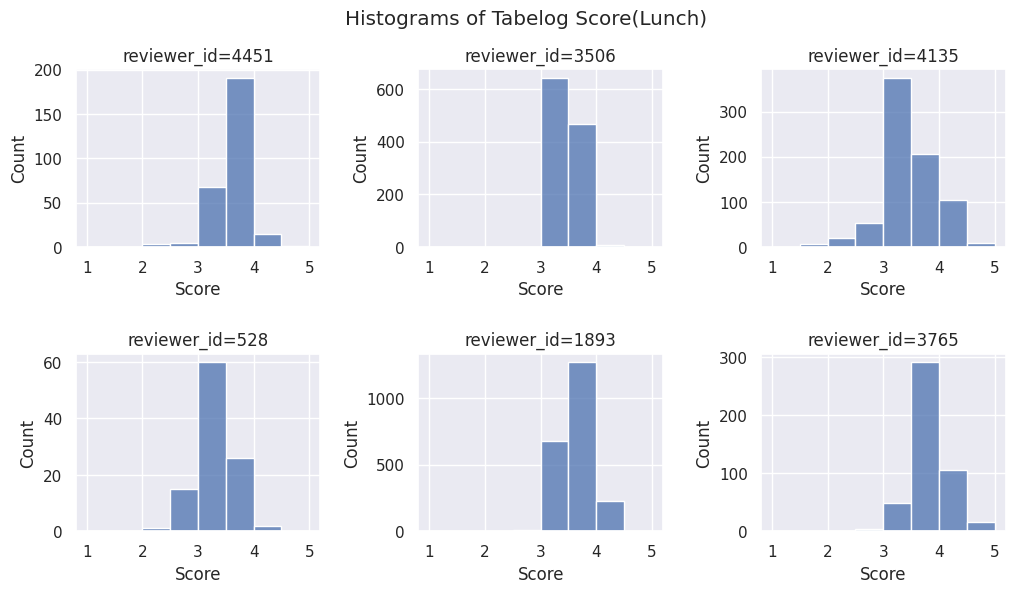

In [ ]:
# @title レビュワーごとの点数のヒストグラム
def plot_tabelog_score_histgram(scores, reviewer_id, inner_axes):
    sns.histplot(data=scores,
                 bins=[1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5],
                 ax=inner_axes)
    inner_axes.set_xlabel('Score')
    inner_axes.set_title(f'reviewer_id={reviewer_id}')

sns.set()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
fig.suptitle('Histograms of Tabelog Score(Lunch)')
for axes_index, row_index in enumerate(VALID_DATA_INDEXS[:6]):
    row_num = axes_index // 3
    col_num = axes_index % 3
    dummy_scores = get_dummy_tabelog_scores_from_row_index(row_index, lunch=True)
    reviewer_id = score_class_df.iloc[row_index].reviewer_id
    plot_tabelog_score_histgram(dummy_scores, reviewer_id, axes[row_num, col_num])
plt.show()

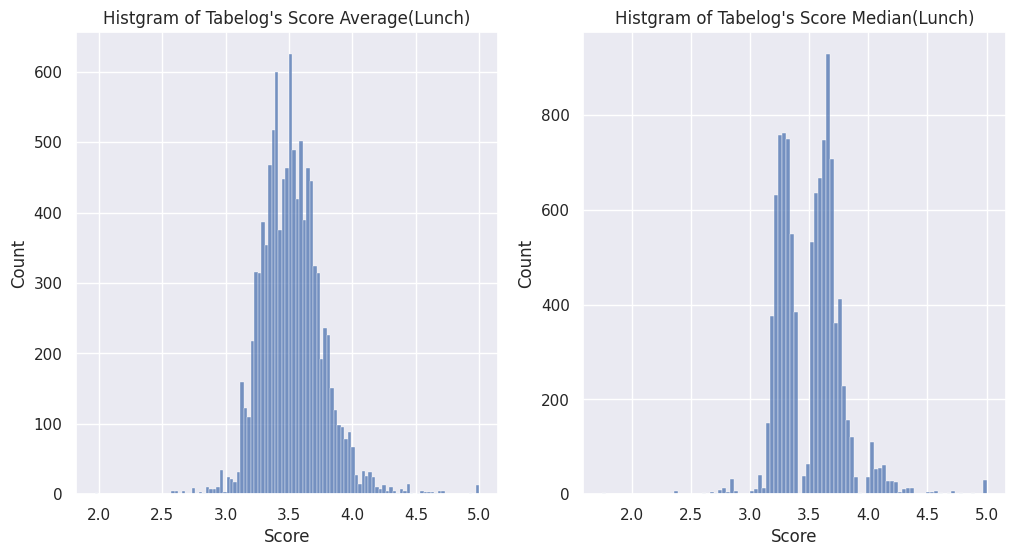

In [ ]:
# @title レビュワーの全投稿の平均点と中央値の分布


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
average_scores = list()
median_scores = list()
for row_index in range(len(score_class_df)):
    dummy_scores = get_dummy_tabelog_scores_from_row_index(row_index, lunch=True)
    if len(dummy_scores) <= 30:
        continue
    average_score = np.average(dummy_scores)
    average_scores.append(average_score)
    median_score = np.median(dummy_scores)
    median_scores.append(median_score)
axes1 = sns.histplot(data=average_scores,
                     ax=axes[0])
axes1.set_title("Histgram of Tabelog's Score Average(Lunch)")
axes1.set_xlabel('Score')
axes2 = sns.histplot(data=median_scores,
                     ax=axes[1])
axes2.set_title("Histgram of Tabelog's Score Median(Lunch)")
axes2.set_xlabel('Score')
plt.show()

del average_scores

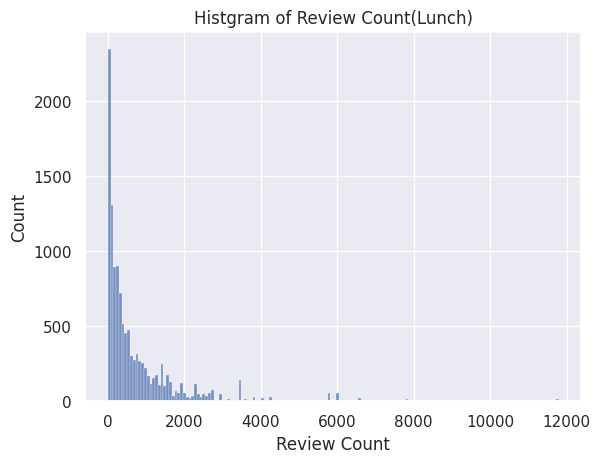

In [ ]:
# @title レビュワーの投稿数のヒストグラム


review_counts = score_class_df[LUNCH_CLASS_COLUMNS].sum(axis=1)
axes = sns.histplot(data=review_counts)
axes.set_title('Histgram of Review Count(Lunch)')
axes.set_xlabel('Review Count')
plt.show()

del review_counts

In [ ]:
#@title スケーリングの実行


if DO_FIRST_PREPROCESS:
    reviewer_ids = set()
    # interquartile_ranges = list()

    for row_index in range(len(score_class_df)):
        reviewer_id = score_class_df.iloc[row_index].reviewer_id
        if reviewer_id in reviewer_ids:
            continue
        reviewer_ids.add(reviewer_id)
        lunch_dummy_scores = get_dummy_tabelog_scores_from_row_index(
            row_index,
            lunch=True)
        # if len(lunch_dummy_scores) >= 30:
        #     q75, q25 = np.percentile(lunch_dummy_scores, [75, 25])
        #     interquartile_range = q75 - q25
        #     interquartile_ranges.append(interquartile_range)
        # dinner_dummy_scores = get_dummy_tabelog_scores_from_row_index(
        #     row_index,
        #     lunch=False)
        # if len(dinner_dummy_scores) >= 30:
        #     q75, q25 = np.percentile(dinner_dummy_scores, [75, 25])
        #     interquartile_range = q75 - q25
        #     interquartile_ranges.append(interquartile_range)

    # average_interquartile_range = np.average(interquartile_ranges)
    # del reviewer_ids, interquartile_ranges
    del reviewer_ids

    # def get_main_score_deviation(series):
    #     if series.main_score is None:
    #         return None
    #     if not series.time_category in (0, 1):
    #         return None
    #     reviewer_id = series.reviewer_id
    #     row_index = \
    #     score_class_df[score_class_df.reviewer_id == reviewer_id].index[0]
    #     is_lunch = (series.time_category == 0)
    #     dummy_scores = get_dummy_tabelog_scores_from_row_index(
    #         row_index,
    #         lunch=is_lunch)
    #     if len(dummy_scores) == 0:
    #         return None
    #     average_score = np.average(dummy_scores)
    #     q75, q25 = np.percentile(dummy_scores, [75, 25])
    #     if len(dummy_scores) > 30:
    #         interquartile_range = max((average_interquartile_range / 10) , (q75 - q25))
    #     else:
    #         interquartile_range = max(average_interquartile_range, (q75 - q25))
    #     normalized_iqr = interquartile_range / 1.3489
    #     robust_normalized_score = (series.main_score - average_score) / normalized_iqr
    #     return robust_normalized_score

    def get_main_score_deviation(series):
        if series.main_score is None:
            return None
        if not series.time_category in (0, 1):
            return None
        reviewer_id = series.reviewer_id
        row_index = \
        score_class_df[score_class_df.reviewer_id == reviewer_id].index[0]
        is_lunch = (series.time_category == 0)
        dummy_scores = get_dummy_tabelog_scores_from_row_index(
            row_index,
            lunch=is_lunch)
        if len(dummy_scores) == 0:
            return None
        average_score = np.average(dummy_scores)
        deviation = series.main_score - average_score
        return deviation

    review_df['main_score_deviation'] = review_df.apply(get_main_score_deviation, axis=1)

if DO_FIRST_PREPROCESS:
    review_df.to_csv(TABELOG_REVIEW_WITH_NORMALIZED_SCORE_CSV_PATH, index=False)

else:
    del review_df
    review_df = pd.read_csv(TABELOG_REVIEW_WITH_NORMALIZED_SCORE_CSV_PATH,
                            parse_dates=['year_month'])

# 『バズる』の可視化

<p>SNS上で特定の事物が注目を集めることを『バズる』といいます。ここでは、本ノートにおける『バズる』の定義を行う前段階として、まず『バズる』と直感的に"呼べる"現象を収集したデータから捕捉できるか調査します。</p>

## 店ごとの年度別の口コミ投稿数の推移の可視化

<p>流行るという概念を、時間軸と注目度で捉えるために、年度ごとの口コミ投稿数をグラフ化しました。</p>
<p>口コミ投稿数の増減を明確に観測できます。しかし、時系列分析(ARIMAなど)を行おうにも、サンプル数の不足は歴然で、既に分析の見通しがあやしいことが分かります。</p>
<p>日ごとの来店者数のデータなどがあれば、より深い分析も可能だと考えられますが、ある程度は妥協しながら分析を進めます。</p>

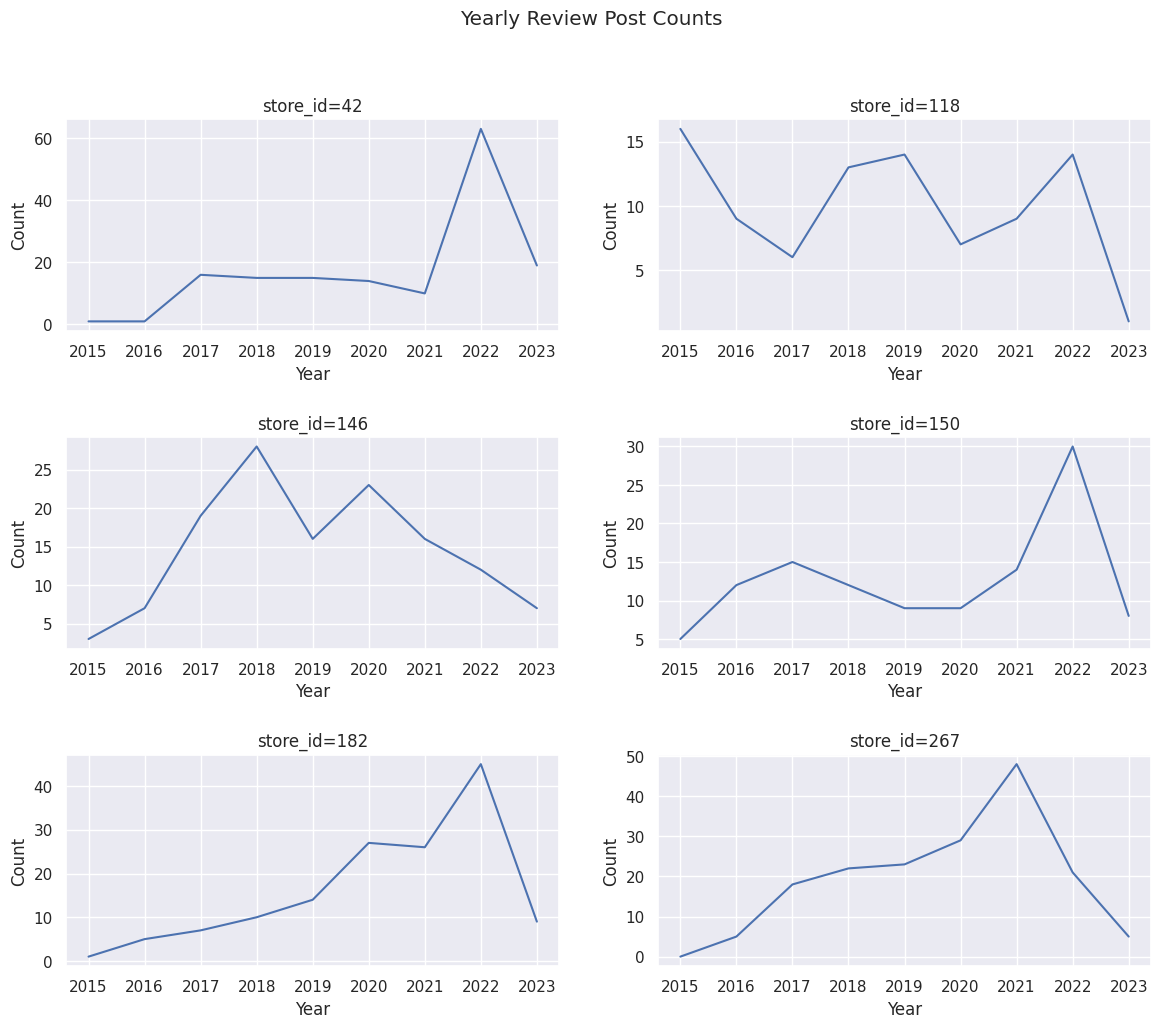

In [ ]:
#@title 店ごとの年度別の口コミ投稿数の推移(実装)


VALID_STORE_IDS = np.sort(review_df.store_id.unique())[review_df.groupby('store_id').count().year_month >= 130]
YEAR_RANGE = list(range(2015, 2024))
N_ROWS=3
N_COLS=2


def plot_review_histgram_by_year(store_id, axes=None):
    valid_reveiw_df = review_df[(review_df.store_id==store_id) & (review_df.year.isin(YEAR_RANGE))]
    year_size_series = valid_reveiw_df.groupby([review_df.year]).size().reindex(YEAR_RANGE).fillna(0)
    del valid_reveiw_df
    axes = year_size_series.plot(kind='line', ax=axes)
    del year_size_series
    axes.set_xlabel('Year')
    axes.set_ylabel('Count')
    axes.set_title(f'store_id={store_id}')

fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(14, 11))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
fig.suptitle('Yearly Review Post Counts')
for axes_index, store_id in enumerate(VALID_STORE_IDS[:(N_ROWS*N_COLS)]):
    row_num = axes_index // N_COLS
    col_num = axes_index % N_COLS
    plot_review_histgram_by_year(store_id, axes[row_num, col_num])
plt.show()

## 年度ごとの口コミ投稿数を集計したデータフレームの作成

前処理として、『バズる』に関係がありそうな時系列ごとの投稿数に関する特徴量を作成します。

In [ ]:
#@title 年度ごとの口コミ投稿数を集計したデータフレームの作成(実装)


if MAKE_POST_COUNT_DATAFRAME:


    def generate_year_month_to_2023_2(start_year_month):
        year_month_count = (2023 - start_year_month.year) * 12 + (2 - start_year_month.month)
        for i in range(year_month_count):
            year_month = start_year_month + (relativedelta(months=1) * (i+1))
            yield year_month

    store_id_to_yearly_post_count_series = review_df.groupby(['store_id', 'year']).size()
    store_id_to_monthly_post_count_series = review_df.groupby(['store_id', 'year_month']).size()
    store_id_to_yearly_post_count = dict()
    store_id_to_monthly_post_count = dict()
    for store_id in valid_store_ids:
        yearly_post_count = store_id_to_yearly_post_count_series[store_id]
        monthly_post_count = store_id_to_monthly_post_count_series[store_id]
        start_year = np.sort(yearly_post_count.index)[0]
        start_year += 1
        valid_years = list(range(int(start_year), 2023))
        del start_year
        store_id_to_yearly_post_count[store_id] = yearly_post_count.reindex(valid_years).fillna(0)
        del valid_years
        start_month = monthly_post_count.index[0]
        start_month += relativedelta(months=1)
        valid_months = list(generate_year_month_to_2023_2(start_month))
        del start_month
        store_id_to_monthly_post_count[store_id] = monthly_post_count.reindex(valid_months).fillna(0)
        del valid_months

    del store_id_to_yearly_post_count_series, store_id_to_monthly_post_count_series

    post_count_df = review_df[review_df.store_id.isin(valid_store_ids)].copy()

    def is_valid(series):
        yearly_post_count = store_id_to_yearly_post_count[series.store_id]
        if np.isnan(series.year):
            return False
        result = series.year in yearly_post_count.index
        return result

    post_count_df['valid'] = post_count_df.apply(is_valid, axis=1)
    post_count_df = post_count_df[post_count_df.valid]
    del post_count_df['valid']

    def get_yearly_post_count(series):
        yearly_post_count = store_id_to_yearly_post_count[series.store_id]
        post_count = yearly_post_count[series.year]
        return post_count

    def get_monthly_post_count(series):
        monthly_post_count = store_id_to_monthly_post_count[series.store_id]
        post_count = monthly_post_count[series.year_month]
        return post_count

    post_count_df2 = post_count_df.copy()
    post_count_df2['yearly_post_count'] = post_count_df.apply(get_yearly_post_count, axis=1)
    del post_count_df
    post_count_df3 = post_count_df2.copy()
    post_count_df3['monthly_post_count'] = post_count_df2.apply(get_monthly_post_count, axis=1)
    del post_count_df2

    def get_yearly_post_count_diff(series, next_year=False):
        yearly_post_count_diff = store_id_to_yearly_post_count[series.store_id].diff()
        year = series.year
        if next_year:
            year += 1
        if year == 2023:
            return None
        post_count_diff = yearly_post_count_diff[year]
        return post_count_diff

    post_count_df4 = post_count_df3.copy()
    post_count_df4['post_year_post_count_diff'] = \
    post_count_df3.apply(get_yearly_post_count_diff, axis=1)
    del post_count_df3
    post_count_df5 = post_count_df4.copy()
    get_next_year_post_count_diff = functools.partial(get_yearly_post_count_diff, next_year=True)
    post_count_df5['next_year_post_count_diff'] = \
    post_count_df4.apply(get_next_year_post_count_diff, axis=1)
    del post_count_df4

    end_month = pd.Period(None,
                          'M',
                          year=2023,
                          month=3)

    def get_monthly_post_count_diff(series, next_month=False):
        monthly_post_count_diff = store_id_to_monthly_post_count[series.store_id].diff()
        month = series.year_month
        if next_month:
            month += relativedelta(months=1)
        if month == end_month:
            return None
        post_count_diff = monthly_post_count_diff[month]
        return post_count_diff

    post_count_df6 = post_count_df5.copy()
    post_count_df6['post_month_post_count_diff'] = \
    post_count_df5.apply(get_monthly_post_count_diff, axis=1)
    del post_count_df5
    post_count_df = post_count_df6.copy()
    get_next_month_post_count_diff = functools.partial(get_monthly_post_count_diff, next_month=True)
    post_count_df['next_month_post_count_diff'] = \
    post_count_df6.apply(get_next_month_post_count_diff, axis=1)
    del post_count_df6
    del store_id_to_yearly_post_count, store_id_to_monthly_post_count



In [ ]:
#@title 年度ごとの口コミ投稿数を集計したデータフレームの保存・ロード


if MAKE_POST_COUNT_DATAFRAME:
    post_count_df.to_csv(TABELOG_POST_COUNT_CSV_PATH, index=False)

else:
    post_count_df = pd.read_csv(TABELOG_POST_COUNT_CSV_PATH,
                                parse_dates=['year_month'])

# 口コミの点数の影響度の検証


<p>ここでは、口コミの点数が『バズる』という現象に与える影響度を検証するために、月別の口コミの点数の平均値と投稿数の相関係数を求めました。</p>
<p>結論から述べると、店舗ごとの相関係数の平均は -0.04190 であり、この分析からは口コミの点数と投稿数の間に正の相関はみられませんでした。つまり、口コミの点数の平均が高ければ高いほど、SNS上で飲食店がバズるという相関は検出されませんでした。</p>
<p>口コミの点数の平均点について、その飲食店の流行具合と単純に結び付けられる指標ではないことに留意が必要です。</p>

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


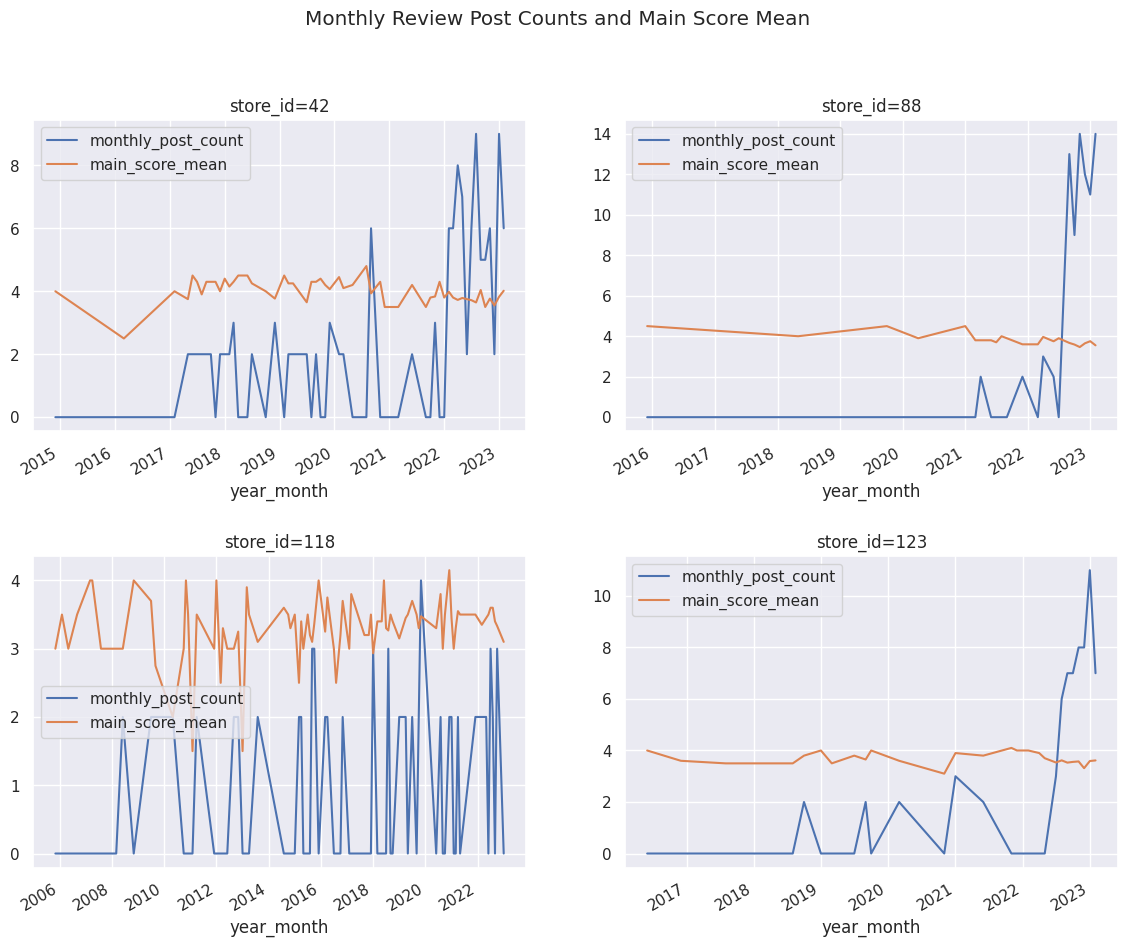

In [ ]:
#@title 口コミの点数の影響度の分析(実装)
N_ROWS = 2
N_COLS = 2


def generate_year_months_until_2023_3(start_year_month):
    year_month_count = (2023 - start_year_month.year) * 12 + (3 - start_year_month.month)
    for i in range(year_month_count):
        try:
            year_month = start_year_month + (i+1)
        except TypeError as e:
            # このエラーが例外に到達する場合と到達しない場合がある。原因不明.
            from dateutil.relativedelta import relativedelta
            year_month = start_year_month + relativedelta(months=i+1)
        yield year_month


valid_store_ids = np.sort(review_df.store_id.unique())[review_df.groupby('store_id').count().year_month >= 100]
store_id_to_monthly_post_count_series = review_df.groupby(['store_id', 'year_month']).size()
store_id_to_monthly_main_score_mean_series = review_df.groupby(['store_id', 'year_month']).mean().main_score
store_id_to_monthly_post_count = dict()

for store_id in valid_store_ids:
    monthly_post_count = store_id_to_monthly_post_count_series[store_id]
    start_month = monthly_post_count.index[0]
    complemented_months = list(generate_year_months_until_2023_3(start_month))
    del start_month
    monthly_post_count = monthly_post_count.reindex(complemented_months).fillna(0)
    del complemented_months
    valid_monthly_post_count = monthly_post_count[1:-1]
    store_id_to_monthly_post_count[store_id] = valid_monthly_post_count
    del valid_monthly_post_count
    del monthly_post_count

corrs = list()
fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(14, 11))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Monthly Review Post Counts and Main Score Mean')
for axes_index, store_id in enumerate(valid_store_ids):
    monthly_post_count = store_id_to_monthly_post_count[store_id]
    monthly_post_count[monthly_post_count == 1] = 0
    monthly_main_score_mean = store_id_to_monthly_main_score_mean_series[store_id]
    df = pd.DataFrame({'monthly_post_count':  monthly_post_count,
                       'main_score_mean': monthly_main_score_mean}).dropna()
    if axes_index < (N_ROWS*N_COLS):
        row_index = axes_index // N_COLS
        col_index = axes_index % N_COLS
        inner_axes = df.plot(kind='line',
                             ax=axes[row_index, col_index])
        inner_axes.set_title(f'store_id={store_id}')
    del monthly_post_count, monthly_main_score_mean
    corr = np.corrcoef(df.values.T)[0, 1]
    del df
    if np.isnan(corr):
        continue
    corrs.append(corr)
    del corr

corr_mean = np.mean(corrs)

del (valid_store_ids,
     store_id_to_monthly_post_count_series,
     store_id_to_monthly_main_score_mean_series,
     store_id_to_monthly_post_count,
     corrs)

In [ ]:
print(f'月ごとの口コミの投稿数と、点数の平均の相関係数の平均は {corr_mean: .5f} です.')

月ごとの口コミの投稿数と、点数の平均の相関係数の平均は -0.04190 です.


# 口コミの要素還元的な分析の有効性の検証

<p>次に、同一対象の表裏をこするだけに終止する分析の問題点を示します。<br>
ここで仮に、口コミの点数が飲食店を評価する指標として信頼できるとします。良い点数の口コミから高頻度で抽出される情報が飲食店にとって良い要素で。逆に、悪い点数の口コミから高頻度で抽出される情報が悪い要素であるという仮定のもとに分析を行い、その結果の妥当性について検証します。</p>

In [ ]:
def get_score_diviations(review_df):

    score_diviations = list()
    for idx, score_diviation in zip(review_df.comment_st_idx, review_df.main_score):
        if idx is None:
            continue
        if np.isnan(score_diviation):
            continue
        score_diviations.append(score_diviation)
    return score_diviations


def get_positive_negative_review_idxs(review_df):

    positive_review_st_idxs = list()
    positive_review_ed_idxs = list()
    neutral_review_st_idxs = list()
    neutral_review_ed_idxs = list()
    negative_review_st_idxs = list()
    negative_review_ed_idxs = list()
    score_diviations = get_score_diviations(review_df)
    positive_threshold, negative_threshold = np.percentile(score_diviations, [70, 30])
    for (st_idx,
         ed_idx,
         main_score_deviation) in zip(review_df.comment_st_idx,
                                      review_df.comment_ed_idx,
                                      review_df.main_score):
        if ((np.isnan(st_idx)) or
            (np.isnan(ed_idx)) or
            (np.isnan(main_score_deviation))):
            continue
        if main_score_deviation > positive_threshold:
            positive_review_st_idxs.append(int(st_idx))
            positive_review_ed_idxs.append(int(ed_idx))
        if main_score_deviation < negative_threshold:
            negative_review_st_idxs.append(int(st_idx))
            negative_review_ed_idxs.append(int(ed_idx))
        else:
            neutral_review_st_idxs.append(int(st_idx))
            neutral_review_ed_idxs.append(int(ed_idx))
    return (positive_review_st_idxs,
            positive_review_ed_idxs,
            neutral_review_st_idxs,
            neutral_review_ed_idxs,
            negative_review_st_idxs,
            negative_review_ed_idxs)


def is_alphabet_word(word):
    m = re.fullmatch(r'^[a-zA-Z0-9]+$', word)
    return not m is None


def do_nlp(nlp, text):
    word_num = 0
    try:
        tokens = nlp(text)
        word_num = len(tokens)
        return tokens, word_num
    except Exception as e:
        return None, word_num


def get_word_freq(tokens, targets=['NOUN',
                                   'PROPN',
                                   'ADJ',
                                   'ADV',
                                   'PRON']):
    counter = collections.Counter()
    if tokens is None:
        return counter
    for token in tokens:
        if not token.pos_ in targets:
            continue
        if is_alphabet_word(token.text):
            continue
        counter[token.text] += 1
    return counter


def calc_tfs(tokens, word_num):
    counter = get_word_freq(tokens)
    tfs = dict()
    for word, freq in counter.items():
        tf = freq / word_num
        assert isinstance(tf, float)
        tfs[word] = tf
    return tfs


def add_tfs(tfs_a, tfs_b):
    new_tfs = tfs_a.copy()
    for word, tf_b in tfs_b.items():
        tf_a = tfs_a.get(word)
        if tf_a is None:
            new_tfs[word] = tf_b
            continue
        new_tf = tf_a + tf_b
        new_tfs[word] = new_tf
    return new_tfs


def count_word_freq(counter, tokens):
    unique_words = set([token.text for token in tokens])
    for unique_word in unique_words:
         counter[unique_word] += 1


def calc_idf(word_freq, review_num):
    idfs = dict()
    for word, freq in word_freq.items():
        idf = np.log(review_num / freq)
        idfs[word] = idf
    return idfs


def calc_tfidfs(tfs, idfs):
    tfidfs = list()
    for word, tf in tfs.items():
        idf = idfs.get(word)
        tfidf = tf * idf
        tfidfs.append((word, tfidf))
    tfidf_df = pd.DataFrame(tfidfs, columns=['Word', 'TF-IDF'])
    tfidf_df = tfidf_df.sort_values(by='TF-IDF', ascending=False)
    return tfidf_df


def get_word_sum_of_tfidf_in_positive_negative_reviews(review_df,
                                                       murged_text):
    tfs_in_positive_reviews = dict()
    tfs_in_neutral_reviews = dict()
    tfs_in_negative_reviews = dict()

    word_freq = collections.Counter()

    nlp = spacy.load('ja_ginza')

    (positive_review_st_idxs,
     positive_review_ed_idxs,
     neutral_review_st_idxs,
     neutral_review_ed_idxs,
     negative_review_st_idxs,
     negative_review_ed_idxs) = \
     get_positive_negative_review_idxs(review_df)
    review_num = (len(positive_review_st_idxs) + \
                  len(neutral_review_st_idxs) + \
                  len(negative_review_st_idxs))
    for (positive_review_st_idx,
         positive_review_ed_idx) in zip(positive_review_st_idxs,
                                        positive_review_ed_idxs):
        text = murged_text[positive_review_st_idx:
                           positive_review_ed_idx]
        tokens, word_num = do_nlp(nlp, text)
        count_word_freq(word_freq, tokens)
        temp_tfs = calc_tfs(tokens, word_num)
        tfs_in_positive_reviews = add_tfs(tfs_in_positive_reviews,
                                          temp_tfs)
    for (neutral_review_st_idx,
         neutral_review_ed_idx) in zip(neutral_review_st_idxs,
                                        neutral_review_ed_idxs):
        text = murged_text[neutral_review_st_idx:
                           neutral_review_ed_idx]
        tokens, word_num = do_nlp(nlp, text)
        count_word_freq(word_freq, tokens)
    for (negative_review_st_idx,
         negative_review_ed_idx) in zip(negative_review_st_idxs,
                                        negative_review_ed_idxs):
        text = murged_text[negative_review_st_idx:
                           negative_review_ed_idx]
        tokens, word_num = do_nlp(nlp, text)
        count_word_freq(word_freq, tokens)
        temp_tfs = calc_tfs(tokens, word_num)
        tfs_in_negative_reviews = add_tfs(tfs_in_negative_reviews,
                                          temp_tfs)
    idfs = calc_idf(word_freq, review_num)
    tfidfs_in_positive_reviews_df = calc_tfidfs(tfs_in_positive_reviews, idfs)
    tfidfs_in_negative_reviews_df = calc_tfidfs(tfs_in_negative_reviews, idfs)
    return (tfidfs_in_positive_reviews_df,
            tfidfs_in_negative_reviews_df)


if MAKE_TF_IDFS_DATAFRAME:
    (tfidfs_in_positive_reviews_df,
     tfidfs_in_negative_reviews_df) = \
     get_word_sum_of_tfidf_in_positive_negative_reviews(review_df,
                                                        comment_strings_series)
    tfidfs_in_positive_reviews_df.to_csv(TF_IDF_IN_POSITIVE_TABELOG_REVIEWS_CSV_PATH, index=False)
    tfidfs_in_negative_reviews_df.to_csv(TF_IDF_IN_NEGATIVE_TABELOG_REVIEWS_CSV_PATH, index=False)
else:
    tfidfs_in_positive_reviews_df = pd.read_csv(TF_IDF_IN_POSITIVE_TABELOG_REVIEWS_CSV_PATH)
    tfidfs_in_negative_reviews_df = pd.read_csv(TF_IDF_IN_NEGATIVE_TABELOG_REVIEWS_CSV_PATH)

In [ ]:
tfidfs_in_positive_reviews_df.head(10)

,Word,TF-IDF
0,ラーメン,15.454039
1,円,14.740873
2,つけ麺,14.410486
3,麺,13.757698
4,\n,13.359082
5,美味しい,12.823522
6,スープ,12.350428
7,チャーシュー,12.195603
8,塩,12.102575
9,煮干し,11.557000


In [ ]:
def get_differ_of_keywords(keyword_df_a, keyword_df_b, ratio_threshold=2.0):
    differ_keyword_df = keyword_df_a.copy()
    drop_keywords = list()
    for keyword, tfidf_a in zip(keyword_df_a.Word,
                                keyword_df_a['TF-IDF']):
        tfidfs_b = keyword_df_b[keyword_df_b.Word == keyword]['TF-IDF']
        if len(tfidfs_b) == 1:
            tfidf_b = tfidfs_b.array[0]
            if tfidf_a / tfidf_b < ratio_threshold:
                drop_keywords.append(keyword)
    differ_keyword_df = differ_keyword_df[~differ_keyword_df.Word.isin(drop_keywords)]
    return differ_keyword_df

In [ ]:
tfidfs_in_positive_reviews_without_common_word_df = get_differ_of_keywords(
    tfidfs_in_positive_reviews_df,
    tfidfs_in_negative_reviews_df,
)
tfidfs_in_negative_reviews_without_common_word_df = get_differ_of_keywords(
    tfidfs_in_negative_reviews_df,
    tfidfs_in_positive_reviews_df,
)

In [ ]:
tfidfs_in_positive_reviews_without_common_word_df.head(20)

,Word,TF-IDF
8,塩,12.102575
9,煮干し,11.557000
11,味玉,10.818197
16,鶏,10.103780
22,二郎,9.395783
24,特製,9.196264
32,限定,8.472821
46,旨い,7.262687
51,最高,7.033142
64,美味い,6.418351


In [ ]:
tfidfs_in_negative_reviews_without_common_word_df.head(20)

,Word,TF-IDF
3,普通,13.371567
6,餃子,12.421745
11,油そば,10.916017
25,ちょっと,8.869321
29,セット,8.538410
50,とんこつ,7.324646
56,あまり,6.913964
59,残念,6.789010
61,定食,6.782585
67,博多,6.628855


In [ ]:
from transformers import BertJapaneseTokenizer, BertModel, BertForMaskedLM
from transformers import BertConfig
from transformers import BertForMaskedLM

model_name = 'cl-tohoku/bert-base-japanese-v3'
tokenizer = BertJapaneseTokenizer.from_pretrained(model_name)


def get_corpas(review_df, comment_strings_series):

    reviews = list()
    for st_idx, ed_idx in zip(review_df.comment_st_idx,
                              review_df.comment_ed_idx):
        if ((np.isnan(st_idx)) or
            (np.isnan(ed_idx))):
            continue
        st_idx = int(st_idx)
        ed_idx = int(ed_idx)
        review = comment_strings_series[st_idx: ed_idx]
        reviews.append(review)
        corpas = '\n'.join(reviews)
    return corpas


if MAKE_CORPUS:

    with open(CORPUS_PATH, 'w') as f:
        corpas = get_corpas(review_df, comment_strings_series)
        f.write(corpas)
else:
    with open(CORPUS_PATH, 'r') as f:
        corpas = f.read()

In [ ]:
def extract_all_keywords(corpas):
    nlp = spacy.load('ja_ginza')
    reviews = corpas.split()
    all_keywords = set()
    for review in reviews:
        tokens, unused_word_num = do_nlp(nlp, review)
        for token in tokens:
            all_keywords.add(token.text)
    return all_keywords

if MAKE_TOKENIZER:
    add_vocabs = extract_all_keywords(corpas)
    tokenizer.add_tokens(add_vocabs)
    tokenizer.save_pretrained(PRETRAINED_TOKENIZER_PATH)
else:
    tokenizer = BertJapaneseTokenizer.from_pretrained(PRETRAINED_TOKENIZER_PATH)

In [ ]:
def fine_tunning(model, tokenizer, data_path):

    model.resize_token_embeddings(len(tokenizer))
    config = BertConfig(vocab_size=len(tokenizer))

    text_column_name = "text"

    def tokenize_function(examples):
        text = [
            line
            for line in examples[text_column_name]
            if len(line) > 0 and not line.isspace()
        ]
        print(text)
        return tokenizer(
            text,
            padding=True,
            truncation=True,
            max_length=512,
        )

    raw_datasets = load_dataset("text", data_files=data_path, split="train")
    tokenized_datasets = raw_datasets.map(
        tokenize_function,
        batched=True,
        load_from_cache_file=False,
        remove_columns=[text_column_name]
    )

    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=True,
        mlm_probability= 0.15
    )

    training_args = TrainingArguments(
        output_dir=TABELOG_BERT_DIR_PATH,
        overwrite_output_dir=True,
        num_train_epochs=10,
        per_device_train_batch_size=8,
        save_steps=10000,
        save_total_limit=2,
        prediction_loss_only=True
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=tokenized_datasets,
    )

    trainer.train()

    return trainer

if DO_FINETUNING:
    model = BertForMaskedLM.from_pretrained(model_name)
    trainer = fine_tunning(model, tokenizer, CORPUS_PATH)
    trainer.save_model(TABELOG_FINETUNNING_MODEL_PATH)
else:
    model = BertForMaskedLM.from_pretrained(model_name)
    tokenizer = BertJapaneseTokenizer.from_pretrained(model_name)
    # model = BertForMaskedLM.from_pretrained(TABELOG_FINETUNNING_MODEL_PATH)

### TODO:
  店の評価と直接関連する単語（「良い」と「悪い」）と類似度の高い単語をTF-IDFの結果から除去する。<br>ファインチューニング済みのモデルを元に各単語の単語の分散表現を調べ、コサイン類似度を調べる。

In [ ]:
tokenizer.convert_tokens_to_ids(['良い'])

[14459]

In [ ]:
def get_input_list(review_df, comment_strings_series, tokenizer):

    input_list = list()
    for st_idx, ed_idx in zip(review_df.comment_st_idx,
                              review_df.comment_ed_idx):
        if ((np.isnan(st_idx)) or
            (np.isnan(ed_idx))):
            continue
        st_idx = int(st_idx)
        ed_idx = int(ed_idx)
        review = comment_strings_series[st_idx: ed_idx]
        input = tokenizer(review, return_tensors="pt")
        input_list.append(input)
    return input_list

In [ ]:
input_list = get_input_list(review_df, comment_strings_series, tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (542 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
model.eval()

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32768, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [ ]:
# last_hidden_statesPre = torch.Tensor()
word_embeddings = list()
for input in tqdm(input_list):
    with torch.no_grad():
        outputs = model(**input_tensor, output_hidden_states=True)
        print(outputs.keys())
    if not outputs.hidden_states is None:
        # 隠れ層の最後のベクトルを取得
        word_embedding = outputs.hidden_states[-1]
        word_embeddings.append(word_embedding)



  0%|          | 2/14845 [00:00<36:21,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 4/14845 [00:00<34:47,  7.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 6/14845 [00:00<35:03,  7.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 8/14845 [00:01<34:54,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 10/14845 [00:01<34:43,  7.12it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 12/14845 [00:01<34:41,  7.13it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 14/14845 [00:01<35:01,  7.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 16/14845 [00:02<34:45,  7.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 18/14845 [00:02<34:18,  7.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 20/14845 [00:02<35:39,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 22/14845 [00:03<34:57,  7.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 24/14845 [00:03<34:42,  7.12it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 26/14845 [00:03<36:10,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 28/14845 [00:04<40:22,  6.12it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 30/14845 [00:04<42:42,  5.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 32/14845 [00:04<43:12,  5.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 34/14845 [00:05<43:21,  5.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 35/14845 [00:05<43:01,  5.74it/s]

odict_keys(['logits', 'hidden_states'])


  0%|          | 36/14845 [00:05<46:46,  5.28it/s]

odict_keys(['logits', 'hidden_states'])


  0%|          | 38/14845 [00:05<47:59,  5.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 39/14845 [00:06<46:35,  5.30it/s]

odict_keys(['logits', 'hidden_states'])


  0%|          | 40/14845 [00:06<49:17,  5.01it/s]

odict_keys(['logits', 'hidden_states'])


  0%|          | 41/14845 [00:06<51:12,  4.82it/s]

odict_keys(['logits', 'hidden_states'])


  0%|          | 43/14845 [00:06<49:22,  5.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 45/14845 [00:07<50:00,  4.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 46/14845 [00:07<51:49,  4.76it/s]

odict_keys(['logits', 'hidden_states'])


  0%|          | 48/14845 [00:07<49:30,  4.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 50/14845 [00:08<44:46,  5.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 51/14845 [00:08<43:38,  5.65it/s]

odict_keys(['logits', 'hidden_states'])


  0%|          | 52/14845 [00:08<47:40,  5.17it/s]

odict_keys(['logits', 'hidden_states'])


  0%|          | 54/14845 [00:09<46:35,  5.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 56/14845 [00:09<40:09,  6.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 58/14845 [00:09<38:03,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 60/14845 [00:09<38:04,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 62/14845 [00:10<36:32,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 64/14845 [00:10<37:00,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 66/14845 [00:10<35:55,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 68/14845 [00:11<36:18,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 70/14845 [00:11<35:17,  6.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 72/14845 [00:11<37:23,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  0%|          | 74/14845 [00:12<37:56,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 76/14845 [00:12<36:17,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 78/14845 [00:12<35:11,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 80/14845 [00:12<36:17,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 82/14845 [00:13<39:08,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 84/14845 [00:13<36:43,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 86/14845 [00:13<36:15,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 88/14845 [00:14<37:15,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 90/14845 [00:14<36:33,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 92/14845 [00:14<37:24,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 94/14845 [00:15<35:49,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 96/14845 [00:15<35:15,  6.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 98/14845 [00:15<36:18,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 100/14845 [00:15<36:50,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 102/14845 [00:16<36:41,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 104/14845 [00:16<35:26,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 106/14845 [00:16<36:18,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 108/14845 [00:17<37:00,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 110/14845 [00:17<37:02,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 112/14845 [00:17<37:25,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 114/14845 [00:17<36:03,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 116/14845 [00:18<37:11,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 118/14845 [00:18<36:48,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 120/14845 [00:18<35:39,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 122/14845 [00:19<40:05,  6.12it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 123/14845 [00:19<41:24,  5.92it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 124/14845 [00:19<46:09,  5.32it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 125/14845 [00:19<49:15,  4.98it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 126/14845 [00:20<51:36,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 127/14845 [00:20<53:06,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 128/14845 [00:20<54:11,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 130/14845 [00:20<51:57,  4.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 131/14845 [00:21<48:51,  5.02it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 132/14845 [00:21<51:14,  4.79it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 134/14845 [00:21<49:26,  4.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 135/14845 [00:21<46:44,  5.25it/s]

odict_keys(['logits', 'hidden_states'])


  1%|          | 137/14845 [00:22<48:38,  5.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 139/14845 [00:22<46:41,  5.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 141/14845 [00:23<43:36,  5.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 143/14845 [00:23<43:00,  5.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 145/14845 [00:23<47:33,  5.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 147/14845 [00:24<40:43,  6.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 149/14845 [00:24<37:32,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 151/14845 [00:24<37:15,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 153/14845 [00:24<35:10,  6.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 155/14845 [00:25<36:17,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 157/14845 [00:25<35:39,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 159/14845 [00:25<34:35,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 161/14845 [00:26<34:02,  7.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 163/14845 [00:26<33:51,  7.23it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 165/14845 [00:26<34:13,  7.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 167/14845 [00:26<33:58,  7.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 169/14845 [00:27<35:31,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 171/14845 [00:27<37:08,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 173/14845 [00:27<35:27,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 175/14845 [00:28<34:48,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 177/14845 [00:28<34:19,  7.12it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 179/14845 [00:28<34:37,  7.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 181/14845 [00:28<35:11,  6.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 183/14845 [00:29<35:40,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|          | 185/14845 [00:29<35:10,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 187/14845 [00:29<37:32,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 189/14845 [00:30<35:54,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 191/14845 [00:30<35:54,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 193/14845 [00:30<35:10,  6.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 195/14845 [00:31<34:21,  7.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 197/14845 [00:31<34:27,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 199/14845 [00:31<36:11,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 201/14845 [00:31<37:04,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 203/14845 [00:32<35:21,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 205/14845 [00:32<35:10,  6.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 207/14845 [00:32<36:12,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 209/14845 [00:33<35:08,  6.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 211/14845 [00:33<34:29,  7.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 213/14845 [00:33<33:58,  7.18it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 215/14845 [00:33<37:47,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 217/14845 [00:34<40:49,  5.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  1%|▏         | 218/14845 [00:34<44:56,  5.42it/s]

odict_keys(['logits', 'hidden_states'])


  1%|▏         | 219/14845 [00:34<47:40,  5.11it/s]

odict_keys(['logits', 'hidden_states'])


  1%|▏         | 220/14845 [00:34<49:44,  4.90it/s]

odict_keys(['logits', 'hidden_states'])


  1%|▏         | 221/14845 [00:35<51:06,  4.77it/s]

odict_keys(['logits', 'hidden_states'])


  1%|▏         | 222/14845 [00:35<52:41,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 223/14845 [00:35<53:10,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 224/14845 [00:35<53:31,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 226/14845 [00:36<52:05,  4.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 228/14845 [00:36<48:03,  5.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 230/14845 [00:37<44:59,  5.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 231/14845 [00:37<43:29,  5.60it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 232/14845 [00:37<47:23,  5.14it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 233/14845 [00:37<49:58,  4.87it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 234/14845 [00:37<51:49,  4.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 237/14845 [00:38<46:57,  5.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 239/14845 [00:38<42:04,  5.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 241/14845 [00:39<38:25,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 243/14845 [00:39<36:24,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 245/14845 [00:39<36:32,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 247/14845 [00:39<35:33,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 249/14845 [00:40<35:49,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 251/14845 [00:40<34:41,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 253/14845 [00:40<34:45,  7.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 255/14845 [00:41<34:32,  7.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 257/14845 [00:41<34:20,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 259/14845 [00:41<35:13,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 261/14845 [00:41<34:28,  7.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 263/14845 [00:42<34:34,  7.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 265/14845 [00:42<34:37,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 267/14845 [00:42<34:34,  7.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 269/14845 [00:43<34:56,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 271/14845 [00:43<34:32,  7.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 273/14845 [00:43<34:34,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 275/14845 [00:43<34:11,  7.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 277/14845 [00:44<34:17,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 279/14845 [00:44<34:06,  7.12it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 281/14845 [00:44<33:52,  7.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 283/14845 [00:45<35:03,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 285/14845 [00:45<34:13,  7.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 287/14845 [00:45<34:06,  7.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 289/14845 [00:45<33:59,  7.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 291/14845 [00:46<34:25,  7.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 293/14845 [00:46<35:14,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 295/14845 [00:46<34:42,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 297/14845 [00:47<34:15,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 299/14845 [00:47<35:13,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 301/14845 [00:47<34:32,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 303/14845 [00:47<34:12,  7.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 305/14845 [00:48<34:33,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 307/14845 [00:48<36:16,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 309/14845 [00:48<40:21,  6.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 310/14845 [00:49<44:27,  5.45it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 311/14845 [00:49<47:35,  5.09it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 312/14845 [00:49<49:41,  4.87it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 313/14845 [00:49<51:16,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 314/14845 [00:49<52:14,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 315/14845 [00:50<53:00,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 317/14845 [00:50<52:06,  4.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 319/14845 [00:51<49:58,  4.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 320/14845 [00:51<51:44,  4.68it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 322/14845 [00:51<48:54,  4.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 323/14845 [00:51<47:02,  5.14it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 324/14845 [00:52<49:29,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


  2%|▏         | 326/14845 [00:52<46:26,  5.21it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 328/14845 [00:52<45:12,  5.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 330/14845 [00:53<40:41,  5.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 332/14845 [00:53<37:49,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 334/14845 [00:53<35:55,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 336/14845 [00:53<34:49,  6.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 338/14845 [00:54<35:21,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 340/14845 [00:54<35:06,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 342/14845 [00:54<35:39,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 344/14845 [00:55<34:40,  6.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 346/14845 [00:55<37:59,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 348/14845 [00:55<36:46,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 350/14845 [00:56<36:55,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 352/14845 [00:56<35:17,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 354/14845 [00:56<34:56,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 356/14845 [00:56<34:26,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 358/14845 [00:57<33:42,  7.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 360/14845 [00:57<35:54,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 362/14845 [00:57<34:54,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 364/14845 [00:58<35:13,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 366/14845 [00:58<34:29,  7.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 368/14845 [00:58<36:12,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  2%|▏         | 370/14845 [00:58<34:54,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 372/14845 [00:59<34:36,  6.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 374/14845 [00:59<34:51,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 376/14845 [00:59<34:24,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 378/14845 [01:00<34:11,  7.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 380/14845 [01:00<33:46,  7.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 382/14845 [01:00<34:22,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 384/14845 [01:00<34:21,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 386/14845 [01:01<34:08,  7.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 388/14845 [01:01<34:02,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 390/14845 [01:01<34:20,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 392/14845 [01:02<34:12,  7.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 394/14845 [01:02<33:54,  7.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 396/14845 [01:02<35:16,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 398/14845 [01:02<34:24,  7.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 400/14845 [01:03<40:25,  5.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 401/14845 [01:03<44:46,  5.38it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 402/14845 [01:03<47:34,  5.06it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 403/14845 [01:03<49:43,  4.84it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 404/14845 [01:04<51:05,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 405/14845 [01:04<52:14,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 407/14845 [01:04<49:52,  4.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 409/14845 [01:05<45:39,  5.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 411/14845 [01:05<42:34,  5.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 412/14845 [01:05<46:19,  5.19it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 413/14845 [01:05<48:48,  4.93it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 415/14845 [01:06<48:29,  4.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 416/14845 [01:06<50:31,  4.76it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 418/14845 [01:07<49:28,  4.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 419/14845 [01:07<51:10,  4.70it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 421/14845 [01:07<47:42,  5.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 423/14845 [01:07<40:34,  5.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 425/14845 [01:08<37:41,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 427/14845 [01:08<35:29,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 429/14845 [01:08<37:00,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 431/14845 [01:09<35:12,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 433/14845 [01:09<35:10,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 435/14845 [01:09<34:25,  6.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 437/14845 [01:09<34:14,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 439/14845 [01:10<33:53,  7.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 441/14845 [01:10<33:36,  7.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 443/14845 [01:10<33:37,  7.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 445/14845 [01:11<34:22,  6.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 447/14845 [01:11<33:35,  7.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 449/14845 [01:11<34:18,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 451/14845 [01:11<34:31,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 453/14845 [01:12<37:28,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 455/14845 [01:12<35:19,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 457/14845 [01:12<35:29,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 459/14845 [01:13<34:24,  6.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 461/14845 [01:13<34:08,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 463/14845 [01:13<34:27,  6.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 465/14845 [01:13<34:36,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 467/14845 [01:14<33:50,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 469/14845 [01:14<34:34,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 471/14845 [01:14<34:11,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 473/14845 [01:15<34:04,  7.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 475/14845 [01:15<34:14,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 477/14845 [01:15<34:02,  7.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 479/14845 [01:15<34:32,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 481/14845 [01:16<36:02,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 483/14845 [01:16<35:03,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 485/14845 [01:16<34:33,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 487/14845 [01:17<34:25,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 489/14845 [01:17<34:37,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 490/14845 [01:17<37:18,  6.41it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 491/14845 [01:17<42:43,  5.60it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 492/14845 [01:18<46:24,  5.15it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 493/14845 [01:18<48:52,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 494/14845 [01:18<50:47,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 495/14845 [01:18<52:03,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 496/14845 [01:19<53:04,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 497/14845 [01:19<53:33,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 498/14845 [01:19<54:26,  4.39it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 499/14845 [01:19<53:21,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 500/14845 [01:19<53:56,  4.43it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 502/14845 [01:20<49:41,  4.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 504/14845 [01:20<44:28,  5.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 506/14845 [01:20<42:08,  5.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 508/14845 [01:21<40:48,  5.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 510/14845 [01:21<41:13,  5.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 512/14845 [01:21<40:14,  5.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 513/14845 [01:22<40:09,  5.95it/s]

odict_keys(['logits', 'hidden_states'])


  3%|▎         | 515/14845 [01:22<41:48,  5.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 517/14845 [01:22<37:41,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  3%|▎         | 519/14845 [01:23<37:11,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 521/14845 [01:23<35:47,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 523/14845 [01:23<34:43,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 525/14845 [01:23<34:21,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 527/14845 [01:24<34:52,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 529/14845 [01:24<35:29,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 531/14845 [01:24<34:48,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 533/14845 [01:25<35:24,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 535/14845 [01:25<37:05,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 537/14845 [01:25<35:10,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 539/14845 [01:26<34:46,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 541/14845 [01:26<34:43,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 543/14845 [01:26<34:36,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 545/14845 [01:26<33:47,  7.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 547/14845 [01:27<33:43,  7.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 549/14845 [01:27<34:16,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 551/14845 [01:27<33:41,  7.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 553/14845 [01:28<33:58,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▎         | 555/14845 [01:28<34:10,  6.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 557/14845 [01:28<35:21,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 559/14845 [01:28<33:57,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 561/14845 [01:29<33:42,  7.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 563/14845 [01:29<35:24,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 565/14845 [01:29<34:37,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 567/14845 [01:30<34:03,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 569/14845 [01:30<33:58,  7.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 571/14845 [01:30<34:20,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 573/14845 [01:30<35:39,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 575/14845 [01:31<34:31,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 577/14845 [01:31<34:51,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 579/14845 [01:31<33:53,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 581/14845 [01:32<33:50,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 583/14845 [01:32<35:48,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 584/14845 [01:32<41:35,  5.71it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 585/14845 [01:32<45:52,  5.18it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 586/14845 [01:33<48:16,  4.92it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 587/14845 [01:33<50:15,  4.73it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 588/14845 [01:33<51:31,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 589/14845 [01:33<52:47,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 590/14845 [01:34<53:16,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 592/14845 [01:34<51:03,  4.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 593/14845 [01:34<50:49,  4.67it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 594/14845 [01:34<52:04,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 596/14845 [01:35<47:21,  5.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 597/14845 [01:35<44:56,  5.28it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 598/14845 [01:35<46:44,  5.08it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 600/14845 [01:36<46:07,  5.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 601/14845 [01:36<44:29,  5.34it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 602/14845 [01:36<47:43,  4.97it/s]

odict_keys(['logits', 'hidden_states'])


  4%|▍         | 604/14845 [01:36<45:27,  5.22it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 606/14845 [01:37<40:17,  5.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 608/14845 [01:37<37:07,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 610/14845 [01:37<35:35,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 612/14845 [01:37<34:56,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 614/14845 [01:38<34:07,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 616/14845 [01:38<34:23,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 618/14845 [01:38<34:18,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 620/14845 [01:39<34:03,  6.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 622/14845 [01:39<35:07,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 624/14845 [01:39<35:12,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 626/14845 [01:40<34:42,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 628/14845 [01:40<34:33,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 630/14845 [01:40<36:37,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 632/14845 [01:40<35:48,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 634/14845 [01:41<36:42,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 636/14845 [01:41<35:02,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 638/14845 [01:41<35:03,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 640/14845 [01:42<33:59,  6.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 642/14845 [01:42<33:40,  7.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 644/14845 [01:42<33:32,  7.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 646/14845 [01:42<33:29,  7.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 648/14845 [01:43<34:48,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 650/14845 [01:43<33:51,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 652/14845 [01:43<34:18,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 654/14845 [01:44<34:10,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 656/14845 [01:44<33:39,  7.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 658/14845 [01:44<33:47,  7.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 660/14845 [01:44<33:50,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 662/14845 [01:45<34:03,  6.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 664/14845 [01:45<33:34,  7.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 666/14845 [01:45<35:54,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  4%|▍         | 668/14845 [01:46<36:18,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 670/14845 [01:46<35:25,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 672/14845 [01:46<37:15,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 674/14845 [01:47<40:51,  5.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 675/14845 [01:47<41:01,  5.76it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 676/14845 [01:47<44:59,  5.25it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 677/14845 [01:47<47:42,  4.95it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 678/14845 [01:48<49:41,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 679/14845 [01:48<50:58,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 680/14845 [01:48<51:29,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 682/14845 [01:48<47:51,  4.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 683/14845 [01:49<49:31,  4.77it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 684/14845 [01:49<50:31,  4.67it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 685/14845 [01:49<51:15,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 686/14845 [01:49<51:50,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 687/14845 [01:50<52:14,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 688/14845 [01:50<52:28,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 689/14845 [01:50<52:37,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▍         | 691/14845 [01:50<49:46,  4.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 693/14845 [01:51<44:01,  5.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 695/14845 [01:51<40:40,  5.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 697/14845 [01:51<36:49,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 699/14845 [01:52<37:00,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 701/14845 [01:52<35:13,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 703/14845 [01:52<34:43,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 705/14845 [01:52<34:05,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 707/14845 [01:53<34:31,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 709/14845 [01:53<33:49,  6.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 711/14845 [01:53<33:39,  7.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 713/14845 [01:54<34:21,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 715/14845 [01:54<34:07,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 717/14845 [01:54<34:01,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 719/14845 [01:55<33:44,  6.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 721/14845 [01:55<33:52,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 723/14845 [01:55<34:00,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 725/14845 [01:55<33:38,  7.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 727/14845 [01:56<34:58,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 729/14845 [01:56<34:02,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 731/14845 [01:56<34:24,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 733/14845 [01:57<33:43,  6.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 735/14845 [01:57<34:56,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 737/14845 [01:57<34:24,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 739/14845 [01:57<33:58,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▍         | 741/14845 [01:58<33:58,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 743/14845 [01:58<33:20,  7.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 745/14845 [01:58<33:03,  7.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 747/14845 [01:59<32:51,  7.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 749/14845 [01:59<33:31,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 751/14845 [01:59<33:39,  6.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 753/14845 [01:59<33:18,  7.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 755/14845 [02:00<33:18,  7.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 757/14845 [02:00<33:27,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 759/14845 [02:00<33:38,  6.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 761/14845 [02:01<35:02,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 762/14845 [02:01<40:30,  5.80it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 763/14845 [02:01<44:28,  5.28it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 765/14845 [02:01<45:25,  5.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 766/14845 [02:02<47:32,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 767/14845 [02:02<49:06,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 768/14845 [02:02<50:26,  4.65it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 769/14845 [02:02<51:01,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 770/14845 [02:03<51:30,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 771/14845 [02:03<51:49,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 773/14845 [02:03<47:37,  4.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 775/14845 [02:04<47:32,  4.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 777/14845 [02:04<48:36,  4.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 778/14845 [02:04<48:18,  4.85it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 780/14845 [02:05<47:09,  4.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 782/14845 [02:05<42:51,  5.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 784/14845 [02:05<38:11,  6.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 786/14845 [02:06<35:58,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 788/14845 [02:06<34:16,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 790/14845 [02:06<34:44,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 792/14845 [02:06<34:01,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 794/14845 [02:07<34:04,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 796/14845 [02:07<34:08,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 798/14845 [02:07<33:47,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 800/14845 [02:08<34:31,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 801/14845 [02:08<40:11,  5.82it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 802/14845 [02:08<43:57,  5.32it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 803/14845 [02:08<47:08,  4.96it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 805/14845 [02:09<47:15,  4.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 807/14845 [02:09<45:15,  5.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 809/14845 [02:09<43:32,  5.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 810/14845 [02:10<46:18,  5.05it/s]

odict_keys(['logits', 'hidden_states'])


  5%|▌         | 812/14845 [02:10<47:06,  4.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 814/14845 [02:10<43:23,  5.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  5%|▌         | 816/14845 [02:11<41:30,  5.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 817/14845 [02:11<44:56,  5.20it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 818/14845 [02:11<47:20,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 819/14845 [02:11<48:53,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 820/14845 [02:12<50:21,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 821/14845 [02:12<51:28,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 822/14845 [02:12<51:56,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 824/14845 [02:12<45:25,  5.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 826/14845 [02:13<39:14,  5.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 828/14845 [02:13<37:12,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 830/14845 [02:13<36:33,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 832/14845 [02:14<34:19,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 834/14845 [02:14<33:43,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 836/14845 [02:14<33:34,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 838/14845 [02:14<33:14,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 840/14845 [02:15<33:09,  7.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 841/14845 [02:15<32:59,  7.07it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 842/14845 [02:15<37:51,  6.17it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 843/14845 [02:15<42:18,  5.51it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 844/14845 [02:16<45:38,  5.11it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 845/14845 [02:16<47:52,  4.87it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 846/14845 [02:16<50:01,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 847/14845 [02:16<50:55,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 848/14845 [02:16<51:33,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 849/14845 [02:17<52:04,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 850/14845 [02:17<52:30,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 852/14845 [02:17<50:29,  4.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 853/14845 [02:18<51:41,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 855/14845 [02:18<50:34,  4.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 856/14845 [02:18<49:10,  4.74it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 857/14845 [02:18<50:21,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 858/14845 [02:19<51:17,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▌         | 860/14845 [02:19<47:06,  4.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 862/14845 [02:19<41:36,  5.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 864/14845 [02:20<37:54,  6.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 866/14845 [02:20<35:27,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 868/14845 [02:20<34:34,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 870/14845 [02:21<34:02,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 872/14845 [02:21<33:32,  6.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 874/14845 [02:21<34:17,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 876/14845 [02:21<34:14,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 878/14845 [02:22<33:53,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 880/14845 [02:22<33:23,  6.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 882/14845 [02:22<33:27,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 884/14845 [02:23<34:28,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 886/14845 [02:23<34:50,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 888/14845 [02:23<34:07,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 890/14845 [02:23<35:55,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 892/14845 [02:24<34:18,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 894/14845 [02:24<33:57,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 896/14845 [02:24<34:23,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 898/14845 [02:25<34:40,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 900/14845 [02:25<35:08,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 902/14845 [02:25<34:21,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 904/14845 [02:26<34:20,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 906/14845 [02:26<33:21,  6.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 908/14845 [02:26<32:59,  7.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 910/14845 [02:26<32:47,  7.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 912/14845 [02:27<33:33,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 914/14845 [02:27<33:06,  7.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 916/14845 [02:27<34:51,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 918/14845 [02:28<33:57,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 920/14845 [02:28<34:44,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 922/14845 [02:28<33:37,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 924/14845 [02:28<34:05,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▌         | 926/14845 [02:29<33:43,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 928/14845 [02:29<35:05,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 930/14845 [02:29<38:04,  6.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 932/14845 [02:30<40:30,  5.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 934/14845 [02:30<41:11,  5.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 936/14845 [02:30<41:07,  5.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 937/14845 [02:31<44:36,  5.20it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 938/14845 [02:31<47:01,  4.93it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 939/14845 [02:31<48:51,  4.74it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 940/14845 [02:31<50:38,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 942/14845 [02:32<48:48,  4.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 944/14845 [02:32<44:11,  5.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 945/14845 [02:32<42:27,  5.46it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 946/14845 [02:33<45:41,  5.07it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 947/14845 [02:33<47:46,  4.85it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 948/14845 [02:33<49:10,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 950/14845 [02:33<46:47,  4.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 951/14845 [02:34<48:05,  4.81it/s]

odict_keys(['logits', 'hidden_states'])


  6%|▋         | 953/14845 [02:34<47:26,  4.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 955/14845 [02:34<40:02,  5.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 957/14845 [02:35<37:09,  6.23it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 959/14845 [02:35<38:28,  6.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 961/14845 [02:35<36:10,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  6%|▋         | 963/14845 [02:36<34:37,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 965/14845 [02:36<36:14,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 967/14845 [02:36<35:39,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 969/14845 [02:36<34:09,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 971/14845 [02:37<33:54,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 973/14845 [02:37<36:25,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 975/14845 [02:37<35:06,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 977/14845 [02:38<34:03,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 979/14845 [02:38<35:34,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 981/14845 [02:38<34:22,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 983/14845 [02:39<33:34,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 985/14845 [02:39<34:44,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 987/14845 [02:39<36:38,  6.30it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 989/14845 [02:40<35:08,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 991/14845 [02:40<34:24,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 993/14845 [02:40<34:01,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 995/14845 [02:40<34:51,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 997/14845 [02:41<34:25,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 999/14845 [02:41<35:41,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1001/14845 [02:41<34:35,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1003/14845 [02:42<33:59,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1005/14845 [02:42<33:42,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1007/14845 [02:42<33:24,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1009/14845 [02:42<32:57,  7.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1011/14845 [02:43<32:59,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1013/14845 [02:43<33:40,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1015/14845 [02:43<33:21,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1017/14845 [02:44<33:17,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1019/14845 [02:44<32:57,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1021/14845 [02:44<38:20,  6.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1023/14845 [02:45<39:26,  5.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1024/14845 [02:45<43:20,  5.32it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1026/14845 [02:45<44:08,  5.22it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1027/14845 [02:45<46:40,  4.93it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1028/14845 [02:46<48:30,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1029/14845 [02:46<50:23,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1030/14845 [02:46<51:15,  4.49it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1031/14845 [02:46<49:51,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1032/14845 [02:47<49:59,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1033/14845 [02:47<50:39,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1035/14845 [02:47<48:57,  4.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1036/14845 [02:47<49:58,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1038/14845 [02:48<47:38,  4.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1039/14845 [02:48<44:52,  5.13it/s]

odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1041/14845 [02:48<44:16,  5.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1043/14845 [02:49<40:17,  5.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1045/14845 [02:49<36:38,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1047/14845 [02:49<36:06,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1049/14845 [02:50<35:47,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1051/14845 [02:50<34:08,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1053/14845 [02:50<35:15,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1055/14845 [02:51<33:50,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1057/14845 [02:51<33:36,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1059/14845 [02:51<33:36,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1061/14845 [02:51<33:32,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1063/14845 [02:52<32:52,  6.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1065/14845 [02:52<34:06,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1067/14845 [02:52<34:38,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1069/14845 [02:53<33:25,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1071/14845 [02:53<33:50,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1073/14845 [02:53<33:26,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1075/14845 [02:53<33:30,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1077/14845 [02:54<32:53,  6.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1079/14845 [02:54<33:11,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1081/14845 [02:54<33:29,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1083/14845 [02:55<34:16,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1085/14845 [02:55<36:33,  6.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1087/14845 [02:55<35:00,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1089/14845 [02:56<34:08,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1091/14845 [02:56<33:34,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1093/14845 [02:56<32:54,  6.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1095/14845 [02:56<33:50,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1097/14845 [02:57<33:27,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1099/14845 [02:57<33:17,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1101/14845 [02:57<33:04,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1103/14845 [02:58<32:53,  6.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1105/14845 [02:58<32:37,  7.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1107/14845 [02:58<33:01,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1109/14845 [02:59<33:26,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1111/14845 [02:59<37:26,  6.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  7%|▋         | 1113/14845 [02:59<38:50,  5.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1114/14845 [02:59<43:40,  5.24it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1115/14845 [03:00<46:19,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1116/14845 [03:00<48:47,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1117/14845 [03:00<49:54,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1118/14845 [03:00<50:38,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1119/14845 [03:01<51:12,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1120/14845 [03:01<49:46,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1121/14845 [03:01<50:00,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1122/14845 [03:01<51:02,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1124/14845 [03:02<47:56,  4.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1126/14845 [03:02<42:58,  5.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1127/14845 [03:02<41:58,  5.45it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1129/14845 [03:03<43:52,  5.21it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1130/14845 [03:03<45:33,  5.02it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1132/14845 [03:03<47:00,  4.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1134/14845 [03:04<39:39,  5.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1136/14845 [03:04<36:56,  6.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1138/14845 [03:04<35:06,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1140/14845 [03:04<33:51,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1142/14845 [03:05<34:07,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1144/14845 [03:05<33:09,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1146/14845 [03:05<33:18,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1148/14845 [03:06<33:10,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1150/14845 [03:06<33:10,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1152/14845 [03:06<33:14,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1154/14845 [03:06<32:54,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1156/14845 [03:07<33:31,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1158/14845 [03:07<32:50,  6.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1160/14845 [03:07<32:59,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1162/14845 [03:08<33:10,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1164/14845 [03:08<33:19,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1166/14845 [03:08<33:29,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1168/14845 [03:08<33:52,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1170/14845 [03:09<33:56,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1172/14845 [03:09<33:20,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1174/14845 [03:09<33:09,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1176/14845 [03:10<33:20,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1178/14845 [03:10<33:37,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1180/14845 [03:10<33:20,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1182/14845 [03:11<34:00,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1184/14845 [03:11<33:42,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1186/14845 [03:11<33:17,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1188/14845 [03:11<33:05,  6.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1190/14845 [03:12<32:57,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1192/14845 [03:12<32:59,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1194/14845 [03:12<34:05,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1196/14845 [03:13<33:28,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1198/14845 [03:13<33:21,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1200/14845 [03:13<34:02,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1201/14845 [03:13<39:17,  5.79it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1202/14845 [03:14<43:02,  5.28it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1203/14845 [03:14<45:30,  5.00it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1204/14845 [03:14<47:41,  4.77it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1205/14845 [03:14<48:45,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1206/14845 [03:15<49:11,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1207/14845 [03:15<49:34,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1208/14845 [03:15<50:05,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1210/14845 [03:15<47:04,  4.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1212/14845 [03:16<44:20,  5.12it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1213/14845 [03:16<42:30,  5.35it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1214/14845 [03:16<45:17,  5.02it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1215/14845 [03:16<46:25,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1216/14845 [03:17<47:49,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1217/14845 [03:17<47:43,  4.76it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1218/14845 [03:17<48:55,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1220/14845 [03:17<46:16,  4.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1222/14845 [03:18<43:48,  5.18it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1224/14845 [03:18<38:25,  5.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1226/14845 [03:18<38:15,  5.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1228/14845 [03:19<35:48,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1230/14845 [03:19<34:27,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1232/14845 [03:19<33:26,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1234/14845 [03:20<33:09,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1236/14845 [03:20<33:03,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1238/14845 [03:20<33:04,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1240/14845 [03:20<33:08,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1242/14845 [03:21<32:53,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1244/14845 [03:21<34:48,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1246/14845 [03:21<33:49,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1248/14845 [03:22<33:19,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1250/14845 [03:22<32:47,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1252/14845 [03:22<33:09,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1254/14845 [03:23<33:45,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1256/14845 [03:23<33:40,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1258/14845 [03:23<35:32,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  8%|▊         | 1260/14845 [03:23<35:16,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1262/14845 [03:24<33:37,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1264/14845 [03:24<33:36,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1266/14845 [03:24<32:59,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1268/14845 [03:25<34:05,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1270/14845 [03:25<34:18,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1272/14845 [03:25<34:10,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1274/14845 [03:26<34:24,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1276/14845 [03:26<34:43,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1278/14845 [03:26<34:06,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1280/14845 [03:26<33:28,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1282/14845 [03:27<33:15,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1284/14845 [03:27<32:55,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1286/14845 [03:27<33:23,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1288/14845 [03:28<34:34,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1290/14845 [03:28<37:39,  6.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1292/14845 [03:28<38:37,  5.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1294/14845 [03:29<40:00,  5.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1295/14845 [03:29<40:25,  5.59it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1296/14845 [03:29<43:45,  5.16it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1297/14845 [03:29<46:20,  4.87it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▊         | 1298/14845 [03:30<47:45,  4.73it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1299/14845 [03:30<48:46,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1301/14845 [03:30<47:17,  4.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1303/14845 [03:31<43:51,  5.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1304/14845 [03:31<46:02,  4.90it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1305/14845 [03:31<47:54,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1306/14845 [03:31<48:25,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1308/14845 [03:32<47:52,  4.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1309/14845 [03:32<49:22,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1311/14845 [03:32<45:20,  4.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1313/14845 [03:33<41:28,  5.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1315/14845 [03:33<37:16,  6.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1317/14845 [03:33<35:54,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1319/14845 [03:34<34:15,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1321/14845 [03:34<34:32,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1323/14845 [03:34<33:33,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1325/14845 [03:34<34:00,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1327/14845 [03:35<33:46,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1329/14845 [03:35<33:10,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1331/14845 [03:35<33:13,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1333/14845 [03:36<33:40,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1335/14845 [03:36<34:38,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1337/14845 [03:36<33:35,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1339/14845 [03:37<34:40,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1341/14845 [03:37<35:07,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1343/14845 [03:37<34:07,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1345/14845 [03:37<32:57,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1347/14845 [03:38<33:23,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1349/14845 [03:38<33:04,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1351/14845 [03:38<32:38,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1353/14845 [03:39<33:15,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1355/14845 [03:39<32:37,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1357/14845 [03:39<32:53,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1359/14845 [03:40<32:18,  6.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1361/14845 [03:40<33:15,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1363/14845 [03:40<32:44,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1365/14845 [03:40<32:48,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1367/14845 [03:41<32:53,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1369/14845 [03:41<32:46,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1371/14845 [03:41<33:12,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1373/14845 [03:42<32:33,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1375/14845 [03:42<33:17,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1377/14845 [03:42<32:44,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1379/14845 [03:42<32:34,  6.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1381/14845 [03:43<36:44,  6.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1382/14845 [03:43<37:37,  5.96it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1383/14845 [03:43<41:29,  5.41it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1384/14845 [03:43<44:28,  5.04it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1385/14845 [03:44<46:33,  4.82it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1386/14845 [03:44<47:52,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1387/14845 [03:44<48:47,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1388/14845 [03:44<49:41,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1389/14845 [03:45<50:10,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1390/14845 [03:45<50:58,  4.40it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1392/14845 [03:45<48:07,  4.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1393/14845 [03:45<48:57,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1394/14845 [03:46<48:49,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1395/14845 [03:46<49:56,  4.49it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1396/14845 [03:46<50:21,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1398/14845 [03:47<46:55,  4.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1400/14845 [03:47<44:28,  5.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1402/14845 [03:47<38:30,  5.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1404/14845 [03:48<35:52,  6.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1406/14845 [03:48<33:56,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1408/14845 [03:48<33:45,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


  9%|▉         | 1410/14845 [03:48<33:25,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1412/14845 [03:49<33:14,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1414/14845 [03:49<33:08,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1416/14845 [03:49<33:12,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1418/14845 [03:50<32:52,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1420/14845 [03:50<32:54,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1422/14845 [03:50<33:20,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1424/14845 [03:50<32:42,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1426/14845 [03:51<33:02,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1428/14845 [03:51<33:08,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1430/14845 [03:51<33:00,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1432/14845 [03:52<33:00,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1434/14845 [03:52<33:56,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1436/14845 [03:52<34:47,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1438/14845 [03:53<33:17,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1440/14845 [03:53<32:41,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1442/14845 [03:53<33:14,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1444/14845 [03:53<32:33,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1446/14845 [03:54<32:15,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1448/14845 [03:54<32:17,  6.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1450/14845 [03:54<32:34,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1452/14845 [03:55<32:33,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1454/14845 [03:55<32:20,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1456/14845 [03:55<35:13,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1458/14845 [03:56<33:54,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1460/14845 [03:56<34:11,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1462/14845 [03:56<35:09,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1464/14845 [03:57<36:03,  6.18it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1466/14845 [03:57<36:41,  6.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1467/14845 [03:57<41:26,  5.38it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1468/14845 [03:57<44:15,  5.04it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1469/14845 [03:58<46:25,  4.80it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1470/14845 [03:58<48:41,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1471/14845 [03:58<49:28,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1472/14845 [03:58<49:58,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1474/14845 [03:59<47:51,  4.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1476/14845 [03:59<44:28,  5.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1477/14845 [03:59<44:01,  5.06it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1478/14845 [03:59<46:08,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1479/14845 [04:00<47:41,  4.67it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1480/14845 [04:00<49:15,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1481/14845 [04:00<50:00,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 10%|▉         | 1483/14845 [04:01<47:34,  4.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1485/14845 [04:01<46:51,  4.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1486/14845 [04:01<48:14,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 10%|█         | 1487/14845 [04:01<48:55,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 10%|█         | 1489/14845 [04:02<46:13,  4.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1491/14845 [04:02<38:52,  5.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1493/14845 [04:02<37:35,  5.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1495/14845 [04:03<35:58,  6.18it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1497/14845 [04:03<34:42,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1499/14845 [04:03<33:58,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1501/14845 [04:04<34:32,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1503/14845 [04:04<33:35,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1505/14845 [04:04<32:54,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1507/14845 [04:05<32:43,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1509/14845 [04:05<33:58,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1511/14845 [04:05<34:28,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1513/14845 [04:06<33:23,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1515/14845 [04:06<32:36,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1517/14845 [04:06<32:36,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1519/14845 [04:06<32:05,  6.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1521/14845 [04:07<32:53,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1523/14845 [04:07<32:20,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1525/14845 [04:07<32:20,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1527/14845 [04:08<32:43,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1529/14845 [04:08<34:28,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1531/14845 [04:08<33:36,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1533/14845 [04:09<34:40,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1535/14845 [04:09<33:15,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1537/14845 [04:09<33:04,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1539/14845 [04:09<32:22,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1541/14845 [04:10<32:55,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1543/14845 [04:10<32:55,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1545/14845 [04:10<33:49,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1547/14845 [04:11<36:02,  6.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1549/14845 [04:11<34:08,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1551/14845 [04:11<33:46,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1553/14845 [04:12<33:55,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1555/14845 [04:12<36:07,  6.13it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 10%|█         | 1557/14845 [04:12<39:04,  5.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1559/14845 [04:13<39:37,  5.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1560/14845 [04:13<39:37,  5.59it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1561/14845 [04:13<42:50,  5.17it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1562/14845 [04:13<45:34,  4.86it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1563/14845 [04:14<46:56,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1564/14845 [04:14<47:43,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1565/14845 [04:14<49:13,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1566/14845 [04:14<50:21,  4.39it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1568/14845 [04:15<48:21,  4.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1570/14845 [04:15<45:31,  4.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1571/14845 [04:15<45:45,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1572/14845 [04:15<47:27,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1574/14845 [04:16<45:50,  4.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1576/14845 [04:16<41:33,  5.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1578/14845 [04:17<42:01,  5.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1580/14845 [04:17<37:01,  5.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1582/14845 [04:17<35:23,  6.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1584/14845 [04:18<33:35,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1586/14845 [04:18<33:24,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1588/14845 [04:18<32:29,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1590/14845 [04:18<32:26,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1592/14845 [04:19<32:25,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1594/14845 [04:19<32:39,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1596/14845 [04:19<32:23,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1598/14845 [04:20<32:00,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1600/14845 [04:20<32:36,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1602/14845 [04:20<32:25,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1604/14845 [04:20<32:30,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1606/14845 [04:21<31:58,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1608/14845 [04:21<33:19,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1610/14845 [04:21<32:53,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1612/14845 [04:22<32:49,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1614/14845 [04:22<33:03,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1616/14845 [04:22<32:48,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1618/14845 [04:23<32:18,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1620/14845 [04:23<32:23,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1622/14845 [04:23<32:54,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1624/14845 [04:23<32:34,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1626/14845 [04:24<33:23,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1628/14845 [04:24<34:02,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1630/14845 [04:24<33:55,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1632/14845 [04:25<32:52,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1634/14845 [04:25<33:02,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1636/14845 [04:25<32:58,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1638/14845 [04:26<32:39,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1640/14845 [04:26<32:22,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1642/14845 [04:26<33:10,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1644/14845 [04:26<33:37,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1646/14845 [04:27<36:26,  6.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1648/14845 [04:27<38:38,  5.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1650/14845 [04:28<38:53,  5.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1652/14845 [04:28<39:03,  5.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1653/14845 [04:28<42:30,  5.17it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1654/14845 [04:28<44:56,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1655/14845 [04:29<46:29,  4.73it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1656/14845 [04:29<47:38,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1657/14845 [04:29<48:16,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1658/14845 [04:29<49:04,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1659/14845 [04:30<49:38,  4.43it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1660/14845 [04:30<50:07,  4.38it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1661/14845 [04:30<50:40,  4.34it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1662/14845 [04:30<50:32,  4.35it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1663/14845 [04:30<51:18,  4.28it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1664/14845 [04:31<50:46,  4.33it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1665/14845 [04:31<50:33,  4.34it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█         | 1667/14845 [04:31<46:26,  4.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█         | 1669/14845 [04:32<40:09,  5.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1671/14845 [04:32<35:54,  6.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1673/14845 [04:32<36:09,  6.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1675/14845 [04:33<34:55,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1677/14845 [04:33<33:04,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1679/14845 [04:33<32:53,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1681/14845 [04:33<32:40,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1683/14845 [04:34<32:36,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1685/14845 [04:34<32:39,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1687/14845 [04:34<32:25,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1689/14845 [04:35<32:08,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1690/14845 [04:35<33:45,  6.49it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1691/14845 [04:35<38:26,  5.70it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1692/14845 [04:35<41:59,  5.22it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1693/14845 [04:35<44:23,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1694/14845 [04:36<46:19,  4.73it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1695/14845 [04:36<47:36,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1696/14845 [04:36<48:07,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1697/14845 [04:36<48:37,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1698/14845 [04:37<48:58,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1699/14845 [04:37<49:16,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1701/14845 [04:37<44:54,  4.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1703/14845 [04:38<40:49,  5.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1705/14845 [04:38<40:11,  5.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 11%|█▏        | 1707/14845 [04:38<41:34,  5.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1709/14845 [04:39<39:29,  5.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1711/14845 [04:39<38:20,  5.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1712/14845 [04:39<37:52,  5.78it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1714/14845 [04:40<39:15,  5.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1716/14845 [04:40<36:36,  5.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1718/14845 [04:40<34:37,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1720/14845 [04:40<34:05,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1722/14845 [04:41<33:24,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1724/14845 [04:41<33:32,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1725/14845 [04:41<38:02,  5.75it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1726/14845 [04:42<41:28,  5.27it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1727/14845 [04:42<43:52,  4.98it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1728/14845 [04:42<45:37,  4.79it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1729/14845 [04:42<47:04,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1730/14845 [04:42<47:50,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1732/14845 [04:43<46:23,  4.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1734/14845 [04:43<41:45,  5.23it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1735/14845 [04:43<44:16,  4.93it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1736/14845 [04:44<45:53,  4.76it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1738/14845 [04:44<45:23,  4.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1739/14845 [04:44<46:44,  4.67it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1740/14845 [04:45<47:32,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1741/14845 [04:45<47:54,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1743/14845 [04:45<46:45,  4.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1745/14845 [04:46<42:20,  5.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1747/14845 [04:46<37:27,  5.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1749/14845 [04:46<34:50,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1751/14845 [04:46<33:29,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1753/14845 [04:47<35:16,  6.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1755/14845 [04:47<33:40,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1757/14845 [04:47<32:38,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1759/14845 [04:48<33:30,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1761/14845 [04:48<32:49,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1763/14845 [04:48<32:30,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1765/14845 [04:49<32:43,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1767/14845 [04:49<32:34,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1769/14845 [04:49<32:05,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1771/14845 [04:49<32:05,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1773/14845 [04:50<32:03,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1775/14845 [04:50<32:15,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1777/14845 [04:50<31:42,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1779/14845 [04:51<31:51,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1781/14845 [04:51<32:11,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1783/14845 [04:51<31:52,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1785/14845 [04:52<31:46,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1787/14845 [04:52<32:01,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1789/14845 [04:52<32:11,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1791/14845 [04:52<32:09,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1793/14845 [04:53<31:58,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1795/14845 [04:53<32:17,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1797/14845 [04:53<32:08,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1799/14845 [04:54<31:31,  6.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1801/14845 [04:54<32:16,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1803/14845 [04:54<32:07,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1805/14845 [04:54<32:07,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1807/14845 [04:55<32:43,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1809/14845 [04:55<33:07,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1811/14845 [04:55<32:46,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1812/14845 [04:56<37:02,  5.87it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1813/14845 [04:56<40:33,  5.36it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1814/14845 [04:56<43:01,  5.05it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1815/14845 [04:56<45:25,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1816/14845 [04:57<46:56,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1817/14845 [04:57<47:42,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1818/14845 [04:57<48:41,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1819/14845 [04:57<49:47,  4.36it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1820/14845 [04:57<49:46,  4.36it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1822/14845 [04:58<46:33,  4.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1823/14845 [04:58<47:30,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1825/14845 [04:59<46:37,  4.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1826/14845 [04:59<43:38,  4.97it/s]

odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1828/14845 [04:59<42:37,  5.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1830/14845 [04:59<40:43,  5.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1832/14845 [05:00<40:29,  5.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1834/14845 [05:00<38:08,  5.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1836/14845 [05:00<36:17,  5.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1838/14845 [05:01<33:50,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1840/14845 [05:01<33:27,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1842/14845 [05:01<33:05,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1844/14845 [05:02<32:05,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1846/14845 [05:02<31:55,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1848/14845 [05:02<32:20,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1850/14845 [05:03<32:02,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1852/14845 [05:03<31:49,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 12%|█▏        | 1854/14845 [05:03<32:27,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1856/14845 [05:03<32:30,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1858/14845 [05:04<33:38,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1860/14845 [05:04<34:28,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1862/14845 [05:04<33:42,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1864/14845 [05:05<32:23,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1866/14845 [05:05<33:16,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1868/14845 [05:05<33:58,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1870/14845 [05:06<33:07,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1872/14845 [05:06<32:30,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1874/14845 [05:06<33:06,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1876/14845 [05:07<32:20,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1878/14845 [05:07<31:59,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1880/14845 [05:07<31:49,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1882/14845 [05:07<31:55,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1884/14845 [05:08<31:48,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1886/14845 [05:08<32:40,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1888/14845 [05:08<32:36,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1890/14845 [05:09<31:59,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1892/14845 [05:09<31:37,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1894/14845 [05:09<31:41,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1896/14845 [05:10<31:54,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1898/14845 [05:10<33:42,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1899/14845 [05:10<38:43,  5.57it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1901/14845 [05:10<39:52,  5.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1903/14845 [05:11<39:07,  5.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1905/14845 [05:11<38:39,  5.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1906/14845 [05:11<41:38,  5.18it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1907/14845 [05:12<43:52,  4.92it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1908/14845 [05:12<45:34,  4.73it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1909/14845 [05:12<46:44,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1911/14845 [05:12<43:19,  4.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1913/14845 [05:13<39:56,  5.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1914/14845 [05:13<40:57,  5.26it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1916/14845 [05:13<41:27,  5.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1918/14845 [05:14<39:03,  5.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1919/14845 [05:14<40:30,  5.32it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1920/14845 [05:14<43:13,  4.98it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1921/14845 [05:14<44:34,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1923/14845 [05:15<41:19,  5.21it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1925/14845 [05:15<36:13,  5.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1927/14845 [05:15<34:54,  6.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1929/14845 [05:16<34:47,  6.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1931/14845 [05:16<32:51,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1933/14845 [05:16<32:47,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1935/14845 [05:17<32:24,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1937/14845 [05:17<31:53,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1939/14845 [05:17<31:35,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1941/14845 [05:17<31:17,  6.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1943/14845 [05:18<31:25,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1945/14845 [05:18<31:02,  6.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1947/14845 [05:18<32:12,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1949/14845 [05:19<32:31,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1951/14845 [05:19<31:41,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1953/14845 [05:19<32:31,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1955/14845 [05:20<32:00,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1957/14845 [05:20<33:11,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1959/14845 [05:20<32:29,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1961/14845 [05:20<33:05,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1963/14845 [05:21<33:25,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1965/14845 [05:21<32:26,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1967/14845 [05:21<31:55,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1969/14845 [05:22<32:25,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1971/14845 [05:22<31:56,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1973/14845 [05:22<31:53,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1975/14845 [05:23<31:51,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1977/14845 [05:23<31:49,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1979/14845 [05:23<32:14,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1981/14845 [05:24<33:15,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1983/14845 [05:24<32:56,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1985/14845 [05:24<34:08,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1987/14845 [05:24<32:21,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1989/14845 [05:25<32:53,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1991/14845 [05:25<36:03,  5.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1992/14845 [05:25<40:06,  5.34it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1993/14845 [05:26<43:19,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1994/14845 [05:26<45:10,  4.74it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1995/14845 [05:26<46:25,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1996/14845 [05:26<47:15,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1997/14845 [05:26<47:39,  4.49it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 1998/14845 [05:27<48:08,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 2000/14845 [05:27<46:31,  4.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 2001/14845 [05:27<47:48,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 2003/14845 [05:28<46:29,  4.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 13%|█▎        | 2004/14845 [05:28<43:24,  4.93it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2006/14845 [05:28<42:54,  4.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2008/14845 [05:29<41:27,  5.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2009/14845 [05:29<40:10,  5.33it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2011/14845 [05:29<39:50,  5.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2013/14845 [05:30<36:11,  5.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2015/14845 [05:30<34:07,  6.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2017/14845 [05:30<33:01,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2019/14845 [05:31<32:03,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2021/14845 [05:31<31:28,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2023/14845 [05:31<32:08,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2025/14845 [05:31<31:45,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2027/14845 [05:32<31:26,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2029/14845 [05:32<32:27,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2031/14845 [05:32<31:49,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2033/14845 [05:33<31:42,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2035/14845 [05:33<31:14,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2037/14845 [05:33<32:25,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2039/14845 [05:33<31:34,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▎        | 2041/14845 [05:34<31:40,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2043/14845 [05:34<31:58,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2045/14845 [05:34<32:05,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2047/14845 [05:35<31:26,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2049/14845 [05:35<31:19,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2051/14845 [05:35<32:11,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2053/14845 [05:36<31:21,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2055/14845 [05:36<31:06,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2057/14845 [05:36<31:52,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2059/14845 [05:36<31:09,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2061/14845 [05:37<31:02,  6.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2063/14845 [05:37<31:12,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2065/14845 [05:37<31:17,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2067/14845 [05:38<31:19,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2069/14845 [05:38<31:10,  6.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2071/14845 [05:38<32:54,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2073/14845 [05:39<32:18,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2075/14845 [05:39<31:56,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2077/14845 [05:39<31:34,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2079/14845 [05:40<35:07,  6.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2081/14845 [05:40<36:50,  5.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2082/14845 [05:40<37:41,  5.64it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2083/14845 [05:40<40:58,  5.19it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2084/14845 [05:41<43:18,  4.91it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2085/14845 [05:41<45:14,  4.70it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2086/14845 [05:41<46:15,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2087/14845 [05:41<47:01,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2088/14845 [05:41<47:49,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2090/14845 [05:42<44:02,  4.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2091/14845 [05:42<41:35,  5.11it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2092/14845 [05:42<44:28,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2093/14845 [05:42<45:51,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2094/14845 [05:43<46:38,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2095/14845 [05:43<47:04,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2096/14845 [05:43<46:27,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2098/14845 [05:44<44:50,  4.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2100/14845 [05:44<42:06,  5.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2102/14845 [05:44<36:31,  5.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2104/14845 [05:45<34:46,  6.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2106/14845 [05:45<32:41,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2108/14845 [05:45<32:38,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2110/14845 [05:45<32:20,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2112/14845 [05:46<31:45,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2114/14845 [05:46<31:38,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2116/14845 [05:46<33:17,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2118/14845 [05:47<33:23,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2120/14845 [05:47<31:56,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2122/14845 [05:47<32:55,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2124/14845 [05:48<31:54,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2126/14845 [05:48<31:52,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2128/14845 [05:48<31:25,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2130/14845 [05:48<32:42,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2132/14845 [05:49<31:40,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2134/14845 [05:49<31:25,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2136/14845 [05:49<31:53,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2138/14845 [05:50<31:45,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2140/14845 [05:50<31:30,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2142/14845 [05:50<31:25,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2144/14845 [05:51<33:14,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2146/14845 [05:51<32:17,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2148/14845 [05:51<33:04,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2150/14845 [05:52<33:16,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 14%|█▍        | 2152/14845 [05:52<31:53,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2154/14845 [05:52<32:50,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2156/14845 [05:52<31:48,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2158/14845 [05:53<31:44,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2160/14845 [05:53<31:21,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2162/14845 [05:53<31:25,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2164/14845 [05:54<31:44,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2166/14845 [05:54<34:14,  6.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2168/14845 [05:54<36:15,  5.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2169/14845 [05:55<36:58,  5.71it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2170/14845 [05:55<40:27,  5.22it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2171/14845 [05:55<42:42,  4.95it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2172/14845 [05:55<44:53,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2173/14845 [05:55<46:58,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2174/14845 [05:56<47:16,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2175/14845 [05:56<47:58,  4.40it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2176/14845 [05:56<48:37,  4.34it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2177/14845 [05:56<48:26,  4.36it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2179/14845 [05:57<43:55,  4.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2180/14845 [05:57<41:32,  5.08it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2181/14845 [05:57<43:42,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2182/14845 [05:57<44:23,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2184/14845 [05:58<41:59,  5.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2186/14845 [05:58<39:01,  5.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2188/14845 [05:58<37:48,  5.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2190/14845 [05:59<36:32,  5.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2192/14845 [05:59<33:39,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2194/14845 [05:59<33:31,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2196/14845 [06:00<32:12,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2198/14845 [06:00<32:13,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2200/14845 [06:00<31:56,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2202/14845 [06:01<31:43,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2204/14845 [06:01<31:43,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2206/14845 [06:01<31:51,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2208/14845 [06:02<31:35,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2210/14845 [06:02<31:23,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2212/14845 [06:02<31:34,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2214/14845 [06:02<31:39,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2216/14845 [06:03<31:21,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2218/14845 [06:03<31:32,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2220/14845 [06:03<31:20,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2222/14845 [06:04<31:58,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2224/14845 [06:04<31:45,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▍        | 2226/14845 [06:04<32:09,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2228/14845 [06:05<32:31,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2230/14845 [06:05<32:14,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2232/14845 [06:05<31:49,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2234/14845 [06:05<31:28,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2236/14845 [06:06<31:13,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2238/14845 [06:06<31:39,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2240/14845 [06:06<31:25,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2242/14845 [06:07<32:25,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2244/14845 [06:07<31:31,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2246/14845 [06:07<31:24,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2248/14845 [06:08<30:53,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2250/14845 [06:08<31:17,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2252/14845 [06:08<31:05,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2254/14845 [06:09<31:49,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2256/14845 [06:09<33:03,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2258/14845 [06:09<35:47,  5.86it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2260/14845 [06:10<36:33,  5.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2261/14845 [06:10<39:46,  5.27it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2262/14845 [06:10<41:43,  5.03it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2263/14845 [06:10<43:42,  4.80it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2264/14845 [06:10<44:42,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2265/14845 [06:11<45:11,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2267/14845 [06:11<44:18,  4.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2268/14845 [06:11<45:09,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2269/14845 [06:12<45:15,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2271/14845 [06:12<43:42,  4.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2272/14845 [06:12<42:22,  4.95it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2273/14845 [06:12<43:50,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2274/14845 [06:13<44:30,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2276/14845 [06:13<44:28,  4.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2278/14845 [06:13<42:38,  4.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2280/14845 [06:14<36:19,  5.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2282/14845 [06:14<34:18,  6.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2284/14845 [06:14<33:08,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2286/14845 [06:15<31:45,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2288/14845 [06:15<31:55,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2290/14845 [06:15<31:52,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2292/14845 [06:16<31:29,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2294/14845 [06:16<30:51,  6.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2296/14845 [06:16<31:08,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2298/14845 [06:16<31:24,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 15%|█▌        | 2300/14845 [06:17<31:16,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2302/14845 [06:17<31:02,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2304/14845 [06:17<31:23,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2306/14845 [06:18<30:54,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2308/14845 [06:18<30:55,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2310/14845 [06:18<32:33,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2312/14845 [06:19<31:57,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2314/14845 [06:19<31:29,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2316/14845 [06:19<32:10,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2318/14845 [06:19<32:36,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2320/14845 [06:20<31:39,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2322/14845 [06:20<31:08,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2324/14845 [06:20<31:10,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2326/14845 [06:21<30:55,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2328/14845 [06:21<31:06,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2330/14845 [06:21<30:55,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2332/14845 [06:22<31:29,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2334/14845 [06:22<31:26,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2336/14845 [06:22<31:34,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2338/14845 [06:23<31:41,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2340/14845 [06:23<31:26,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2342/14845 [06:23<33:17,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2343/14845 [06:23<32:53,  6.34it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2344/14845 [06:24<37:33,  5.55it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2345/14845 [06:24<40:36,  5.13it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2346/14845 [06:24<43:07,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2347/14845 [06:24<45:13,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2348/14845 [06:24<45:53,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2349/14845 [06:25<46:48,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2350/14845 [06:25<47:14,  4.41it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2351/14845 [06:25<47:21,  4.40it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2352/14845 [06:25<45:56,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2353/14845 [06:26<46:37,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2354/14845 [06:26<46:59,  4.43it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2356/14845 [06:26<45:10,  4.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2357/14845 [06:26<44:23,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2358/14845 [06:27<45:15,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2359/14845 [06:27<46:16,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2360/14845 [06:27<45:16,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2362/14845 [06:28<42:29,  4.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2364/14845 [06:28<36:41,  5.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2366/14845 [06:28<33:42,  6.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2368/14845 [06:28<32:24,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2370/14845 [06:29<32:44,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2372/14845 [06:29<31:43,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2374/14845 [06:29<32:12,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2376/14845 [06:30<33:30,  6.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2378/14845 [06:30<32:52,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2380/14845 [06:30<32:16,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2382/14845 [06:31<32:09,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2384/14845 [06:31<32:10,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2386/14845 [06:31<32:10,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2388/14845 [06:32<34:01,  6.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2390/14845 [06:32<33:15,  6.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2392/14845 [06:32<33:00,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2394/14845 [06:33<31:52,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2396/14845 [06:33<33:39,  6.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2398/14845 [06:33<35:59,  5.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2400/14845 [06:34<33:29,  6.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2402/14845 [06:34<32:49,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2404/14845 [06:34<33:29,  6.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2406/14845 [06:34<32:48,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2408/14845 [06:35<33:08,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2410/14845 [06:35<34:15,  6.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▌        | 2412/14845 [06:35<33:28,  6.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2414/14845 [06:36<33:07,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2416/14845 [06:36<34:01,  6.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2418/14845 [06:36<32:49,  6.31it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2420/14845 [06:37<32:03,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2422/14845 [06:37<32:11,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2424/14845 [06:37<32:38,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2425/14845 [06:38<36:11,  5.72it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2426/14845 [06:38<39:20,  5.26it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2427/14845 [06:38<41:38,  4.97it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2428/14845 [06:38<43:18,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2429/14845 [06:38<44:28,  4.65it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2430/14845 [06:39<45:22,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2431/14845 [06:39<45:53,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2432/14845 [06:39<46:28,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2433/14845 [06:39<47:33,  4.35it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2435/14845 [06:40<44:55,  4.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2437/14845 [06:40<44:01,  4.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2439/14845 [06:41<43:19,  4.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2441/14845 [06:41<40:42,  5.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2442/14845 [06:41<43:12,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2444/14845 [06:42<41:19,  5.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2446/14845 [06:42<36:16,  5.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 16%|█▋        | 2448/14845 [06:42<33:48,  6.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2450/14845 [06:43<35:26,  5.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2452/14845 [06:43<32:52,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2454/14845 [06:43<34:25,  6.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2456/14845 [06:44<32:24,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2458/14845 [06:44<31:16,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2460/14845 [06:44<32:46,  6.30it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2462/14845 [06:45<32:11,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2464/14845 [06:45<30:59,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2466/14845 [06:45<30:50,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2468/14845 [06:45<31:03,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2470/14845 [06:46<30:35,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2472/14845 [06:46<30:31,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2474/14845 [06:46<30:46,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2476/14845 [06:47<30:41,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2478/14845 [06:47<30:21,  6.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2480/14845 [06:47<30:42,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2482/14845 [06:48<30:14,  6.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2484/14845 [06:48<30:03,  6.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2486/14845 [06:48<30:07,  6.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2488/14845 [06:48<30:16,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2490/14845 [06:49<30:10,  6.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2492/14845 [06:49<31:27,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2494/14845 [06:49<31:47,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2496/14845 [06:50<31:02,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2498/14845 [06:50<31:17,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2500/14845 [06:50<31:16,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2502/14845 [06:51<30:55,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2504/14845 [06:51<30:36,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2506/14845 [06:51<30:24,  6.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2508/14845 [06:51<31:18,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2510/14845 [06:52<32:33,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2512/14845 [06:52<34:38,  5.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2514/14845 [06:52<35:44,  5.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2515/14845 [06:53<39:05,  5.26it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2516/14845 [06:53<42:09,  4.87it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2517/14845 [06:53<43:48,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2518/14845 [06:53<44:51,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2519/14845 [06:54<45:34,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2520/14845 [06:54<46:05,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2521/14845 [06:54<45:59,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2522/14845 [06:54<46:16,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2524/14845 [06:55<43:12,  4.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2525/14845 [06:55<42:16,  4.86it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2527/14845 [06:55<40:46,  5.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2529/14845 [06:56<41:52,  4.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2531/14845 [06:56<42:44,  4.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2533/14845 [06:57<39:07,  5.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2535/14845 [06:57<38:28,  5.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2537/14845 [06:57<34:16,  5.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2539/14845 [06:57<32:49,  6.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2541/14845 [06:58<31:38,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2543/14845 [06:58<32:26,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2545/14845 [06:58<31:05,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2547/14845 [06:59<31:43,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2549/14845 [06:59<31:58,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2551/14845 [06:59<32:52,  6.23it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2553/14845 [07:00<31:51,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2555/14845 [07:00<31:20,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2557/14845 [07:00<31:08,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2559/14845 [07:01<30:50,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2561/14845 [07:01<30:39,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2562/14845 [07:01<32:58,  6.21it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2563/14845 [07:01<37:35,  5.44it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2564/14845 [07:02<40:26,  5.06it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2565/14845 [07:02<42:19,  4.84it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2566/14845 [07:02<43:59,  4.65it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2567/14845 [07:02<44:43,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2568/14845 [07:02<45:06,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2569/14845 [07:03<45:33,  4.49it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2570/14845 [07:03<45:49,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2571/14845 [07:03<46:04,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2573/14845 [07:04<42:23,  4.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2575/14845 [07:04<40:45,  5.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2576/14845 [07:04<41:03,  4.98it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2577/14845 [07:04<42:50,  4.77it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2578/14845 [07:05<43:05,  4.74it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2579/14845 [07:05<44:10,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2580/14845 [07:05<44:52,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2582/14845 [07:05<40:08,  5.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2584/14845 [07:06<35:08,  5.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2586/14845 [07:06<33:04,  6.18it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2588/14845 [07:06<32:47,  6.23it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2590/14845 [07:07<34:56,  5.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2592/14845 [07:07<36:07,  5.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2594/14845 [07:07<36:53,  5.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 17%|█▋        | 2596/14845 [07:08<36:45,  5.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2598/14845 [07:08<38:05,  5.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2599/14845 [07:08<40:27,  5.04it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2600/14845 [07:09<42:25,  4.81it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2601/14845 [07:09<43:31,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2602/14845 [07:09<44:35,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2604/14845 [07:09<43:32,  4.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2606/14845 [07:10<38:46,  5.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2607/14845 [07:10<41:18,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2608/14845 [07:10<41:38,  4.90it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2609/14845 [07:10<43:09,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2611/14845 [07:11<42:44,  4.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2613/14845 [07:11<40:20,  5.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2615/14845 [07:12<38:22,  5.31it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2617/14845 [07:12<34:42,  5.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2619/14845 [07:12<35:43,  5.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2621/14845 [07:13<33:02,  6.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2623/14845 [07:13<31:19,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2625/14845 [07:13<31:20,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2627/14845 [07:14<32:02,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2629/14845 [07:14<31:13,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2631/14845 [07:14<30:57,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2633/14845 [07:14<30:57,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2635/14845 [07:15<30:39,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2637/14845 [07:15<31:08,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2639/14845 [07:15<31:01,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2641/14845 [07:16<31:00,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2643/14845 [07:16<30:51,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2645/14845 [07:16<31:15,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2647/14845 [07:17<30:28,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2649/14845 [07:17<30:24,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2651/14845 [07:17<30:53,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2653/14845 [07:17<30:56,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2655/14845 [07:18<30:24,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2657/14845 [07:18<30:29,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2659/14845 [07:18<30:36,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2661/14845 [07:19<30:09,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2663/14845 [07:19<29:51,  6.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2665/14845 [07:19<31:25,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2667/14845 [07:20<31:07,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2669/14845 [07:20<31:36,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2671/14845 [07:20<31:27,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2673/14845 [07:21<31:18,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2675/14845 [07:21<30:52,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2677/14845 [07:21<30:39,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2679/14845 [07:21<32:06,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2681/14845 [07:22<34:40,  5.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2682/14845 [07:22<38:27,  5.27it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2683/14845 [07:22<40:49,  4.97it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2684/14845 [07:23<42:32,  4.76it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2685/14845 [07:23<43:28,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2686/14845 [07:23<44:41,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2687/14845 [07:23<45:13,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2688/14845 [07:23<45:36,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2690/14845 [07:24<43:26,  4.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2692/14845 [07:24<40:36,  4.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2693/14845 [07:24<40:57,  4.95it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2695/14845 [07:25<40:32,  4.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2696/14845 [07:25<40:47,  4.96it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2697/14845 [07:25<42:35,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2698/14845 [07:26<44:03,  4.60it/s]

odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2700/14845 [07:26<42:28,  4.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2702/14845 [07:26<35:59,  5.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2704/14845 [07:27<34:04,  5.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2706/14845 [07:27<31:51,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2708/14845 [07:27<32:20,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2710/14845 [07:27<32:32,  6.21it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2712/14845 [07:28<31:31,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2714/14845 [07:28<30:44,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2716/14845 [07:28<30:50,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2718/14845 [07:29<30:28,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2720/14845 [07:29<30:11,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2722/14845 [07:29<30:18,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2724/14845 [07:30<30:46,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2726/14845 [07:30<30:24,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2728/14845 [07:30<30:01,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2730/14845 [07:31<30:28,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2732/14845 [07:31<30:08,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2734/14845 [07:31<30:00,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2736/14845 [07:31<30:15,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2738/14845 [07:32<30:19,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2740/14845 [07:32<31:37,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2742/14845 [07:32<30:40,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2744/14845 [07:33<30:37,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 18%|█▊        | 2746/14845 [07:33<30:22,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2748/14845 [07:33<30:38,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2750/14845 [07:34<30:47,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2752/14845 [07:34<31:07,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2754/14845 [07:34<30:36,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2756/14845 [07:34<30:23,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2758/14845 [07:35<32:05,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2760/14845 [07:35<31:15,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2762/14845 [07:35<30:55,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2764/14845 [07:36<30:40,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2766/14845 [07:36<33:10,  6.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2768/14845 [07:36<34:34,  5.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2770/14845 [07:37<35:30,  5.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2771/14845 [07:37<38:37,  5.21it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2773/14845 [07:37<39:51,  5.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2775/14845 [07:38<38:59,  5.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2777/14845 [07:38<38:05,  5.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2778/14845 [07:38<37:59,  5.29it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2779/14845 [07:39<40:27,  4.97it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2780/14845 [07:39<42:12,  4.76it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2781/14845 [07:39<43:28,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▊        | 2782/14845 [07:39<44:17,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2784/14845 [07:40<40:38,  4.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2785/14845 [07:40<42:14,  4.76it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2786/14845 [07:40<42:05,  4.77it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2787/14845 [07:40<42:17,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2788/14845 [07:41<43:24,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2789/14845 [07:41<44:07,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2791/14845 [07:41<41:10,  4.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2793/14845 [07:41<35:15,  5.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2795/14845 [07:42<32:11,  6.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2797/14845 [07:42<31:12,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2799/14845 [07:42<30:21,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2801/14845 [07:43<30:26,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2803/14845 [07:43<30:18,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2805/14845 [07:43<30:18,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2807/14845 [07:44<29:44,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2809/14845 [07:44<30:30,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2811/14845 [07:44<30:16,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2813/14845 [07:44<30:57,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2815/14845 [07:45<30:27,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2817/14845 [07:45<30:57,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2819/14845 [07:45<30:21,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2821/14845 [07:46<30:10,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2823/14845 [07:46<30:31,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2825/14845 [07:46<31:13,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2827/14845 [07:47<31:05,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2829/14845 [07:47<30:31,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2831/14845 [07:47<30:22,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2833/14845 [07:48<32:05,  6.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2835/14845 [07:48<30:38,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2837/14845 [07:48<30:33,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2839/14845 [07:48<29:59,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2841/14845 [07:49<30:22,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2843/14845 [07:49<30:27,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2845/14845 [07:49<30:08,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2847/14845 [07:50<29:52,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2849/14845 [07:50<29:43,  6.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2851/14845 [07:50<30:54,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2853/14845 [07:51<30:10,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2855/14845 [07:51<29:47,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2857/14845 [07:51<32:43,  6.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2859/14845 [07:52<35:06,  5.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2860/14845 [07:52<35:44,  5.59it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2861/14845 [07:52<38:32,  5.18it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2862/14845 [07:52<40:25,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2863/14845 [07:53<42:10,  4.74it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2864/14845 [07:53<42:58,  4.65it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2865/14845 [07:53<43:57,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2867/14845 [07:53<41:42,  4.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2868/14845 [07:54<41:10,  4.85it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2870/14845 [07:54<41:15,  4.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2871/14845 [07:54<42:24,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2872/14845 [07:54<43:45,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2873/14845 [07:55<43:51,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2874/14845 [07:55<44:16,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2875/14845 [07:55<44:42,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2877/14845 [07:56<41:45,  4.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2879/14845 [07:56<36:33,  5.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2881/14845 [07:56<33:09,  6.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2883/14845 [07:56<31:50,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2885/14845 [07:57<30:33,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2887/14845 [07:57<29:56,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2889/14845 [07:57<29:57,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2891/14845 [07:58<29:40,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 19%|█▉        | 2893/14845 [07:58<29:47,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2895/14845 [07:58<29:47,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2897/14845 [07:59<31:26,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2899/14845 [07:59<30:24,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2901/14845 [07:59<30:13,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2903/14845 [08:00<30:46,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2905/14845 [08:00<30:20,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2907/14845 [08:00<30:02,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2909/14845 [08:00<30:32,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2911/14845 [08:01<30:27,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2913/14845 [08:01<30:24,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2915/14845 [08:01<31:02,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2917/14845 [08:02<30:35,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2919/14845 [08:02<30:01,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2921/14845 [08:02<30:04,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2923/14845 [08:03<30:27,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2925/14845 [08:03<30:03,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2927/14845 [08:03<30:17,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2929/14845 [08:04<31:35,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2931/14845 [08:04<30:43,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2933/14845 [08:04<30:19,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2935/14845 [08:04<29:58,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2937/14845 [08:05<30:02,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2939/14845 [08:05<29:46,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2941/14845 [08:05<29:55,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2942/14845 [08:06<33:22,  5.94it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2943/14845 [08:06<36:48,  5.39it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2944/14845 [08:06<39:41,  5.00it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2945/14845 [08:06<41:29,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2946/14845 [08:06<42:41,  4.65it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2947/14845 [08:07<43:34,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2949/14845 [08:07<42:00,  4.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2950/14845 [08:07<42:39,  4.65it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2951/14845 [08:08<43:16,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2952/14845 [08:08<43:30,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2954/14845 [08:08<41:53,  4.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2956/14845 [08:09<40:34,  4.88it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2958/14845 [08:09<38:23,  5.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2959/14845 [08:09<38:41,  5.12it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2960/14845 [08:09<40:30,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2962/14845 [08:10<40:53,  4.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2964/14845 [08:10<34:57,  5.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2966/14845 [08:10<32:52,  6.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|█▉        | 2968/14845 [08:11<32:46,  6.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2970/14845 [08:11<30:57,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2972/14845 [08:11<31:35,  6.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2974/14845 [08:12<31:52,  6.21it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2976/14845 [08:12<31:35,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2978/14845 [08:12<32:32,  6.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2980/14845 [08:13<31:23,  6.30it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2982/14845 [08:13<30:20,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2984/14845 [08:13<30:19,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2986/14845 [08:14<29:43,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2988/14845 [08:14<29:41,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2990/14845 [08:14<29:31,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2992/14845 [08:14<29:32,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2994/14845 [08:15<30:26,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2996/14845 [08:15<30:01,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 2998/14845 [08:15<29:51,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3000/14845 [08:16<29:35,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3002/14845 [08:16<30:07,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3004/14845 [08:16<30:15,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3006/14845 [08:17<29:52,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3008/14845 [08:17<31:12,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3010/14845 [08:17<30:16,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3012/14845 [08:18<30:04,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3014/14845 [08:18<30:17,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3016/14845 [08:18<29:54,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3018/14845 [08:18<29:28,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3020/14845 [08:19<29:13,  6.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3022/14845 [08:19<29:50,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3024/14845 [08:19<29:27,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3026/14845 [08:20<29:18,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3027/14845 [08:20<30:30,  6.46it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3028/14845 [08:20<34:50,  5.65it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3029/14845 [08:20<37:43,  5.22it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3030/14845 [08:20<39:36,  4.97it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3031/14845 [08:21<41:05,  4.79it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3032/14845 [08:21<42:24,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3033/14845 [08:21<43:10,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3034/14845 [08:21<43:56,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3035/14845 [08:22<44:13,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3037/14845 [08:22<41:28,  4.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 20%|██        | 3038/14845 [08:22<42:35,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3039/14845 [08:23<43:20,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3040/14845 [08:23<42:58,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 20%|██        | 3042/14845 [08:23<42:16,  4.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3044/14845 [08:23<37:38,  5.23it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3045/14845 [08:24<37:56,  5.18it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3046/14845 [08:24<40:04,  4.91it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3048/14845 [08:24<37:40,  5.22it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3050/14845 [08:25<33:11,  5.92it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3052/14845 [08:25<30:47,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3054/14845 [08:25<32:04,  6.13it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3056/14845 [08:26<30:33,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3058/14845 [08:26<29:47,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3060/14845 [08:26<30:05,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3062/14845 [08:26<29:41,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3064/14845 [08:27<29:27,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3066/14845 [08:27<29:32,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3068/14845 [08:27<29:32,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3070/14845 [08:28<29:27,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3072/14845 [08:28<29:13,  6.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3074/14845 [08:28<29:58,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3076/14845 [08:29<29:32,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3078/14845 [08:29<29:28,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3080/14845 [08:29<29:16,  6.70it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3082/14845 [08:29<29:45,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3084/14845 [08:30<29:28,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3086/14845 [08:30<30:04,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3088/14845 [08:30<29:56,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3090/14845 [08:31<29:53,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3092/14845 [08:31<29:53,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3094/14845 [08:31<31:53,  6.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3096/14845 [08:32<30:35,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3098/14845 [08:32<30:12,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3100/14845 [08:32<29:38,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3102/14845 [08:33<30:12,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3104/14845 [08:33<29:34,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3106/14845 [08:33<30:25,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3108/14845 [08:33<29:53,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3110/14845 [08:34<29:23,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3112/14845 [08:34<29:37,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3113/14845 [08:34<31:07,  6.28it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3114/14845 [08:34<35:13,  5.55it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3115/14845 [08:35<38:25,  5.09it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3116/14845 [08:35<40:28,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3117/14845 [08:35<41:51,  4.67it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3118/14845 [08:35<43:00,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3119/14845 [08:36<43:42,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3120/14845 [08:36<43:57,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3121/14845 [08:36<44:18,  4.41it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3123/14845 [08:36<42:05,  4.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3124/14845 [08:37<43:15,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3125/14845 [08:37<43:34,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3126/14845 [08:37<43:41,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3127/14845 [08:37<43:58,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3128/14845 [08:38<44:06,  4.43it/s]

odict_keys(['logits', 'hidden_states'])


 21%|██        | 3130/14845 [08:38<40:33,  4.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3132/14845 [08:38<38:29,  5.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3134/14845 [08:39<34:34,  5.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3136/14845 [08:39<31:47,  6.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3138/14845 [08:39<31:01,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3140/14845 [08:40<30:18,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3142/14845 [08:40<29:52,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3144/14845 [08:40<30:36,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3146/14845 [08:41<31:58,  6.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3148/14845 [08:41<30:24,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3150/14845 [08:41<29:42,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3152/14845 [08:42<29:53,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██        | 3154/14845 [08:42<29:18,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3156/14845 [08:42<29:27,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3158/14845 [08:42<29:06,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3160/14845 [08:43<29:29,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3162/14845 [08:43<29:07,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3164/14845 [08:43<29:28,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3166/14845 [08:44<29:30,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3168/14845 [08:44<30:30,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3170/14845 [08:44<30:02,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3172/14845 [08:45<30:47,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3174/14845 [08:45<30:53,  6.30it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3176/14845 [08:45<30:12,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3178/14845 [08:46<29:43,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3180/14845 [08:46<29:52,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3182/14845 [08:46<30:37,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3184/14845 [08:46<29:43,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3186/14845 [08:47<29:43,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3188/14845 [08:47<29:08,  6.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 21%|██▏       | 3190/14845 [08:47<29:09,  6.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3192/14845 [08:48<28:53,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3194/14845 [08:48<29:11,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3196/14845 [08:48<29:21,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3198/14845 [08:49<33:03,  5.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3200/14845 [08:49<33:48,  5.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3201/14845 [08:49<36:55,  5.26it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3203/14845 [08:50<37:55,  5.12it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3204/14845 [08:50<39:42,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3205/14845 [08:50<41:38,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3206/14845 [08:50<42:25,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3207/14845 [08:51<43:02,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3208/14845 [08:51<43:39,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3210/14845 [08:51<40:37,  4.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3211/14845 [08:51<38:29,  5.04it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3212/14845 [08:52<40:44,  4.76it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3213/14845 [08:52<42:11,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3214/14845 [08:52<42:59,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3215/14845 [08:52<41:57,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3216/14845 [08:53<42:57,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3218/14845 [08:53<39:39,  4.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3220/14845 [08:53<35:15,  5.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3222/14845 [08:54<31:57,  6.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3224/14845 [08:54<30:48,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3226/14845 [08:54<29:54,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3228/14845 [08:54<29:36,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3230/14845 [08:55<29:44,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3232/14845 [08:55<29:16,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3234/14845 [08:55<29:05,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3236/14845 [08:56<29:09,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3238/14845 [08:56<29:18,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3240/14845 [08:56<29:12,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3242/14845 [08:57<28:55,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3244/14845 [08:57<28:57,  6.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3246/14845 [08:57<29:07,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3248/14845 [08:57<29:18,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3250/14845 [08:58<29:29,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3252/14845 [08:58<29:52,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3254/14845 [08:58<29:57,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3256/14845 [08:59<30:16,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3258/14845 [08:59<29:32,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3260/14845 [08:59<29:18,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3262/14845 [09:00<29:01,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3264/14845 [09:00<28:51,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3266/14845 [09:00<30:29,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3268/14845 [09:01<29:31,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3270/14845 [09:01<29:26,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3272/14845 [09:01<30:08,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3274/14845 [09:02<29:17,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3276/14845 [09:02<29:09,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3278/14845 [09:02<30:41,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3280/14845 [09:02<29:43,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3282/14845 [09:03<29:27,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3284/14845 [09:03<29:04,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3285/14845 [09:03<30:58,  6.22it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3286/14845 [09:03<35:09,  5.48it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3287/14845 [09:04<37:43,  5.11it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3288/14845 [09:04<39:51,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3289/14845 [09:04<41:04,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3290/14845 [09:04<42:13,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3291/14845 [09:05<42:43,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3293/14845 [09:05<41:35,  4.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3294/14845 [09:05<42:29,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3295/14845 [09:05<42:48,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3296/14845 [09:06<43:21,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3297/14845 [09:06<43:39,  4.41it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3299/14845 [09:06<40:30,  4.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3300/14845 [09:07<38:17,  5.03it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3301/14845 [09:07<40:02,  4.80it/s]

odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3303/14845 [09:07<38:49,  4.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3305/14845 [09:08<38:37,  4.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3307/14845 [09:08<34:09,  5.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3309/14845 [09:08<32:04,  5.99it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3311/14845 [09:08<30:21,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3313/14845 [09:09<29:22,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3315/14845 [09:09<28:59,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3317/14845 [09:09<29:35,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3319/14845 [09:10<28:59,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3321/14845 [09:10<29:06,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3323/14845 [09:10<29:03,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3325/14845 [09:11<29:18,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3327/14845 [09:11<29:04,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3329/14845 [09:11<29:41,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3331/14845 [09:12<29:13,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3333/14845 [09:12<28:55,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3335/14845 [09:12<29:18,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3337/14845 [09:12<29:16,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 22%|██▏       | 3339/14845 [09:13<29:03,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3341/14845 [09:13<28:50,  6.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3343/14845 [09:13<29:10,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3345/14845 [09:14<29:00,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3347/14845 [09:14<29:29,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3349/14845 [09:14<29:49,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3351/14845 [09:15<29:42,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3353/14845 [09:15<30:02,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3355/14845 [09:15<30:20,  6.31it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3357/14845 [09:16<32:05,  5.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3359/14845 [09:16<33:41,  5.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3361/14845 [09:16<33:13,  5.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3363/14845 [09:17<32:03,  5.97it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3365/14845 [09:17<30:12,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3367/14845 [09:17<30:32,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3369/14845 [09:18<31:13,  6.13it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3371/14845 [09:18<33:57,  5.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3373/14845 [09:18<34:26,  5.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3375/14845 [09:19<34:38,  5.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3377/14845 [09:19<34:10,  5.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3378/14845 [09:19<37:02,  5.16it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3379/14845 [09:20<38:49,  4.92it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3380/14845 [09:20<40:28,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3381/14845 [09:20<41:24,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3382/14845 [09:20<41:55,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3383/14845 [09:20<42:05,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3385/14845 [09:21<38:53,  4.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3386/14845 [09:21<40:28,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3388/14845 [09:21<38:31,  4.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3389/14845 [09:22<36:54,  5.17it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3391/14845 [09:22<37:23,  5.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3392/14845 [09:22<39:12,  4.87it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3394/14845 [09:23<37:59,  5.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3396/14845 [09:23<34:42,  5.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3398/14845 [09:23<31:34,  6.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3400/14845 [09:24<29:44,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3402/14845 [09:24<29:18,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3404/14845 [09:24<28:43,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3406/14845 [09:24<28:22,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3408/14845 [09:25<28:10,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3410/14845 [09:25<28:29,  6.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3412/14845 [09:25<28:22,  6.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3414/14845 [09:26<28:09,  6.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3416/14845 [09:26<28:15,  6.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3418/14845 [09:26<28:54,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3420/14845 [09:27<29:45,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3422/14845 [09:27<31:01,  6.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3424/14845 [09:27<29:38,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3426/14845 [09:28<30:07,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3428/14845 [09:28<29:54,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3430/14845 [09:28<32:24,  5.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3432/14845 [09:29<33:43,  5.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3434/14845 [09:29<34:25,  5.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3436/14845 [09:29<35:06,  5.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3438/14845 [09:30<34:48,  5.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3439/14845 [09:30<37:09,  5.12it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3440/14845 [09:30<39:09,  4.85it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3441/14845 [09:30<40:30,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3442/14845 [09:31<42:01,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3444/14845 [09:31<41:01,  4.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3445/14845 [09:31<39:57,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3447/14845 [09:32<39:42,  4.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3449/14845 [09:32<37:51,  5.02it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3450/14845 [09:32<39:29,  4.81it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3451/14845 [09:33<40:11,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3452/14845 [09:33<41:24,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3453/14845 [09:33<42:05,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3454/14845 [09:33<42:57,  4.42it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3455/14845 [09:33<43:18,  4.38it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3456/14845 [09:34<43:45,  4.34it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3457/14845 [09:34<43:47,  4.33it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3458/14845 [09:34<43:54,  4.32it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3459/14845 [09:34<43:39,  4.35it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3461/14845 [09:35<41:22,  4.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3463/14845 [09:35<37:05,  5.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3464/14845 [09:35<39:04,  4.85it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3466/14845 [09:36<38:35,  4.91it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3467/14845 [09:36<40:12,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3468/14845 [09:36<41:19,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3469/14845 [09:36<40:25,  4.69it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3470/14845 [09:37<41:37,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3472/14845 [09:37<37:41,  5.03it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3474/14845 [09:37<33:40,  5.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3476/14845 [09:38<32:05,  5.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3478/14845 [09:38<30:59,  6.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3480/14845 [09:38<30:01,  6.31it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3482/14845 [09:39<29:03,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3484/14845 [09:39<28:40,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3486/14845 [09:39<28:31,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 23%|██▎       | 3488/14845 [09:40<28:49,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3490/14845 [09:40<28:28,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3492/14845 [09:40<28:58,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3494/14845 [09:40<28:48,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3496/14845 [09:41<28:58,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3498/14845 [09:41<28:39,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3500/14845 [09:41<29:12,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3502/14845 [09:42<28:58,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3504/14845 [09:42<29:09,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3506/14845 [09:42<28:50,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3508/14845 [09:43<28:58,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3510/14845 [09:43<28:44,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3512/14845 [09:43<28:36,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3514/14845 [09:44<28:33,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3516/14845 [09:44<28:27,  6.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3518/14845 [09:44<28:35,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3520/14845 [09:44<29:19,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3522/14845 [09:45<28:49,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▎       | 3524/14845 [09:45<28:47,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3526/14845 [09:45<28:34,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3528/14845 [09:46<28:38,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3530/14845 [09:46<28:25,  6.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3532/14845 [09:46<28:27,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3534/14845 [09:47<28:41,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3536/14845 [09:47<29:03,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3537/14845 [09:47<32:35,  5.78it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3538/14845 [09:47<35:32,  5.30it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3539/14845 [09:48<37:42,  5.00it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3540/14845 [09:48<39:03,  4.82it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3541/14845 [09:48<40:15,  4.68it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3542/14845 [09:48<41:15,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3543/14845 [09:48<41:23,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3544/14845 [09:49<41:59,  4.49it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3545/14845 [09:49<42:35,  4.42it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3546/14845 [09:49<42:50,  4.40it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3547/14845 [09:49<42:57,  4.38it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3549/14845 [09:50<40:47,  4.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3550/14845 [09:50<39:39,  4.75it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3551/14845 [09:50<41:05,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3553/14845 [09:51<37:55,  4.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3555/14845 [09:51<37:18,  5.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3557/14845 [09:51<36:09,  5.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3559/14845 [09:52<32:30,  5.79it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3561/14845 [09:52<30:49,  6.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3563/14845 [09:52<30:41,  6.13it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3565/14845 [09:53<30:05,  6.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3567/14845 [09:53<29:13,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3569/14845 [09:53<28:41,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3571/14845 [09:54<28:28,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3573/14845 [09:54<28:44,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3575/14845 [09:54<28:35,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3577/14845 [09:54<28:39,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3579/14845 [09:55<28:45,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3581/14845 [09:55<28:51,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3583/14845 [09:55<30:02,  6.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3585/14845 [09:56<29:13,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3587/14845 [09:56<28:53,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3589/14845 [09:56<28:22,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3591/14845 [09:57<28:21,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3593/14845 [09:57<28:24,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3595/14845 [09:57<29:11,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3597/14845 [09:58<28:25,  6.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3599/14845 [09:58<28:51,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3601/14845 [09:58<28:30,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3603/14845 [09:59<29:17,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3605/14845 [09:59<29:02,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3607/14845 [09:59<30:00,  6.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3609/14845 [09:59<29:00,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3611/14845 [10:00<29:09,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3613/14845 [10:00<28:42,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3615/14845 [10:00<28:17,  6.62it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3617/14845 [10:01<28:27,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3619/14845 [10:01<28:27,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3621/14845 [10:01<30:09,  6.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3622/14845 [10:02<33:48,  5.53it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3623/14845 [10:02<36:41,  5.10it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3624/14845 [10:02<38:28,  4.86it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3625/14845 [10:02<39:48,  4.70it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3626/14845 [10:02<40:46,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3627/14845 [10:03<41:10,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3628/14845 [10:03<41:18,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3629/14845 [10:03<41:46,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3630/14845 [10:03<41:53,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3631/14845 [10:04<41:45,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3633/14845 [10:04<39:52,  4.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3634/14845 [10:04<40:46,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3636/14845 [10:05<39:35,  4.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 24%|██▍       | 3637/14845 [10:05<40:30,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3638/14845 [10:05<40:12,  4.65it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3640/14845 [10:06<38:31,  4.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3642/14845 [10:06<33:03,  5.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3644/14845 [10:06<31:12,  5.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3646/14845 [10:06<29:54,  6.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3648/14845 [10:07<29:10,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3650/14845 [10:07<29:55,  6.23it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3652/14845 [10:07<29:21,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3654/14845 [10:08<28:30,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3656/14845 [10:08<28:34,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3658/14845 [10:08<28:59,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3660/14845 [10:09<28:45,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3662/14845 [10:09<28:21,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3664/14845 [10:09<28:36,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3666/14845 [10:10<29:40,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3668/14845 [10:10<28:42,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3670/14845 [10:10<29:32,  6.31it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3672/14845 [10:10<28:47,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3674/14845 [10:11<28:30,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3676/14845 [10:11<28:34,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3678/14845 [10:11<28:34,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3680/14845 [10:12<28:13,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3682/14845 [10:12<28:08,  6.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3684/14845 [10:12<28:25,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3686/14845 [10:13<28:37,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3688/14845 [10:13<28:13,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3690/14845 [10:13<28:41,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3692/14845 [10:14<28:40,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3694/14845 [10:14<28:38,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3696/14845 [10:14<30:12,  6.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3698/14845 [10:15<30:00,  6.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3700/14845 [10:15<28:57,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3702/14845 [10:15<28:40,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3704/14845 [10:15<29:50,  6.22it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3706/14845 [10:16<31:17,  5.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3708/14845 [10:16<32:15,  5.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3709/14845 [10:16<35:18,  5.26it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3710/14845 [10:17<37:10,  4.99it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▍       | 3711/14845 [10:17<39:13,  4.73it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3712/14845 [10:17<39:58,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3713/14845 [10:17<40:25,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3714/14845 [10:18<40:45,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3715/14845 [10:18<41:03,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3716/14845 [10:18<41:16,  4.49it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3717/14845 [10:18<41:33,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3718/14845 [10:18<41:38,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3720/14845 [10:19<40:20,  4.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3721/14845 [10:19<39:49,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3722/14845 [10:19<40:25,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3723/14845 [10:20<40:54,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3725/14845 [10:20<38:25,  4.82it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3727/14845 [10:20<33:01,  5.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3729/14845 [10:21<30:53,  6.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3731/14845 [10:21<29:25,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3733/14845 [10:21<28:46,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3735/14845 [10:21<29:05,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3737/14845 [10:22<28:30,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3739/14845 [10:22<28:24,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3741/14845 [10:22<28:12,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3743/14845 [10:23<29:31,  6.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3745/14845 [10:23<28:31,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3747/14845 [10:23<28:21,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3749/14845 [10:24<28:37,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3751/14845 [10:24<28:16,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3753/14845 [10:24<28:13,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3755/14845 [10:25<28:02,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3757/14845 [10:25<28:15,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3759/14845 [10:25<28:01,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3761/14845 [10:26<28:50,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3763/14845 [10:26<29:58,  6.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3765/14845 [10:26<29:14,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3767/14845 [10:26<28:30,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3769/14845 [10:27<29:25,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3771/14845 [10:27<28:50,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3773/14845 [10:27<28:20,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3775/14845 [10:28<29:11,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3777/14845 [10:28<28:25,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3779/14845 [10:28<29:18,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3781/14845 [10:29<28:36,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3783/14845 [10:29<28:41,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 25%|██▌       | 3785/14845 [10:29<29:02,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3787/14845 [10:30<28:27,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3789/14845 [10:30<30:24,  6.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3791/14845 [10:30<31:46,  5.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3792/14845 [10:31<32:14,  5.72it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3793/14845 [10:31<35:08,  5.24it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3794/14845 [10:31<37:04,  4.97it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3795/14845 [10:31<39:06,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3796/14845 [10:31<39:52,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3797/14845 [10:32<40:37,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3798/14845 [10:32<41:19,  4.45it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3799/14845 [10:32<41:57,  4.39it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3800/14845 [10:32<42:02,  4.38it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3802/14845 [10:33<39:56,  4.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3804/14845 [10:33<38:29,  4.78it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3806/14845 [10:34<36:04,  5.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3807/14845 [10:34<37:41,  4.88it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3809/14845 [10:34<36:09,  5.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3811/14845 [10:34<33:34,  5.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3813/14845 [10:35<31:01,  5.93it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3815/14845 [10:35<30:17,  6.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3817/14845 [10:35<29:19,  6.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3819/14845 [10:36<28:57,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3821/14845 [10:36<29:12,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3823/14845 [10:36<28:27,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3825/14845 [10:37<28:04,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3827/14845 [10:37<28:19,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3829/14845 [10:37<28:05,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3831/14845 [10:38<29:30,  6.22it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3833/14845 [10:38<28:43,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3835/14845 [10:38<28:26,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3837/14845 [10:39<28:49,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3839/14845 [10:39<28:24,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3841/14845 [10:39<30:01,  6.11it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3843/14845 [10:40<28:50,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3845/14845 [10:40<28:51,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3847/14845 [10:40<28:36,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3849/14845 [10:40<28:21,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3851/14845 [10:41<27:58,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3853/14845 [10:41<29:49,  6.14it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3855/14845 [10:41<28:27,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3857/14845 [10:42<28:03,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3859/14845 [10:42<27:49,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3861/14845 [10:42<29:08,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3863/14845 [10:43<28:27,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3865/14845 [10:43<28:04,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3867/14845 [10:43<29:39,  6.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3869/14845 [10:44<28:33,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3871/14845 [10:44<28:17,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3873/14845 [10:44<28:49,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3875/14845 [10:45<28:20,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3876/14845 [10:45<29:36,  6.17it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3877/14845 [10:45<33:10,  5.51it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3878/14845 [10:45<35:52,  5.10it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3879/14845 [10:45<37:47,  4.84it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3880/14845 [10:46<39:31,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3881/14845 [10:46<40:10,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3882/14845 [10:46<40:36,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3883/14845 [10:46<40:49,  4.47it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3884/14845 [10:47<40:25,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3886/14845 [10:47<38:42,  4.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3887/14845 [10:47<36:39,  4.98it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3888/14845 [10:47<36:49,  4.96it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3889/14845 [10:48<38:34,  4.73it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3890/14845 [10:48<39:32,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3891/14845 [10:48<40:12,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3893/14845 [10:48<38:34,  4.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3894/14845 [10:49<39:49,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 26%|██▌       | 3896/14845 [10:49<37:17,  4.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3898/14845 [10:49<32:50,  5.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3900/14845 [10:50<30:21,  6.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3902/14845 [10:50<28:51,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3904/14845 [10:50<28:41,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3906/14845 [10:51<28:43,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3908/14845 [10:51<28:15,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3910/14845 [10:51<27:58,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3912/14845 [10:52<28:25,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3914/14845 [10:52<28:00,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3916/14845 [10:52<27:59,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3918/14845 [10:52<28:19,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3920/14845 [10:53<27:50,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3922/14845 [10:53<28:29,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3924/14845 [10:53<28:31,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3926/14845 [10:54<28:09,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3928/14845 [10:54<27:46,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3930/14845 [10:54<28:09,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 26%|██▋       | 3932/14845 [10:55<28:13,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3934/14845 [10:55<29:06,  6.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3936/14845 [10:55<28:16,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3938/14845 [10:56<29:21,  6.19it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3940/14845 [10:56<29:12,  6.22it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3942/14845 [10:56<28:38,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3944/14845 [10:57<28:28,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3946/14845 [10:57<27:56,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3948/14845 [10:57<28:01,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3950/14845 [10:57<27:51,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3952/14845 [10:58<27:41,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3954/14845 [10:58<27:52,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3956/14845 [10:58<27:31,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3958/14845 [10:59<27:50,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3960/14845 [10:59<29:56,  6.06it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3962/14845 [10:59<31:14,  5.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3964/14845 [11:00<32:05,  5.65it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3966/14845 [11:00<32:35,  5.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3967/14845 [11:00<32:45,  5.53it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3968/14845 [11:01<35:26,  5.12it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3969/14845 [11:01<37:31,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3970/14845 [11:01<38:35,  4.70it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3971/14845 [11:01<39:20,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3973/14845 [11:02<38:51,  4.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3975/14845 [11:02<38:19,  4.73it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3977/14845 [11:02<35:41,  5.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3978/14845 [11:03<37:29,  4.83it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3979/14845 [11:03<38:50,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3980/14845 [11:03<39:42,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3981/14845 [11:03<40:10,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3983/14845 [11:04<39:14,  4.61it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3985/14845 [11:04<33:15,  5.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3987/14845 [11:04<30:48,  5.87it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3989/14845 [11:05<31:29,  5.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3991/14845 [11:05<29:46,  6.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3993/14845 [11:05<28:44,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3995/14845 [11:06<28:08,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3997/14845 [11:06<28:42,  6.30it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 3999/14845 [11:06<28:04,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4001/14845 [11:07<28:21,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4003/14845 [11:07<28:20,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4005/14845 [11:07<27:51,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4007/14845 [11:08<27:43,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4009/14845 [11:08<28:13,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4011/14845 [11:08<27:56,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4013/14845 [11:09<27:33,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4015/14845 [11:09<28:39,  6.30it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4017/14845 [11:09<27:56,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4019/14845 [11:09<27:55,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4021/14845 [11:10<27:45,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4023/14845 [11:10<27:53,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4025/14845 [11:10<27:38,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4027/14845 [11:11<27:39,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4029/14845 [11:11<27:41,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4031/14845 [11:11<28:56,  6.23it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4033/14845 [11:12<28:12,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4035/14845 [11:12<28:17,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4037/14845 [11:12<27:55,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4039/14845 [11:13<27:27,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4041/14845 [11:13<28:22,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4043/14845 [11:13<27:55,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4045/14845 [11:14<27:41,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4047/14845 [11:14<29:11,  6.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4049/14845 [11:14<31:12,  5.77it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4050/14845 [11:14<31:42,  5.67it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4051/14845 [11:15<34:37,  5.19it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4052/14845 [11:15<36:45,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4053/14845 [11:15<38:09,  4.71it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4054/14845 [11:15<39:19,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4055/14845 [11:16<40:01,  4.49it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4056/14845 [11:16<40:21,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4057/14845 [11:16<40:27,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4058/14845 [11:16<41:00,  4.38it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4059/14845 [11:16<39:42,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4060/14845 [11:17<38:48,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4061/14845 [11:17<38:33,  4.66it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4062/14845 [11:17<39:47,  4.52it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4064/14845 [11:18<38:33,  4.66it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4065/14845 [11:18<36:21,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4066/14845 [11:18<36:21,  4.94it/s]

odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4068/14845 [11:18<35:19,  5.08it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4070/14845 [11:19<31:13,  5.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4072/14845 [11:19<29:41,  6.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4074/14845 [11:19<28:35,  6.28it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4076/14845 [11:20<28:05,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4078/14845 [11:20<27:51,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4080/14845 [11:20<28:17,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 27%|██▋       | 4082/14845 [11:21<27:47,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4084/14845 [11:21<27:28,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4086/14845 [11:21<27:18,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4088/14845 [11:21<27:25,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4090/14845 [11:22<27:18,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4092/14845 [11:22<27:19,  6.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4094/14845 [11:22<27:34,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4096/14845 [11:23<27:23,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4098/14845 [11:23<27:40,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4100/14845 [11:23<27:31,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4102/14845 [11:24<27:30,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4104/14845 [11:24<27:34,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4106/14845 [11:24<28:04,  6.38it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4108/14845 [11:25<27:57,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4110/14845 [11:25<27:30,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4112/14845 [11:25<27:30,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4114/14845 [11:25<27:34,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4116/14845 [11:26<27:19,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4118/14845 [11:26<27:18,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4120/14845 [11:26<28:10,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4122/14845 [11:27<27:38,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4124/14845 [11:27<27:17,  6.55it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4126/14845 [11:27<27:30,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4128/14845 [11:28<27:08,  6.58it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4130/14845 [11:28<27:05,  6.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4132/14845 [11:28<28:13,  6.32it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4133/14845 [11:28<31:50,  5.61it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4134/14845 [11:29<34:29,  5.18it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4135/14845 [11:29<36:03,  4.95it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4136/14845 [11:29<37:37,  4.74it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4137/14845 [11:29<38:53,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4138/14845 [11:30<39:15,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4139/14845 [11:30<39:50,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4141/14845 [11:30<37:52,  4.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4143/14845 [11:31<38:02,  4.69it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4144/14845 [11:31<38:50,  4.59it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4145/14845 [11:31<39:38,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4146/14845 [11:31<40:18,  4.42it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4148/14845 [11:32<38:27,  4.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4149/14845 [11:32<39:05,  4.56it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4151/14845 [11:32<37:29,  4.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4153/14845 [11:33<32:18,  5.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4155/14845 [11:33<30:55,  5.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4157/14845 [11:33<28:58,  6.15it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4159/14845 [11:34<28:05,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4161/14845 [11:34<27:32,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4163/14845 [11:34<27:36,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4165/14845 [11:35<27:37,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4167/14845 [11:35<27:17,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4169/14845 [11:35<27:19,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4171/14845 [11:36<29:10,  6.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4173/14845 [11:36<29:01,  6.13it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4175/14845 [11:36<27:56,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4177/14845 [11:37<27:33,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4179/14845 [11:37<27:30,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4181/14845 [11:37<27:17,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4183/14845 [11:37<27:03,  6.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4185/14845 [11:38<27:25,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4187/14845 [11:38<27:37,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4189/14845 [11:38<27:20,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4191/14845 [11:39<27:30,  6.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4193/14845 [11:39<28:25,  6.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4195/14845 [11:39<27:53,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4197/14845 [11:40<27:46,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4199/14845 [11:40<27:39,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4201/14845 [11:40<28:37,  6.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4203/14845 [11:41<27:57,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4205/14845 [11:41<29:05,  6.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4207/14845 [11:41<28:00,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4209/14845 [11:42<28:32,  6.21it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4211/14845 [11:42<28:16,  6.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4213/14845 [11:42<27:40,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4215/14845 [11:43<30:31,  5.80it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4217/14845 [11:43<31:37,  5.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4219/14845 [11:43<31:24,  5.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4221/14845 [11:44<32:25,  5.46it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4223/14845 [11:44<31:47,  5.57it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4224/14845 [11:44<31:36,  5.60it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4225/14845 [11:44<34:25,  5.14it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4226/14845 [11:45<36:12,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4227/14845 [11:45<37:54,  4.67it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4228/14845 [11:45<38:59,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4229/14845 [11:45<38:14,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


 28%|██▊       | 4230/14845 [11:46<39:29,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4232/14845 [11:46<37:47,  4.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4233/14845 [11:46<37:29,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4234/14845 [11:46<38:22,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4235/14845 [11:47<39:15,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4236/14845 [11:47<38:11,  4.63it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4237/14845 [11:47<38:56,  4.54it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4239/14845 [11:48<35:03,  5.04it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4241/14845 [11:48<30:45,  5.75it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4243/14845 [11:48<32:37,  5.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4245/14845 [11:49<29:37,  5.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4247/14845 [11:49<30:13,  5.84it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4249/14845 [11:49<29:41,  5.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4251/14845 [11:50<28:15,  6.25it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4253/14845 [11:50<28:12,  6.26it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4254/14845 [11:50<28:15,  6.25it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4256/14845 [11:50<30:10,  5.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4258/14845 [11:51<29:30,  5.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4260/14845 [11:51<30:38,  5.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4262/14845 [11:51<29:04,  6.07it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4264/14845 [11:52<27:47,  6.34it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▊       | 4266/14845 [11:52<27:50,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4268/14845 [11:52<29:56,  5.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4270/14845 [11:53<30:36,  5.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4271/14845 [11:53<33:45,  5.22it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4272/14845 [11:53<35:56,  4.90it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4273/14845 [11:53<37:44,  4.67it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4274/14845 [11:54<38:34,  4.57it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4275/14845 [11:54<39:04,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4276/14845 [11:54<39:47,  4.43it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4277/14845 [11:54<40:07,  4.39it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4279/14845 [11:55<38:24,  4.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4281/14845 [11:55<35:28,  4.96it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4282/14845 [11:55<35:18,  4.99it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4283/14845 [11:56<37:41,  4.67it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4284/14845 [11:56<38:53,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4285/14845 [11:56<39:25,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4286/14845 [11:56<39:48,  4.42it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4288/14845 [11:57<36:36,  4.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4290/14845 [11:57<31:55,  5.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4292/14845 [11:57<29:51,  5.89it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4293/14845 [11:58<33:33,  5.24it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4294/14845 [11:58<35:44,  4.92it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4295/14845 [11:58<37:13,  4.72it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4296/14845 [11:58<38:04,  4.62it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4297/14845 [11:58<38:47,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4298/14845 [11:59<39:15,  4.48it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4299/14845 [11:59<39:54,  4.40it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4301/14845 [11:59<38:16,  4.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4302/14845 [12:00<37:04,  4.74it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4303/14845 [12:00<38:22,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4305/14845 [12:00<37:49,  4.64it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4306/14845 [12:00<38:37,  4.55it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4307/14845 [12:01<39:02,  4.50it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4309/14845 [12:01<37:38,  4.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4310/14845 [12:01<38:21,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4312/14845 [12:02<35:00,  5.01it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4314/14845 [12:02<31:25,  5.59it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4316/14845 [12:02<29:59,  5.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4318/14845 [12:03<28:17,  6.20it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4320/14845 [12:03<27:43,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4322/14845 [12:03<27:19,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4324/14845 [12:04<28:23,  6.18it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4326/14845 [12:04<27:57,  6.27it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4328/14845 [12:04<28:27,  6.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4330/14845 [12:05<27:52,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4332/14845 [12:05<27:17,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4334/14845 [12:05<27:29,  6.37it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4336/14845 [12:06<27:25,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4338/14845 [12:06<26:51,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4340/14845 [12:06<26:57,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4342/14845 [12:06<26:48,  6.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4344/14845 [12:07<26:50,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4346/14845 [12:07<26:50,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4348/14845 [12:07<26:49,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4350/14845 [12:08<26:54,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4352/14845 [12:08<26:45,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4354/14845 [12:08<26:56,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4356/14845 [12:09<26:43,  6.54it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4358/14845 [12:09<26:49,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4360/14845 [12:09<26:59,  6.47it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4362/14845 [12:10<27:31,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4364/14845 [12:10<27:11,  6.43it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4366/14845 [12:10<27:59,  6.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4368/14845 [12:10<27:13,  6.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4370/14845 [12:11<27:28,  6.35it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4372/14845 [12:11<27:17,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4374/14845 [12:11<26:49,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4375/14845 [12:12<28:19,  6.16it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4376/14845 [12:12<31:37,  5.52it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4377/14845 [12:12<33:55,  5.14it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4378/14845 [12:12<35:40,  4.89it/s]

odict_keys(['logits', 'hidden_states'])


 29%|██▉       | 4379/14845 [12:13<36:47,  4.74it/s]

odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4380/14845 [12:13<37:31,  4.65it/s]

odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4381/14845 [12:13<37:47,  4.61it/s]

odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4382/14845 [12:13<38:38,  4.51it/s]

odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4383/14845 [12:13<39:06,  4.46it/s]

odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4384/14845 [12:14<39:16,  4.44it/s]

odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4386/14845 [12:14<37:55,  4.60it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4387/14845 [12:14<38:28,  4.53it/s]

odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4389/14845 [12:15<36:03,  4.83it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4391/14845 [12:15<33:44,  5.16it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4392/14845 [12:15<35:24,  4.92it/s]

odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4394/14845 [12:16<34:29,  5.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4396/14845 [12:16<31:29,  5.53it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4398/14845 [12:16<30:28,  5.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4400/14845 [12:17<28:46,  6.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4402/14845 [12:17<28:34,  6.09it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4404/14845 [12:17<27:22,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4406/14845 [12:18<26:51,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4408/14845 [12:18<29:56,  5.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4410/14845 [12:18<30:13,  5.76it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4412/14845 [12:19<29:13,  5.95it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4414/14845 [12:19<28:10,  6.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4416/14845 [12:19<28:10,  6.17it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4418/14845 [12:20<27:28,  6.33it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4420/14845 [12:20<28:44,  6.05it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4422/14845 [12:20<30:15,  5.74it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4424/14845 [12:21<28:28,  6.10it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4426/14845 [12:21<27:49,  6.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4428/14845 [12:21<27:09,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4430/14845 [12:22<27:16,  6.36it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4432/14845 [12:22<27:10,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4434/14845 [12:22<27:08,  6.39it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4436/14845 [12:23<26:39,  6.51it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4438/14845 [12:23<26:53,  6.45it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4440/14845 [12:23<27:34,  6.29it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4442/14845 [12:23<27:04,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4444/14845 [12:24<26:42,  6.49it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4446/14845 [12:24<27:27,  6.31it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4448/14845 [12:24<26:55,  6.44it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4450/14845 [12:25<26:59,  6.42it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|██▉       | 4452/14845 [12:25<26:38,  6.50it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4454/14845 [12:25<26:34,  6.52it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4456/14845 [12:26<26:42,  6.48it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4458/14845 [12:26<28:51,  6.00it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4460/14845 [12:26<30:16,  5.72it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4462/14845 [12:27<30:31,  5.67it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4464/14845 [12:27<30:44,  5.63it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4465/14845 [12:27<30:56,  5.59it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4466/14845 [12:27<33:16,  5.20it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4467/14845 [12:28<34:58,  4.95it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4468/14845 [12:28<36:09,  4.78it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4469/14845 [12:28<37:15,  4.64it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4471/14845 [12:29<36:44,  4.71it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4473/14845 [12:29<35:15,  4.90it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4474/14845 [12:29<36:46,  4.70it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4475/14845 [12:29<37:42,  4.58it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4476/14845 [12:30<38:58,  4.43it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4477/14845 [12:30<39:33,  4.37it/s]

odict_keys(['logits', 'hidden_states'])


 30%|███       | 4479/14845 [12:30<37:55,  4.56it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4481/14845 [12:31<35:38,  4.85it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4483/14845 [12:31<31:54,  5.41it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4485/14845 [12:31<29:44,  5.81it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4487/14845 [12:32<30:24,  5.68it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4489/14845 [12:32<29:02,  5.94it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4491/14845 [12:32<28:50,  5.98it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4493/14845 [12:33<27:39,  6.24it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4495/14845 [12:33<26:58,  6.40it/s]

odict_keys(['logits', 'hidden_states'])
odict_keys(['logits', 'hidden_states'])


 30%|███       | 4496/14845 [12:33<27:14,  6.33it/s]

ここから先の実装については、こちらの以下のサイトにほぼ正解のコードがあったため、本ノートの目的が学習であること鑑みて省略します。<br>
https://qiita.com/chicken_data_analyst/items/15c0046062c6e016f467#chabsa-dataset-bert%E3%81%AE%E5%AD%A6%E7%BF%92maskedlm